In [2]:
# !pip install pandas
# !pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
def dict_size(dict):
    total_count = sum(len(values) for values in dict.values())
    print(total_count)

# Accuracy Functions

In [5]:
def CDcheck_accuracy(csv_path, dictionary):

    normalized_dict = {key.lower(): [value.lower() for value in values] for key, values in dictionary.items()}

    # Create a reverse lookup dictionary
    reverse_dict = {}
    for key, values in normalized_dict.items():
        for value in values:
            reverse_dict[value] = key  # Map all variations to the primary key

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            if any(char.isupper() for char in path_parts[-1]):
                name = 'cat'
            else:
                name = 'dog'

            # Find the primary key for the label using the reverse lookup dictionary
            primary_key = reverse_dict.get(row['label'], None)

            if primary_key and name in normalized_dict[primary_key]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [6]:
def aObase_accuracy(csv_path):

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Strip and convert labels to lowercase
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            vehicle_name = path_parts[-2].strip().lower()  

            # Check if the label and vehicle name match in the dictionary
            if row['label'] == vehicle_name:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [7]:
def card_accuracy(csv_path, acc_dict):
    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Normalize labels
    data['label'] = data['label'].str.strip().str.lower()

    # Normalize the dictionary keys and values
    normalized_dict = {key.lower(): [v.lower() for v in values] for key, values in acc_dict.items()}

    count = 0
    total = 0

    for index, row in data.iterrows():
        path_parts = row['file_path'].split('/')

        if len(path_parts) > 2:
            vehicle_key = path_parts[-2].strip().lower()  # Extract key from [-2]
            label = row['label']

            # Find a matching key in the dictionary
            matched_key = next((key for key in normalized_dict if key in vehicle_key), None)

            if matched_key:
                # Check if the label matches any of the values for the matched key
                if any(value in label for value in normalized_dict[matched_key]):
                    count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)


In [8]:
def aOcheck_accuracy(csv_path, dictionary):

    normalized_dict = {key.lower(): [value.lower() for value in values] for key, values in dictionary.items()}

    # Create a reverse lookup dictionary
    reverse_dict = {}
    for key, values in normalized_dict.items():
        for value in values:
            reverse_dict[value] = key  # Map all variations to the primary key

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            name = path_parts[-2].strip().lower()  # Normalize name

            # Find the primary key for the label using the reverse lookup dictionary
            primary_key = reverse_dict.get(row['label'], None)

            if primary_key and name in normalized_dict[primary_key]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [9]:
def flowers_accuracy(csv_path, flowers_dict):
    # Reverse the dictionary to have flower names as keys
    reversed_dict = {}
    for key, values in flowers_dict.items():
        for value in values:
            reversed_dict[value.strip().lower()] = key  # Ensure the key is normalized

    # Read the CSV file (pandas is used for ease of handling CSV data)
    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Clean the labels to be lowercase and strip any whitespace
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    # Loop through each row in the data
    for index, row in data.iterrows():
        # Extract the flower name from the file path
        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            name = path_parts[-1][:-10].strip().lower()  # Normalize name


            # Find the primary key for the label using the reverse lookup dictionary
            primary_key = reversed_dict.get(row['label'], None)

            if primary_key and name == primary_key:  # Check if the normalized names match
                count += 1
            
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)


# Dictionaries

## Animal 80

In [10]:
a80 = {
    "Bear": ["Bear"],
    "Brown Bear": ["Brown Bear"],
    "Bull": ["Bull"],
    "Butterfly": ["Butterfly"],
    "Camel": ["Camel"],
    "Canary": ["Canary"],
    "Caterpillar": ["Caterpillar"],
    "Cattle": ["Cattle"],
    "Centipede": ["Centipede"],
    "Cheetah": ["Cheetah"],
    "Chicken": ["Chicken"],
    "Crab": ["Crab"],
    "Crocodile": ["Crocodile"],
    "Deer": ["Deer"],
    "Duck": ["Duck"],
    "Eagle": ["Eagle"],
    "Elephant": ["Elephant"],
    "Fish": ["Fish"],
    "Fox": ["Fox"],
    "Frog": ["Frog"],
    "Giraffe": ["Giraffe"],
    "Goat": ["Goat"],
    "Goldfish": ["Goldfish"],
    "Goose": ["Goose"],
    "Hamster": ["Hamster"],
    "Harbor Seal": ["Harbor Seal"],
    "Hedgehog": ["Hedgehog"],
    "Hippopotamus": ["Hippopotamus"],
    "Horse": ["Horse"],
    "Jaguar": ["Jaguar"],
    "Jellyfish": ["Jellyfish"],
    "Kangaroo": ["Kangaroo"],
    "Koala": ["Koala"],
    "Ladybug": ["Ladybug"],
    "Leopard": ["Leopard"],
    "Lion": ["Lion"],
    "Lizard": ["Lizard"],
    "Lynx": ["Lynx"],
    "Magpie": ["Magpie"],
    "Monkey": ["Monkey"],
    "Moths and butterflies": ["Moths and butterflies"],
    "Mouse": ["Mouse"],
    "Mule": ["Mule"],
    "Ostrich": ["Ostrich"],
    "Otter": ["Otter"],
    "Owl": ["Owl"],
    "Panda": ["Panda"],
    "Parrot": ["Parrot"],
    "Penguin": ["Penguin"],
    "Pig": ["Pig"],
    "Polar Bear": ["Polar Bear"],
    "Rabbit": ["Rabbit"],
    "Raccoon": ["Raccoon"],
    "Raven": ["Raven"],
    "Red panda": ["Red panda"],
    "Rhinoceros": ["Rhinoceros"],
    "Scorpion": ["Scorpion"],
    "Seahorse": ["Seahorse"],
    "Sea Lion": ["Sea Lion"],
    "Sea Turtle": ["Sea Turtle"],
    "Shark": ["Shark"],
    "Sheep": ["Sheep"],
    "Shrimp": ["Shrimp"],
    "Snail": ["Snail"],
    "Snake": ["Snake"],
    "Sparrow": ["Sparrow"],
    "Spider": ["Spider"],
    "Squid": ["Squid"],
    "Squirrel": ["Squirrel"],
    "Starfish": ["Starfish"],
    "Swan": ["Swan"],
    "Tick": ["Tick"],
    "Tiger": ["Tiger"],
    "Tortoise": ["Tortoise"],
    "Turkey": ["Turkey"],
    "Turtle": ["Turtle"],
    "Whale": ["Whale"],
    "Woodpecker": ["Woodpecker"],
    "Worm": ["Worm"],
    "Zebra": ["Zebra"]
}


# Bear, Brown Bear, Bull, Butterfly, Camel, Canary, Caterpillar, Cattle, Centipede, Cheetah, Chicken, Crab, Crocodile, Deer, Duck, Eagle, Elephant, Fish, Fox, Frog, Giraffe, Goat, Goldfish, Goose, Hamster, Harbor Seal, Hedgehog, Hippopotamus, Horse, Jaguar, Jellyfish, Kangaroo, Koala, Ladybug, Leopard, Lion, Lizard, Lynx, Magpie, Monkey, Moths and butterflies, Mouse, Mule, Ostrich, Otter, Owl, Panda, Parrot, Penguin, Pig, Polar Bear, Rabbit, Raccoon, Raven, Red panda, Rhinoceros, Scorpion, Seahorse, Sea Lion, Sea Turtle, Shark, Sheep, Shrimp, Snail, Snake, Sparrow, Spider, Squid, Squirrel, Starfish, Swan, Tick, Tiger, Tortoise, Turkey, Turtle, Whale, Woodpecker, Worm, Zebra



# dict_size(a80)
# print(aOcheck_accuracy('animal80/a80.csv', a80))

In [11]:
a160 = {
    "Bear": ["Bear", "Image of Bear"],
    "Brown Bear": ["Brown Bear", "Image of Brown Bear"],
    "Bull": ["Bull", "Image of Bull"],
    "Butterfly": ["Butterfly", "Image of Butterfly"],
    "Camel": ["Camel", "Image of Camel"],
    "Canary": ["Canary", "Image of Canary"],
    "Caterpillar": ["Caterpillar", "Image of Caterpillar"],
    "Cattle": ["Cattle", "Image of Cattle"],
    "Centipede": ["Centipede", "Image of Centipede"],
    "Cheetah": ["Cheetah", "Image of Cheetah"],
    "Chicken": ["Chicken", "Image of Chicken"],
    "Crab": ["Crab", "Image of Crab"],
    "Crocodile": ["Crocodile", "Image of Crocodile"],
    "Deer": ["Deer", "Image of Deer"],
    "Duck": ["Duck", "Image of Duck"],
    "Eagle": ["Eagle", "Image of Eagle"],
    "Elephant": ["Elephant", "Image of Elephant"],
    "Fish": ["Fish", "Image of Fish"],
    "Fox": ["Fox", "Image of Fox"],
    "Frog": ["Frog", "Image of Frog"],
    "Giraffe": ["Giraffe", "Image of Giraffe"],
    "Goat": ["Goat", "Image of Goat"],
    "Goldfish": ["Goldfish", "Image of Goldfish"],
    "Goose": ["Goose", "Image of Goose"],
    "Hamster": ["Hamster", "Image of Hamster"],
    "Harbor Seal": ["Harbor Seal", "Image of Harbor Seal"],
    "Hedgehog": ["Hedgehog", "Image of Hedgehog"],
    "Hippopotamus": ["Hippopotamus", "Image of Hippopotamus"],
    "Horse": ["Horse", "Image of Horse"],
    "Jaguar": ["Jaguar", "Image of Jaguar"],
    "Jellyfish": ["Jellyfish", "Image of Jellyfish"],
    "Kangaroo": ["Kangaroo", "Image of Kangaroo"],
    "Koala": ["Koala", "Image of Koala"],
    "Ladybug": ["Ladybug", "Image of Ladybug"],
    "Leopard": ["Leopard", "Image of Leopard"],
    "Lion": ["Lion", "Image of Lion"],
    "Lizard": ["Lizard", "Image of Lizard"],
    "Lynx": ["Lynx", "Image of Lynx"],
    "Magpie": ["Magpie", "Image of Magpie"],
    "Monkey": ["Monkey", "Image of Monkey"],
    "Moths and butterflies": ["Moths and butterflies", "Image of Moths and butterflies"],
    "Mouse": ["Mouse", "Image of Mouse"],
    "Mule": ["Mule", "Image of Mule"],
    "Ostrich": ["Ostrich", "Image of Ostrich"],
    "Otter": ["Otter", "Image of Otter"],
    "Owl": ["Owl", "Image of Owl"],
    "Panda": ["Panda", "Image of Panda"],
    "Parrot": ["Parrot", "Image of Parrot"],
    "Penguin": ["Penguin", "Image of Penguin"],
    "Pig": ["Pig", "Image of Pig"],
    "Polar Bear": ["Polar Bear", "Image of Polar Bear"],
    "Rabbit": ["Rabbit", "Image of Rabbit"],
    "Raccoon": ["Raccoon", "Image of Raccoon"],
    "Raven": ["Raven", "Image of Raven"],
    "Red panda": ["Red panda", "Image of Red panda"],
    "Rhinoceros": ["Rhinoceros", "Image of Rhinoceros"],
    "Scorpion": ["Scorpion", "Image of Scorpion"],
    "Seahorse": ["Seahorse", "Image of Seahorse"],
    "Sea Lion": ["Sea Lion", "Image of Sea Lion"],
    "Sea Turtle": ["Sea Turtle", "Image of Sea Turtle"],
    "Shark": ["Shark", "Image of Shark"],
    "Sheep": ["Sheep", "Image of Sheep"],
    "Shrimp": ["Shrimp", "Image of Shrimp"],
    "Snail": ["Snail", "Image of Snail"],
    "Snake": ["Snake", "Image of Snake"],
    "Sparrow": ["Sparrow", "Image of Sparrow"],
    "Spider": ["Spider", "Image of Spider"],
    "Squid": ["Squid", "Image of Squid"],
    "Squirrel": ["Squirrel", "Image of Squirrel"],
    "Starfish": ["Starfish", "Image of Starfish"],
    "Swan": ["Swan", "Image of Swan"],
    "Tick": ["Tick", "Image of Tick"],
    "Tiger": ["Tiger", "Image of Tiger"],
    "Tortoise": ["Tortoise", "Image of Tortoise"],
    "Turkey": ["Turkey", "Image of Turkey"],
    "Turtle": ["Turtle", "Image of Turtle"],
    "Whale": ["Whale", "Image of Whale"],
    "Woodpecker": ["Woodpecker", "Image of Woodpecker"],
    "Worm": ["Worm", "Image of Worm"],
    "Zebra": ["Zebra", "Image of Zebra"]
}

# Bear, Image of Bear, Brown Bear, Image of Brown Bear, Bull, Image of Bull, Butterfly, Image of Butterfly, Camel, Image of Camel, Canary, Image of Canary, Caterpillar, Image of Caterpillar, Cattle, Image of Cattle, Centipede, Image of Centipede, Cheetah, Image of Cheetah, Chicken, Image of Chicken, Crab, Image of Crab, Crocodile, Image of Crocodile, Deer, Image of Deer, Duck, Image of Duck, Eagle, Image of Eagle, Elephant, Image of Elephant, Fish, Image of Fish, Fox, Image of Fox, Frog, Image of Frog, Giraffe, Image of Giraffe, Goat, Image of Goat, Goldfish, Image of Goldfish, Goose, Image of Goose, Hamster, Image of Hamster, Harbor Seal, Image of Harbor Seal, Hedgehog, Image of Hedgehog, Hippopotamus, Image of Hippopotamus, Horse, Image of Horse, Jaguar, Image of Jaguar, Jellyfish, Image of Jellyfish, Kangaroo, Image of Kangaroo, Koala, Image of Koala, Ladybug, Image of Ladybug, Leopard, Image of Leopard, Lion, Image of Lion, Lizard, Image of Lizard, Lynx, Image of Lynx, Magpie, Image of Magpie, Monkey, Image of Monkey, Moths and butterflies, Image of Moths and butterflies, Mouse, Image of Mouse, Mule, Image of Mule, Ostrich, Image of Ostrich, Otter, Image of Otter, Owl, Image of Owl, Panda, Image of Panda, Parrot, Image of Parrot, Penguin, Image of Penguin, Pig, Image of Pig, Polar Bear, Image of Polar Bear, Rabbit, Image of Rabbit, Raccoon, Image of Raccoon, Raven, Image of Raven, Red panda, Image of Red panda, Rhinoceros, Image of Rhinoceros, Scorpion, Image of Scorpion, Seahorse, Image of Seahorse, Sea Lion, Image of Sea Lion, Sea Turtle, Image of Sea Turtle, Shark, Image of Shark, Sheep, Image of Sheep, Shrimp, Image of Shrimp, Snail, Image of Snail, Snake, Image of Snake, Sparrow, Image of Sparrow, Spider, Image of Spider, Squid, Image of Squid, Squirrel, Image of Squirrel, Starfish, Image of Starfish, Swan, Image of Swan, Tick, Image of Tick, Tiger, Image of Tiger, Tortoise, Image of Tortoise, Turkey, Image of Turkey, Turtle, Image of Turtle, Whale, Image of Whale, Woodpecker, Image of Woodpecker, Worm, Image of Worm, Zebra, Image of Zebra

# dict_size(a80)
# print(aOcheck_accuracy('animal80/a160.csv', a160))


In [12]:
a240 = {
    "Bear": ["Bear", "Image of Bear", "Picture of Bear"],
    "Brown Bear": ["Brown Bear", "Image of Brown Bear", "Picture of Brown Bear"],
    "Bull": ["Bull", "Image of Bull", "Picture of Bull"],
    "Butterfly": ["Butterfly", "Image of Butterfly", "Picture of Butterfly"],
    "Camel": ["Camel", "Image of Camel", "Picture of Camel"],
    "Canary": ["Canary", "Image of Canary", "Picture of Canary"],
    "Caterpillar": ["Caterpillar", "Image of Caterpillar", "Picture of Caterpillar"],
    "Cattle": ["Cattle", "Image of Cattle", "Picture of Cattle"],
    "Centipede": ["Centipede", "Image of Centipede", "Picture of Centipede"],
    "Cheetah": ["Cheetah", "Image of Cheetah", "Picture of Cheetah"],
    "Chicken": ["Chicken", "Image of Chicken", "Picture of Chicken"],
    "Crab": ["Crab", "Image of Crab", "Picture of Crab"],
    "Crocodile": ["Crocodile", "Image of Crocodile", "Picture of Crocodile"],
    "Deer": ["Deer", "Image of Deer", "Picture of Deer"],
    "Duck": ["Duck", "Image of Duck", "Picture of Duck"],
    "Eagle": ["Eagle", "Image of Eagle", "Picture of Eagle"],
    "Elephant": ["Elephant", "Image of Elephant", "Picture of Elephant"],
    "Fish": ["Fish", "Image of Fish", "Picture of Fish"],
    "Fox": ["Fox", "Image of Fox", "Picture of Fox"],
    "Frog": ["Frog", "Image of Frog", "Picture of Frog"],
    "Giraffe": ["Giraffe", "Image of Giraffe", "Picture of Giraffe"],
    "Goat": ["Goat", "Image of Goat", "Picture of Goat"],
    "Goldfish": ["Goldfish", "Image of Goldfish", "Picture of Goldfish"],
    "Goose": ["Goose", "Image of Goose", "Picture of Goose"],
    "Hamster": ["Hamster", "Image of Hamster", "Picture of Hamster"],
    "Harbor Seal": ["Harbor Seal", "Image of Harbor Seal", "Picture of Harbor Seal"],
    "Hedgehog": ["Hedgehog", "Image of Hedgehog", "Picture of Hedgehog"],
    "Hippopotamus": ["Hippopotamus", "Image of Hippopotamus", "Picture of Hippopotamus"],
    "Horse": ["Horse", "Image of Horse", "Picture of Horse"],
    "Jaguar": ["Jaguar", "Image of Jaguar", "Picture of Jaguar"],
    "Jellyfish": ["Jellyfish", "Image of Jellyfish", "Picture of Jellyfish"],
    "Kangaroo": ["Kangaroo", "Image of Kangaroo", "Picture of Kangaroo"],
    "Koala": ["Koala", "Image of Koala", "Picture of Koala"],
    "Ladybug": ["Ladybug", "Image of Ladybug", "Picture of Ladybug"],
    "Leopard": ["Leopard", "Image of Leopard", "Picture of Leopard"],
    "Lion": ["Lion", "Image of Lion", "Picture of Lion"],
    "Lizard": ["Lizard", "Image of Lizard", "Picture of Lizard"],
    "Lynx": ["Lynx", "Image of Lynx", "Picture of Lynx"],
    "Magpie": ["Magpie", "Image of Magpie", "Picture of Magpie"],
    "Monkey": ["Monkey", "Image of Monkey", "Picture of Monkey"],
    "Moths and butterflies": ["Moths and butterflies", "Image of Moths and butterflies", "Picture of Moths and butterflies"],
    "Mouse": ["Mouse", "Image of Mouse", "Picture of Mouse"],
    "Mule": ["Mule", "Image of Mule", "Picture of Mule"],
    "Ostrich": ["Ostrich", "Image of Ostrich", "Picture of Ostrich"],
    "Otter": ["Otter", "Image of Otter", "Picture of Otter"],
    "Owl": ["Owl", "Image of Owl", "Picture of Owl"],
    "Panda": ["Panda", "Image of Panda", "Picture of Panda"],
    "Parrot": ["Parrot", "Image of Parrot", "Picture of Parrot"],
    "Penguin": ["Penguin", "Image of Penguin", "Picture of Penguin"],
    "Pig": ["Pig", "Image of Pig", "Picture of Pig"],
    "Polar Bear": ["Polar Bear", "Image of Polar Bear", "Picture of Polar Bear"],
    "Rabbit": ["Rabbit", "Image of Rabbit", "Picture of Rabbit"],
    "Raccoon": ["Raccoon", "Image of Raccoon", "Picture of Raccoon"],
    "Raven": ["Raven", "Image of Raven", "Picture of Raven"],
    "Red panda": ["Red panda", "Image of Red panda", "Picture of Red panda"],
    "Rhinoceros": ["Rhinoceros", "Image of Rhinoceros", "Picture of Rhinoceros"],
    "Scorpion": ["Scorpion", "Image of Scorpion", "Picture of Scorpion"],
    "Seahorse": ["Seahorse", "Image of Seahorse", "Picture of Seahorse"],
    "Sea Lion": ["Sea Lion", "Image of Sea Lion", "Picture of Sea Lion"],
    "Sea Turtle": ["Sea Turtle", "Image of Sea Turtle", "Picture of Sea Turtle"],
    "Shark": ["Shark", "Image of Shark", "Picture of Shark"],
    "Sheep": ["Sheep", "Image of Sheep", "Picture of Sheep"],
    "Shrimp": ["Shrimp", "Image of Shrimp", "Picture of Shrimp"],
    "Snail": ["Snail", "Image of Snail", "Picture of Snail"],
    "Snake": ["Snake", "Image of Snake", "Picture of Snake"],
    "Sparrow": ["Sparrow", "Image of Sparrow", "Picture of Sparrow"],
    "Spider": ["Spider", "Image of Spider", "Picture of Spider"],
    "Squid": ["Squid", "Image of Squid", "Picture of Squid"],
    "Squirrel": ["Squirrel", "Image of Squirrel", "Picture of Squirrel"],
    "Starfish": ["Starfish", "Image of Starfish", "Picture of Starfish"],
    "Swan": ["Swan", "Image of Swan", "Picture of Swan"],
    "Tick": ["Tick", "Image of Tick", "Picture of Tick"],
    "Tiger": ["Tiger", "Image of Tiger", "Picture of Tiger"],
    "Tortoise": ["Tortoise", "Image of Tortoise", "Picture of Tortoise"],
    "Turkey": ["Turkey", "Image of Turkey", "Picture of Turkey"],
    "Turtle": ["Turtle", "Image of Turtle", "Picture of Turtle"],
    "Whale": ["Whale", "Image of Whale", "Picture of Whale"],
    "Woodpecker": ["Woodpecker", "Image of Woodpecker", "Picture of Woodpecker"],
    "Worm": ["Worm", "Image of Worm", "Picture of Worm"],
    "Zebra": ["Zebra", "Image of Zebra", "Picture of Zebra"]
}

#Bear, Image of Bear, Picture of Bear, Brown Bear, Image of Brown Bear, Picture of Brown Bear, Bull, Image of Bull, Picture of Bull, Butterfly, Image of Butterfly, Picture of Butterfly, Camel, Image of Camel, Picture of Camel, Canary, Image of Canary, Picture of Canary, Caterpillar, Image of Caterpillar, Picture of Caterpillar, Cattle, Image of Cattle, Picture of Cattle, Centipede, Image of Centipede, Picture of Centipede, Cheetah, Image of Cheetah, Picture of Cheetah, Chicken, Image of Chicken, Picture of Chicken, Crab, Image of Crab, Picture of Crab, Crocodile, Image of Crocodile, Picture of Crocodile, Deer, Image of Deer, Picture of Deer, Duck, Image of Duck, Picture of Duck, Eagle, Image of Eagle, Picture of Eagle, Elephant, Image of Elephant, Picture of Elephant, Fish, Image of Fish, Picture of Fish, Fox, Image of Fox, Picture of Fox, Frog, Image of Frog, Picture of Frog, Giraffe, Image of Giraffe, Picture of Giraffe, Goat, Image of Goat, Picture of Goat, Goldfish, Image of Goldfish, Picture of Goldfish, Goose, Image of Goose, Picture of Goose, Hamster, Image of Hamster, Picture of Hamster, Harbor Seal, Image of Harbor Seal, Picture of Harbor Seal, Hedgehog, Image of Hedgehog, Picture of Hedgehog, Hippopotamus, Image of Hippopotamus, Picture of Hippopotamus, Horse, Image of Horse, Picture of Horse, Jaguar, Image of Jaguar, Picture of Jaguar, Jellyfish, Image of Jellyfish, Picture of Jellyfish, Kangaroo, Image of Kangaroo, Picture of Kangaroo, Koala, Image of Koala, Picture of Koala, Ladybug, Image of Ladybug, Picture of Ladybug, Leopard, Image of Leopard, Picture of Leopard, Lion, Image of Lion, Picture of Lion, Lizard, Image of Lizard, Picture of Lizard, Lynx, Image of Lynx, Picture of Lynx, Magpie, Image of Magpie, Picture of Magpie, Monkey, Image of Monkey, Picture of Monkey, Moths and butterflies, Image of Moths and butterflies, Picture of Moths and butterflies, Mouse, Image of Mouse, Picture of Mouse, Mule, Image of Mule, Picture of Mule, Ostrich, Image of Ostrich, Picture of Ostrich, Otter, Image of Otter, Picture of Otter, Owl, Image of Owl, Picture of Owl, Panda, Image of Panda, Picture of Panda, Parrot, Image of Parrot, Picture of Parrot, Penguin, Image of Penguin, Picture of Penguin, Pig, Image of Pig, Picture of Pig, Polar Bear, Image of Polar Bear, Picture of Polar Bear, Rabbit, Image of Rabbit, Picture of Rabbit, Raccoon, Image of Raccoon, Picture of Raccoon, Raven, Image of Raven, Picture of Raven, Red panda, Image of Red panda, Picture of Red panda, Rhinoceros, Image of Rhinoceros, Picture of Rhinoceros, Scorpion, Image of Scorpion, Picture of Scorpion, Seahorse, Image of Seahorse, Picture of Seahorse, Sea Lion, Image of Sea Lion, Picture of Sea Lion, Sea Turtle, Image of Sea Turtle, Picture of Sea Turtle, Shark, Image of Shark, Picture of Shark, Sheep, Image of Sheep, Picture of Sheep, Shrimp, Image of Shrimp, Picture of Shrimp, Snail, Image of Snail, Picture of Snail, Snake, Image of Snake, Picture of Snake, Sparrow, Image of Sparrow, Picture of Sparrow, Spider, Image of Spider, Picture of Spider, Squid, Image of Squid, Picture of Squid, Squirrel, Image of Squirrel, Picture of Squirrel, Starfish, Image of Starfish, Picture of Starfish, Swan, Image of Swan, Picture of Swan, Tick, Image of Tick, Picture of Tick, Tiger, Image of Tiger, Picture of Tiger, Tortoise, Image of Tortoise, Picture of Tortoise, Turkey, Image of Turkey, Picture of Turkey, Turtle, Image of Turtle, Picture of Turtle, Whale, Image of Whale, Picture of Whale, Woodpecker, Image of Woodpecker, Picture of Woodpecker, Worm, Image of Worm, Picture of Worm, Zebra, Image of Zebra, Picture of Zebra

# dict_size(a240)
# print(aOcheck_accuracy('animal80/a240csv', a240))


In [13]:
a320 = {
    "Bear": ["Bear", "Image of Bear", "Picture of Bear", "Bears"],
    "Brown Bear": ["Brown Bear", "Image of Brown Bear", "Picture of Brown Bear", "Brown Bears"],
    "Bull": ["Bull", "Image of Bull", "Picture of Bull", "Bulls"],
    "Butterfly": ["Butterfly", "Image of Butterfly", "Picture of Butterfly", "Butterflies"],
    "Camel": ["Camel", "Image of Camel", "Picture of Camel", "Camels"],
    "Canary": ["Canary", "Image of Canary", "Picture of Canary", "Canaries"],
    "Caterpillar": ["Caterpillar", "Image of Caterpillar", "Picture of Caterpillar", "Caterpillars"],
    "Cattle": ["Cattle", "Image of Cattle", "Picture of Cattle", "Cattle"],
    "Centipede": ["Centipede", "Image of Centipede", "Picture of Centipede", "Centipedes"],
    "Cheetah": ["Cheetah", "Image of Cheetah", "Picture of Cheetah", "Cheetahs"],
    "Chicken": ["Chicken", "Image of Chicken", "Picture of Chicken", "Chickens"],
    "Crab": ["Crab", "Image of Crab", "Picture of Crab", "Crabs"],
    "Crocodile": ["Crocodile", "Image of Crocodile", "Picture of Crocodile", "Crocodiles"],
    "Deer": ["Deer", "Image of Deer", "Picture of Deer", "Deer"],
    "Duck": ["Duck", "Image of Duck", "Picture of Duck", "Ducks"],
    "Eagle": ["Eagle", "Image of Eagle", "Picture of Eagle", "Eagles"],
    "Elephant": ["Elephant", "Image of Elephant", "Picture of Elephant", "Elephants"],
    "Fish": ["Fish", "Image of Fish", "Picture of Fish", "Fish"],
    "Fox": ["Fox", "Image of Fox", "Picture of Fox", "Foxes"],
    "Frog": ["Frog", "Image of Frog", "Picture of Frog", "Frogs"],
    "Giraffe": ["Giraffe", "Image of Giraffe", "Picture of Giraffe", "Giraffes"],
    "Goat": ["Goat", "Image of Goat", "Picture of Goat", "Goats"],
    "Goldfish": ["Goldfish", "Image of Goldfish", "Picture of Goldfish", "Goldfish"],
    "Goose": ["Goose", "Image of Goose", "Picture of Goose", "Geese"],
    "Hamster": ["Hamster", "Image of Hamster", "Picture of Hamster", "Hamsters"],
    "Harbor Seal": ["Harbor Seal", "Image of Harbor Seal", "Picture of Harbor Seal", "Harbor Seals"],
    "Hedgehog": ["Hedgehog", "Image of Hedgehog", "Picture of Hedgehog", "Hedgehogs"],
    "Hippopotamus": ["Hippopotamus", "Image of Hippopotamus", "Picture of Hippopotamus", "Hippopotamuses"],
    "Horse": ["Horse", "Image of Horse", "Picture of Horse", "Horses"],
    "Jaguar": ["Jaguar", "Image of Jaguar", "Picture of Jaguar", "Jaguars"],
    "Jellyfish": ["Jellyfish", "Image of Jellyfish", "Picture of Jellyfish", "Jellyfish"],
    "Kangaroo": ["Kangaroo", "Image of Kangaroo", "Picture of Kangaroo", "Kangaroos"],
    "Koala": ["Koala", "Image of Koala", "Picture of Koala", "Koalas"],
    "Ladybug": ["Ladybug", "Image of Ladybug", "Picture of Ladybug", "Ladybugs"],
    "Leopard": ["Leopard", "Image of Leopard", "Picture of Leopard", "Leopards"],
    "Lion": ["Lion", "Image of Lion", "Picture of Lion", "Lions"],
    "Lizard": ["Lizard", "Image of Lizard", "Picture of Lizard", "Lizards"],
    "Lynx": ["Lynx", "Image of Lynx", "Picture of Lynx", "Lynxes"],
    "Magpie": ["Magpie", "Image of Magpie", "Picture of Magpie", "Magpies"],
    "Monkey": ["Monkey", "Image of Monkey", "Picture of Monkey", "Monkeys"],
    "Moths and Butterflies": ["Moths and Butterflies", "Image of Moths and Butterflies", "Picture of Moths and Butterflies", "Moths and Butterflies"],
    "Mouse": ["Mouse", "Image of Mouse", "Picture of Mouse", "Mice"],
    "Mule": ["Mule", "Image of Mule", "Picture of Mule", "Mules"],
    "Ostrich": ["Ostrich", "Image of Ostrich", "Picture of Ostrich", "Ostriches"],
    "Otter": ["Otter", "Image of Otter", "Picture of Otter", "Otters"],
    "Owl": ["Owl", "Image of Owl", "Picture of Owl", "Owls"],
    "Panda": ["Panda", "Image of Panda", "Picture of Panda", "Pandas"],
    "Parrot": ["Parrot", "Image of Parrot", "Picture of Parrot", "Parrots"],
    "Penguin": ["Penguin", "Image of Penguin", "Picture of Penguin", "Penguins"],
    "Pig": ["Pig", "Image of Pig", "Picture of Pig", "Pigs"],
    "Polar Bear": ["Polar Bear", "Image of Polar Bear", "Picture of Polar Bear", "Polar Bears"],
    "Rabbit": ["Rabbit", "Image of Rabbit", "Picture of Rabbit", "Rabbits"],
    "Raccoon": ["Raccoon", "Image of Raccoon", "Picture of Raccoon", "Raccoons"],
    "Raven": ["Raven", "Image of Raven", "Picture of Raven", "Ravens"],
    "Red Panda": ["Red Panda", "Image of Red Panda", "Picture of Red Panda", "Red Pandas"],
    "Rhinoceros": ["Rhinoceros", "Image of Rhinoceros", "Picture of Rhinoceros", "Rhinoceroses"],
    "Scorpion": ["Scorpion", "Image of Scorpion", "Picture of Scorpion", "Scorpions"],
    "Seahorse": ["Seahorse", "Image of Seahorse", "Picture of Seahorse", "Seahorses"],
    "Sea Lion": ["Sea Lion", "Image of Sea Lion", "Picture of Sea Lion", "Sea Lions"],
    "Sea Turtle": ["Sea Turtle", "Image of Sea Turtle", "Picture of Sea Turtle", "Sea Turtles"],
    "Shark": ["Shark", "Image of Shark", "Picture of Shark", "Sharks"],
    "Sheep": ["Sheep", "Image of Sheep", "Picture of Sheep", "Sheep"],
    "Shrimp": ["Shrimp", "Image of Shrimp", "Picture of Shrimp", "Shrimp"],
    "Snail": ["Snail", "Image of Snail", "Picture of Snail", "Snails"],
    "Snake": ["Snake", "Image of Snake", "Picture of Snake", "Snakes"],
    "Sparrow": ["Sparrow", "Image of Sparrow", "Picture of Sparrow", "Sparrows"],
    "Spider": ["Spider", "Image of Spider", "Picture of Spider", "Spiders"],
    "Squid": ["Squid", "Image of Squid", "Picture of Squid", "Squid"],
    "Squirrel": ["Squirrel", "Image of Squirrel", "Picture of Squirrel", "Squirrels"],
    "Starfish": ["Starfish", "Image of Starfish", "Picture of Starfish", "Starfish"],
    "Swan": ["Swan", "Image of Swan", "Picture of Swan", "Swans"],
    "Tick": ["Tick", "Image of Tick", "Picture of Tick", "Ticks"],
    "Tiger": ["Tiger", "Image of Tiger", "Picture of Tiger", "Tigers"],
    "Tortoise": ["Tortoise", "Image of Tortoise", "Picture of Tortoise", "Tortoises"],
    "Turkey": ["Turkey", "Image of Turkey", "Picture of Turkey", "Turkeys"],
    "Turtle": ["Turtle", "Image of Turtle", "Picture of Turtle", "Turtles"],
    "Whale": ["Whale", "Image of Whale", "Picture of Whale", "Whales"],
    "Woodpecker": ["Woodpecker", "Image of Woodpecker", "Picture of Woodpecker", "Woodpeckers"],
    "Worm": ["Worm", "Image of Worm", "Picture of Worm", "Worms"],
    "Zebra": ["Zebra", "Image of Zebra", "Picture of Zebra", "Zebras"]
}

#Bear, Image of Bear, Picture of Bear, Bears, Brown Bear, Image of Brown Bear, Picture of Brown Bear, Brown Bears, Bull, Image of Bull, Picture of Bull, Bulls, Butterfly, Image of Butterfly, Picture of Butterfly, Butterflies, Camel, Image of Camel, Picture of Camel, Camels, Canary, Image of Canary, Picture of Canary, Canaries, Caterpillar, Image of Caterpillar, Picture of Caterpillar, Caterpillars, Cattle, Image of Cattle, Picture of Cattle, Cattle, Centipede, Image of Centipede, Picture of Centipede, Centipedes, Cheetah, Image of Cheetah, Picture of Cheetah, Cheetahs, Chicken, Image of Chicken, Picture of Chicken, Chickens, Crab, Image of Crab, Picture of Crab, Crabs, Crocodile, Image of Crocodile, Picture of Crocodile, Crocodiles, Deer, Image of Deer, Picture of Deer, Deer, Duck, Image of Duck, Picture of Duck, Ducks, Eagle, Image of Eagle, Picture of Eagle, Eagles, Elephant, Image of Elephant, Picture of Elephant, Elephants, Fish, Image of Fish, Picture of Fish, Fish, Fox, Image of Fox, Picture of Fox, Foxes, Frog, Image of Frog, Picture of Frog, Frogs, Giraffe, Image of Giraffe, Picture of Giraffe, Giraffes, Goat, Image of Goat, Picture of Goat, Goats, Goldfish, Image of Goldfish, Picture of Goldfish, Goldfish, Goose, Image of Goose, Picture of Goose, Geese, Hamster, Image of Hamster, Picture of Hamster, Hamsters, Harbor Seal, Image of Harbor Seal, Picture of Harbor Seal, Harbor Seals, Hedgehog, Image of Hedgehog, Picture of Hedgehog, Hedgehogs, Hippopotamus, Image of Hippopotamus, Picture of Hippopotamus, Hippopotamuses, Horse, Image of Horse, Picture of Horse, Horses, Jaguar, Image of Jaguar, Picture of Jaguar, Jaguars, Jellyfish, Image of Jellyfish, Picture of Jellyfish, Jellyfish, Kangaroo, Image of Kangaroo, Picture of Kangaroo, Kangaroos, Koala, Image of Koala, Picture of Koala, Koalas, Ladybug, Image of Ladybug, Picture of Ladybug, Ladybugs, Leopard, Image of Leopard, Picture of Leopard, Leopards, Lion, Image of Lion, Picture of Lion, Lions, Lizard, Image of Lizard, Picture of Lizard, Lizards, Lynx, Image of Lynx, Picture of Lynx, Lynxes, Magpie, Image of Magpie, Picture of Magpie, Magpies, Monkey, Image of Monkey, Picture of Monkey, Monkeys, Moths and Butterflies, Image of Moths and Butterflies, Picture of Moths and Butterflies, Moths and Butterflies, Mouse, Image of Mouse, Picture of Mouse, Mice, Mule, Image of Mule, Picture of Mule, Mules, Ostrich, Image of Ostrich, Picture of Ostrich, Ostriches, Otter, Image of Otter, Picture of Otter, Otters, Owl, Image of Owl, Picture of Owl, Owls, Panda, Image of Panda, Picture of Panda, Pandas, Parrot, Image of Parrot, Picture of Parrot, Parrots, Penguin, Image of Penguin, Picture of Penguin, Penguins, Pig, Image of Pig, Picture of Pig, Pigs, Polar Bear, Image of Polar Bear, Picture of Polar Bear, Polar Bears, Rabbit, Image of Rabbit, Picture of Rabbit, Rabbits, Raccoon, Image of Raccoon, Picture of Raccoon, Raccoons, Raven, Image of Raven, Picture of Raven, Ravens, Red Panda, Image of Red Panda, Picture of Red Panda, Red Pandas, Rhinoceros, Image of Rhinoceros, Picture of Rhinoceros, Rhinoceroses, Scorpion, Image of Scorpion, Picture of Scorpion, Scorpions, Seahorse, Image of Seahorse, Picture of Seahorse, Seahorses, Sea Lion, Image of Sea Lion, Picture of Sea Lion, Sea Lions, Sea Turtle, Image of Sea Turtle, Picture of Sea Turtle, Sea Turtles, Shark, Image of Shark, Picture of Shark, Sharks, Sheep, Image of Sheep, Picture of Sheep, Sheep, Shrimp, Image of Shrimp, Picture of Shrimp, Shrimp, Snail, Image of Snail, Picture of Snail, Snails, Snake, Image of Snake, Picture of Snake, Snakes, Sparrow, Image of Sparrow, Picture of Sparrow, Sparrows, Spider, Image of Spider, Picture of Spider, Spiders, Squid, Image of Squid, Picture of Squid, Squid, Squirrel, Image of Squirrel, Picture of Squirrel, Squirrels, Starfish, Image of Starfish, Picture of Starfish, Starfish, Swan, Image of Swan, Picture of Swan, Swans, Tick, Image of Tick, Picture of Tick, Ticks, Tiger, Image of Tiger, Picture of Tiger, Tigers, Tortoise, Image of Tortoise, Picture of Tortoise, Tortoises, Turkey, Image of Turkey, Picture of Turkey, Turkeys, Turtle, Image of Turtle, Picture of Turtle, Turtles, Whale, Image of Whale, Picture of Whale, Whales, Woodpecker, Image of Woodpecker, Picture of Woodpecker, Woodpeckers, Worm, Image of Worm, Picture of Worm, Worms, Zebra, Image of Zebra, Picture of Zebra, Zebras

# dict_size(a320)
# # print(a320.values())
# print(aOcheck_accuracy('animal80/a320.csv', a320))


In [14]:
a400 = {
    "Bear": ["Bear", "Image of Bear", "Picture of Bear", "Bears", "Bear in the Wild"],
    "Brown Bear": ["Brown Bear", "Image of Brown Bear", "Picture of Brown Bear", "Brown Bears", "Brown Bear in the Wild"],
    "Bull": ["Bull", "Image of Bull", "Picture of Bull", "Bulls", "Bull in the Wild"],
    "Butterfly": ["Butterfly", "Image of Butterfly", "Picture of Butterfly", "Butterflies", "Butterfly in the Wild"],
    "Camel": ["Camel", "Image of Camel", "Picture of Camel", "Camels", "Camel in the Wild"],
    "Canary": ["Canary", "Image of Canary", "Picture of Canary", "Canaries", "Canary in the Wild"],
    "Caterpillar": ["Caterpillar", "Image of Caterpillar", "Picture of Caterpillar", "Caterpillars", "Caterpillar in the Wild"],
    "Cattle": ["Cattle", "Image of Cattle", "Picture of Cattle", "Cattle", "Cattle in the Wild"],
    "Centipede": ["Centipede", "Image of Centipede", "Picture of Centipede", "Centipedes", "Centipede in the Wild"],
    "Cheetah": ["Cheetah", "Image of Cheetah", "Picture of Cheetah", "Cheetahs", "Cheetah in the Wild"],
    "Chicken": ["Chicken", "Image of Chicken", "Picture of Chicken", "Chickens", "Chicken in the Wild"],
    "Crab": ["Crab", "Image of Crab", "Picture of Crab", "Crabs", "Crab in the Wild"],
    "Crocodile": ["Crocodile", "Image of Crocodile", "Picture of Crocodile", "Crocodiles", "Crocodile in the Wild"],
    "Deer": ["Deer", "Image of Deer", "Picture of Deer", "Deer", "Deer in the Wild"],
    "Duck": ["Duck", "Image of Duck", "Picture of Duck", "Ducks", "Duck in the Wild"],
    "Eagle": ["Eagle", "Image of Eagle", "Picture of Eagle", "Eagles", "Eagle in the Wild"],
    "Elephant": ["Elephant", "Image of Elephant", "Picture of Elephant", "Elephants", "Elephant in the Wild"],
    "Fish": ["Fish", "Image of Fish", "Picture of Fish", "Fish", "Fish in the Wild"],
    "Fox": ["Fox", "Image of Fox", "Picture of Fox", "Foxes", "Fox in the Wild"],
    "Frog": ["Frog", "Image of Frog", "Picture of Frog", "Frogs", "Frog in the Wild"],
    "Giraffe": ["Giraffe", "Image of Giraffe", "Picture of Giraffe", "Giraffes", "Giraffe in the Wild"],
    "Goat": ["Goat", "Image of Goat", "Picture of Goat", "Goats", "Goat in the Wild"],
    "Goldfish": ["Goldfish", "Image of Goldfish", "Picture of Goldfish", "Goldfish", "Goldfish in the Wild"],
    "Goose": ["Goose", "Image of Goose", "Picture of Goose", "Geese", "Goose in the Wild"],
    "Hamster": ["Hamster", "Image of Hamster", "Picture of Hamster", "Hamsters", "Hamster in the Wild"],
    "Harbor Seal": ["Harbor Seal", "Image of Harbor Seal", "Picture of Harbor Seal", "Harbor Seals", "Harbor Seal in the Wild"],
    "Hedgehog": ["Hedgehog", "Image of Hedgehog", "Picture of Hedgehog", "Hedgehogs", "Hedgehog in the Wild"],
    "Hippopotamus": ["Hippopotamus", "Image of Hippopotamus", "Picture of Hippopotamus", "Hippopotamuses", "Hippopotamus in the Wild"],
    "Horse": ["Horse", "Image of Horse", "Picture of Horse", "Horses", "Horse in the Wild"],
    "Jaguar": ["Jaguar", "Image of Jaguar", "Picture of Jaguar", "Jaguars", "Jaguar in the Wild"],
    "Jellyfish": ["Jellyfish", "Image of Jellyfish", "Picture of Jellyfish", "Jellyfish", "Jellyfish in the Wild"],
    "Kangaroo": ["Kangaroo", "Image of Kangaroo", "Picture of Kangaroo", "Kangaroos", "Kangaroo in the Wild"],
    "Koala": ["Koala", "Image of Koala", "Picture of Koala", "Koalas", "Koala in the Wild"],
    "Ladybug": ["Ladybug", "Image of Ladybug", "Picture of Ladybug", "Ladybugs", "Ladybug in the Wild"],
    "Leopard": ["Leopard", "Image of Leopard", "Picture of Leopard", "Leopards", "Leopard in the Wild"],
    "Lion": ["Lion", "Image of Lion", "Picture of Lion", "Lions", "Lion in the Wild"],
    "Lizard": ["Lizard", "Image of Lizard", "Picture of Lizard", "Lizards", "Lizard in the Wild"],
    "Lynx": ["Lynx", "Image of Lynx", "Picture of Lynx", "Lynxes", "Lynx in the Wild"],
    "Magpie": ["Magpie", "Image of Magpie", "Picture of Magpie", "Magpies", "Magpie in the Wild"],
    "Monkey": ["Monkey", "Image of Monkey", "Picture of Monkey", "Monkeys", "Monkey in the Wild"],
    "Moths and Butterflies": ["Moths and Butterflies", "Image of Moths and Butterflies", "Picture of Moths and Butterflies", "Moths and Butterflies", "Moths and Butterflies in the Wild"],
    "Mouse": ["Mouse", "Image of Mouse", "Picture of Mouse", "Mice", "Mouse in the Wild"],
    "Mule": ["Mule", "Image of Mule", "Picture of Mule", "Mules", "Mule in the Wild"],
    "Ostrich": ["Ostrich", "Image of Ostrich", "Picture of Ostrich", "Ostriches", "Ostrich in the Wild"],
    "Otter": ["Otter", "Image of Otter", "Picture of Otter", "Otters", "Otter in the Wild"],
    "Owl": ["Owl", "Image of Owl", "Picture of Owl", "Owls", "Owl in the Wild"],
    "Panda": ["Panda", "Image of Panda", "Picture of Panda", "Pandas", "Panda in the Wild"],
    "Parrot": ["Parrot", "Image of Parrot", "Picture of Parrot", "Parrots", "Parrot in the Wild"],
    "Penguin": ["Penguin", "Image of Penguin", "Picture of Penguin", "Penguins", "Penguin in the Wild"],
    "Pig": ["Pig", "Image of Pig", "Picture of Pig", "Pigs", "Pig in the Wild"],
    "Polar Bear": ["Polar Bear", "Image of Polar Bear", "Picture of Polar Bear", "Polar Bears", "Polar Bear in the Wild"],
    "Rabbit": ["Rabbit", "Image of Rabbit", "Picture of Rabbit", "Rabbits", "Rabbit in the Wild"],
    "Raccoon": ["Raccoon", "Image of Raccoon", "Picture of Raccoon", "Raccoons", "Raccoon in the Wild"],
    "Raven": ["Raven", "Image of Raven", "Picture of Raven", "Ravens", "Raven in the Wild"],
    "Red Panda": ["Red Panda", "Image of Red Panda", "Picture of Red Panda", "Red Pandas", "Red Panda in the Wild"],
    "Rhinoceros": ["Rhinoceros", "Image of Rhinoceros", "Picture of Rhinoceros", "Rhinoceroses", "Rhinoceros in the Wild"],
    "Scorpion": ["Scorpion", "Image of Scorpion", "Picture of Scorpion", "Scorpions", "Scorpion in the Wild"],
    "Seahorse": ["Seahorse", "Image of Seahorse", "Picture of Seahorse", "Seahorses", "Seahorse in the Wild"],
    "Sea Lion": ["Sea Lion", "Image of Sea Lion", "Picture of Sea Lion", "Sea Lions", "Sea Lion in the Wild"],
    "Sea Turtle": ["Sea Turtle", "Image of Sea Turtle", "Picture of Sea Turtle", "Sea Turtles", "Sea Turtle in the Wild"],
    "Shark": ["Shark", "Image of Shark", "Picture of Shark", "Sharks", "Shark in the Wild"],
    "Sheep": ["Sheep", "Image of Sheep", "Picture of Sheep", "Sheep", "Sheep in the Wild"],
    "Shrimp": ["Shrimp", "Image of Shrimp", "Picture of Shrimp", "Shrimp", "Shrimp in the Wild"],
    "Snail": ["Snail", "Image of Snail", "Picture of Snail", "Snails", "Snail in the Wild"],
    "Snake": ["Snake", "Image of Snake", "Picture of Snake", "Snakes", "Snake in the Wild"],
    "Sparrow": ["Sparrow", "Image of Sparrow", "Picture of Sparrow", "Sparrows", "Sparrow in the Wild"],
    "Spider": ["Spider", "Image of Spider", "Picture of Spider", "Spiders", "Spider in the Wild"],
    "Squid": ["Squid", "Image of Squid", "Picture of Squid", "Squid", "Squid in the Wild"],
    "Squirrel": ["Squirrel", "Image of Squirrel", "Picture of Squirrel", "Squirrels", "Squirrel in the Wild"],
    "Starfish": ["Starfish", "Image of Starfish", "Picture of Starfish", "Starfish", "Starfish in the Wild"],
    "Swan": ["Swan", "Image of Swan", "Picture of Swan", "Swans", "Swan in the Wild"],
    "Tick": ["Tick", "Image of Tick", "Picture of Tick", "Ticks", "Tick in the Wild"],
    "Tiger": ["Tiger", "Image of Tiger", "Picture of Tiger", "Tigers", "Tiger in the Wild"],
    "Tortoise": ["Tortoise", "Image of Tortoise", "Picture of Tortoise", "Tortoises", "Tortoise in the Wild"],
    "Turkey": ["Turkey", "Image of Turkey", "Picture of Turkey", "Turkeys", "Turkey in the Wild"],
    "Turtle": ["Turtle", "Image of Turtle", "Picture of Turtle", "Turtles", "Turtle in the Wild"],
    "Whale": ["Whale", "Image of Whale", "Picture of Whale", "Whales", "Whale in the Wild"],
    "Woodpecker": ["Woodpecker", "Image of Woodpecker", "Picture of Woodpecker", "Woodpeckers", "Woodpecker in the Wild"],
    "Worm": ["Worm", "Image of Worm", "Picture of Worm", "Worms", "Worm in the Wild"],
    "Zebra": ["Zebra", "Image of Zebra", "Picture of Zebra", "Zebras", "Zebra in the Wild"]
}


# Bear, Image of Bear, Picture of Bear, Bears, Bear in the Wild, Brown Bear, Image of Brown Bear, Picture of Brown Bear, Brown Bears, Brown Bear in the Wild, Bull, Image of Bull, Picture of Bull, Bulls, Bull in the Wild, Butterfly, Image of Butterfly, Picture of Butterfly, Butterflies, Butterfly in the Wild, Camel, Image of Camel, Picture of Camel, Camels, Camel in the Wild, Canary, Image of Canary, Picture of Canary, Canaries, Canary in the Wild, Caterpillar, Image of Caterpillar, Picture of Caterpillar, Caterpillars, Caterpillar in the Wild, Cattle, Image of Cattle, Picture of Cattle, Cattle, Cattle in the Wild, Centipede, Image of Centipede, Picture of Centipede, Centipedes, Centipede in the Wild, Cheetah, Image of Cheetah, Picture of Cheetah, Cheetahs, Cheetah in the Wild, Chicken, Image of Chicken, Picture of Chicken, Chickens, Chicken in the Wild, Crab, Image of Crab, Picture of Crab, Crabs, Crab in the Wild, Crocodile, Image of Crocodile, Picture of Crocodile, Crocodiles, Crocodile in the Wild, Deer, Image of Deer, Picture of Deer, Deer, Deer in the Wild, Duck, Image of Duck, Picture of Duck, Ducks, Duck in the Wild, Eagle, Image of Eagle, Picture of Eagle, Eagles, Eagle in the Wild, Elephant, Image of Elephant, Picture of Elephant, Elephants, Elephant in the Wild, Fish, Image of Fish, Picture of Fish, Fish, Fish in the Wild, Fox, Image of Fox, Picture of Fox, Foxes, Fox in the Wild, Frog, Image of Frog, Picture of Frog, Frogs, Frog in the Wild, Giraffe, Image of Giraffe, Picture of Giraffe, Giraffes, Giraffe in the Wild, Goat, Image of Goat, Picture of Goat, Goats, Goat in the Wild, Goldfish, Image of Goldfish, Picture of Goldfish, Goldfish, Goldfish in the Wild, Goose, Image of Goose, Picture of Goose, Geese, Goose in the Wild, Hamster, Image of Hamster, Picture of Hamster, Hamsters, Hamster in the Wild, Harbor Seal, Image of Harbor Seal, Picture of Harbor Seal, Harbor Seals, Harbor Seal in the Wild, Hedgehog, Image of Hedgehog, Picture of Hedgehog, Hedgehogs, Hedgehog in the Wild, Hippopotamus, Image of Hippopotamus, Picture of Hippopotamus, Hippopotamuses, Hippopotamus in the Wild, Horse, Image of Horse, Picture of Horse, Horses, Horse in the Wild, Jaguar, Image of Jaguar, Picture of Jaguar, Jaguars, Jaguar in the Wild, Jellyfish, Image of Jellyfish, Picture of Jellyfish, Jellyfish, Jellyfish in the Wild, Kangaroo, Image of Kangaroo, Picture of Kangaroo, Kangaroos, Kangaroo in the Wild, Koala, Image of Koala, Picture of Koala, Koalas, Koala in the Wild, Ladybug, Image of Ladybug, Picture of Ladybug, Ladybugs, Ladybug in the Wild, Leopard, Image of Leopard, Picture of Leopard, Leopards, Leopard in the Wild, Lion, Image of Lion, Picture of Lion, Lions, Lion in the Wild, Lizard, Image of Lizard, Picture of Lizard, Lizards, Lizard in the Wild, Lynx, Image of Lynx, Picture of Lynx, Lynxes, Lynx in the Wild, Magpie, Image of Magpie, Picture of Magpie, Magpies, Magpie in the Wild, Monkey, Image of Monkey, Picture of Monkey, Monkeys, Monkey in the Wild, Moths and Butterflies, Image of Moths and Butterflies, Picture of Moths and Butterflies, Moths and Butterflies, Moths and Butterflies in the Wild, Mouse, Image of Mouse, Picture of Mouse, Mice, Mouse in the Wild, Mule, Image of Mule, Picture of Mule, Mules, Mule in the Wild, Ostrich, Image of Ostrich, Picture of Ostrich, Ostriches, Ostrich in the Wild, Otter, Image of Otter, Picture of Otter, Otters, Otter in the Wild, Owl, Image of Owl, Picture of Owl, Owls, Owl in the Wild, Panda, Image of Panda, Picture of Panda, Pandas, Panda in the Wild, Parrot, Image of Parrot, Picture of Parrot, Parrots, Parrot in the Wild, Penguin, Image of Penguin, Picture of Penguin, Penguins, Penguin in the Wild, Pig, Image of Pig, Picture of Pig, Pigs, Pig in the Wild, Polar Bear, Image of Polar Bear, Picture of Polar Bear, Polar Bears, Polar Bear in the Wild, Rabbit, Image of Rabbit, Picture of Rabbit, Rabbits, Rabbit in the Wild, Raccoon, Image of Raccoon, Picture of Raccoon, Raccoons, Raccoon in the Wild, Raven, Image of Raven, Picture of Raven, Ravens, Raven in the Wild, Red Panda, Image of Red Panda, Picture of Red Panda, Red Pandas, Red Panda in the Wild, Rhinoceros, Image of Rhinoceros, Picture of Rhinoceros, Rhinoceroses, Rhinoceros in the Wild, Scorpion, Image of Scorpion, Picture of Scorpion, Scorpions, Scorpion in the Wild, Seahorse, Image of Seahorse, Picture of Seahorse, Seahorses, Seahorse in the Wild, Sea Lion, Image of Sea Lion, Picture of Sea Lion, Sea Lions, Sea Lion in the Wild, Sea Turtle, Image of Sea Turtle, Picture of Sea Turtle, Sea Turtles, Sea Turtle in the Wild, Shark, Image of Shark, Picture of Shark, Sharks, Shark in the Wild, Sheep, Image of Sheep, Picture of Sheep, Sheep, Sheep in the Wild, Shrimp, Image of Shrimp, Picture of Shrimp, Shrimp, Shrimp in the Wild, Snail, Image of Snail, Picture of Snail, Snails, Snail in the Wild, Snake, Image of Snake, Picture of Snake, Snakes, Snake in the Wild, Sparrow, Image of Sparrow, Picture of Sparrow, Sparrows, Sparrow in the Wild, Spider, Image of Spider, Picture of Spider, Spiders, Spider in the Wild, Squid, Image of Squid, Picture of Squid, Squid, Squid in the Wild, Squirrel, Image of Squirrel, Picture of Squirrel, Squirrels, Squirrel in the Wild, Starfish, Image of Starfish, Picture of Starfish, Starfish, Starfish in the Wild, Swan, Image of Swan, Picture of Swan, Swans, Swan in the Wild, Tick, Image of Tick, Picture of Tick, Ticks, Tick in the Wild, Tiger, Image of Tiger, Picture of Tiger, Tigers, Tiger in the Wild, Tortoise, Image of Tortoise, Picture of Tortoise, Tortoises, Tortoise in the Wild, Turkey, Image of Turkey, Picture of Turkey, Turkeys, Turkey in the Wild, Turtle, Image of Turtle, Picture of Turtle, Turtles, Turtle in the Wild, Whale, Image of Whale, Picture of Whale, Whales, Whale in the Wild, Woodpecker, Image of Woodpecker, Picture of Woodpecker, Woodpeckers, Woodpecker in the Wild, Worm, Image of Worm, Picture of Worm, Worms, Worm in the Wild, Zebra, Image of Zebra, Picture of Zebra, Zebras, Zebra in the Wild

# dict_size(a400)
# print(a400.values())
# print(aOcheck_accuracy('animal80/a400.csv', a400))


## Animal 4

In [15]:
dict_8 = {
    "Buffalo": ["Buffalo", "Buffaloes"],
    "Elephant": ["Elephant", "Elephants"],
    "Rhino": ["Rhino", "Rhinoceros"],
    "Zebra": ["Zebra", "Zebras"],
}

#Buffalo,Buffaloes,Elephant,Elephants,Rhino,Rhinoceros,Zebra,Zebras

# dict_size(dict_8)
# print(aOcheck_accuracy("animal4/AO8.csv", dict_8))

In [16]:
dict_12 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Elephant, Elephants, Picture of Elephant, Rhino, Rhinoceros, Picture of Rhino, Zebra, Zebras, Picture of Zebra

# dict_size(dict_12)
# print(aOcheck_accuracy("animal4/AO12.csv", dict_12))


In [17]:
dict_16 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra

# dict_size(dict_16)
# print(aOcheck_accuracy("animal4/AO16.csv", dict_16))


In [18]:
dict_20 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra

# dict_size(dict_20)
# print(aOcheck_accuracy("animal4/AO20.csv", dict_20))


In [19]:
dict_24 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd

# dict_size(dict_24)
# print(aOcheck_accuracy("animal4/AO24.csv", dict_24))


In [20]:
dict_32 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild

# dict_size(dict_32)
# print(aOcheck_accuracy("animal4/AO32.csv", dict_32))


In [21]:
dict_36 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra

# dict_size(dict_36)
# print(aOcheck_accuracy("animal4/AO36.csv", dict_36))


In [22]:
dict_40 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains

# dict_size(dict_40)
# print(aOcheck_accuracy("animal4/AO40.csv", dict_40))


In [23]:
dict_44 = {#problem
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra

# dict_size(dict_44)
# print(aOcheck_accuracy("animal4/AO44.csv", dict_44))


In [24]:
dict_48 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo", "American Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant", "Asian Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino", "Black Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra", "Wild Plains Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra

# dict_size(dict_48)
# print(aOcheck_accuracy("animal4/AO48.csv", dict_48))


In [25]:
dict_52 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo", "American Buffalo", "Buffalo in Herds"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant", "Asian Elephant", "Elephant in Herds"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino", "Black Rhino", "Rhino in Herds"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra", "Wild Plains Zebra", "Zebra in Herds"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds

# dict_size(dict_52)
# print(aOcheck_accuracy("animal4/AO52.csv", dict_52))


In [26]:
dict_56 = {
    "Buffalo": [
        "Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd",
        "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo",
        "American Buffalo", "Buffalo in Herds", "Savannah Buffalo"
    ],
    "Elephant": [
        "Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd",
        "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant",
        "Asian Elephant", "Elephant in Herds", "Savannah Elephant"
    ],
    "Rhino": [
        "Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd",
        "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino",
        "Black Rhino", "Rhino in Herds", "Savannah Rhino"
    ],
    "Zebra": [
        "Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd",
        "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra",
        "Wild Plains Zebra", "Zebra in Herds", "Savannah Zebra"
    ],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Savannah Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Savannah Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Savannah Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds, Savannah Zebra

# dict_size(dict_56)
# print(aOcheck_accuracy("animal4/AO56.csv", dict_56))


In [27]:
dict_60 = {
    "Buffalo": [
        "Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd",
        "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo",
        "American Buffalo", "Buffalo in Herds", "Savannah Buffalo", "Horned Buffalo"
    ],
    "Elephant": [
        "Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd",
        "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant",
        "Asian Elephant", "Elephant in Herds", "Savannah Elephant", "Tusker Elephant"
    ],
    "Rhino": [
        "Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd",
        "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino",
        "Black Rhino", "Rhino in Herds", "Savannah Rhino", "Horned Rhino"
    ],
    "Zebra": [
        "Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd",
        "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra",
        "Wild Plains Zebra", "Zebra in Herds", "Savannah Zebra", "Mountain Zebra"
    ],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Savannah Buffalo, Horned Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Savannah Elephant, Tusker Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Savannah Rhino, Horned Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds, Savannah Zebra, Mountain Zebra

# dict_size(dict_60)
# print(aOcheck_accuracy("animal4/AO60.csv", dict_60))


## CatDog

In [28]:
CDdict2 = {
        'cat': ['cat'],
        'dog': ['dog']
    }


In [29]:
CDdict4 = { 
    'cat': ['cat', 'picture of cat'],
    'dog': ['dog', 'picture of dog']
}

In [30]:
CDdict6 = { 
    'cat': ['cat', 'picture of cat', 'cats'],
    'dog': ['dog', 'picture of dog', 'dogs']
}


In [31]:
CDdict8 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs']
}


In [32]:
CDdict10 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog']
}

In [33]:
CDdict12 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture']
}

In [34]:
CDdict14 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image']
}


In [35]:
CDdict16 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog']
}


In [36]:
CDdict18 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog']
}


In [37]:
CDdict20 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat', 'nice cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog', 'nice dog']
}

In [38]:
CDdict22 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat', 'nice cat', 'image of nice cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog', 'nice dog', 'image of nice dog']
}

In [39]:
CDdict24 = { 
    'cat': ['cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image', 'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat'],
    'dog': ['dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image', 'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog']
}


In [40]:
CDdict26 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog'
    ]
}

In [41]:
CDdict28 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat', 'picture of cats'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog', 'picture of dogs'
    ]
}

In [42]:
CDdict30 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog'
    ]
}


In [43]:
CDdict32 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog'
    ]
}


In [44]:
CDdict36 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog'
    ]
}

In [45]:
CDdict38 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog'
    ]
}

In [46]:
CDdict42 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog'
    ]
}


In [47]:
CDdict44 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog'
    ]
}

In [48]:
CDdict48 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog'
    ]
}

In [49]:
CDdict50 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog'
    ]
}

In [50]:
CDdict52 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat',
        'adorable cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog',
        'adorable dog'
    ]
}

In [51]:
CDdict54 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat',
        'adorable cat', 'adorable image of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog',
        'adorable dog', 'adorable image of dog'
    ]
}


In [52]:
CDdict56 = { 
    'cat': [
        'cat', 'picture of cat', 'cats', 'image of cats', 'moving cat', 'cat picture', 'cat image',
        'cool cat', 'sitting cat', 'nice cat', 'image of nice cat', 'image of cool cat', 'image of cat',
        'picture of cats', 'moving picture of cat', 'cool picture of cat',
        'funny cat', 'funny image of cat', 'funny picture of cat',
        'cute cat', 'cute image of cat', 'cute picture of cat',
        'amazing cat', 'amazing image of cat', 'amazing picture of cat',
        'adorable cat', 'adorable image of cat', 'adorable picture of cat'
    ],
    'dog': [
        'dog', 'picture of dog', 'dogs', 'image of dogs', 'moving dog', 'dog picture', 'dog image',
        'cool dog', 'sitting dog', 'nice dog', 'image of nice dog', 'image of cool dog', 'image of dog',
        'picture of dogs', 'moving picture of dog', 'cool picture of dog',
        'funny dog', 'funny image of dog', 'funny picture of dog',
        'cute dog', 'cute image of dog', 'cute picture of dog',
        'amazing dog', 'amazing image of dog', 'amazing picture of dog',
        'adorable dog', 'adorable image of dog', 'adorable picture of dog'
    ]
}

## Vegetables

In [53]:
veg15 = {"Bean" : ["Bean"],
         "Bitter Gourd" : ["Bitter Gourd"],
         "Bottle Gourd" : ["Bottle Gourd"],
         "Brinjal" : ["Brinjal"],
         "Cabbage" : ["Cabbage"],
         "Broccoli" : ["Broccoli"],
         "Capsicum" : ["Capsicum"],
         "Carrot" : ["Carrot"],
         "Cauliflower" : ["Cauliflower"],
         "Cucumber" : ["Cucumber"],
         "Papaya" : ["Papaya"],
         "Potato" : ["Potato"],
         "Pumpkin" : ["Pumpkin"],
         "Radish" : ["Radish"],
         "Tomato" : ["Tomato"]}

# Bean, Bitter Gourd, Bottle Gourd, Brinjal, Cabbage, Broccoli, Capsicum, Carrot, Cauliflower, Cucumber, Papaya, Potato, Pumpkin, Radish, Tomato

# dict_size(veg15)
# print(aOcheck_accuracy("Vegetable15/veg15.csv", veg15))

In [54]:
veg30 = {
    "Bean": ["Bean", "Image of Bean"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd"],
    "Brinjal": ["Brinjal", "Image of Brinjal"],
    "Cabbage": ["Cabbage", "Image of Cabbage"],
    "Broccoli": ["Broccoli", "Image of Broccoli"],
    "Capsicum": ["Capsicum", "Image of Capsicum"],
    "Carrot": ["Carrot", "Image of Carrot"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower"],
    "Cucumber": ["Cucumber", "Image of Cucumber"],
    "Papaya": ["Papaya", "Image of Papaya"],
    "Potato": ["Potato", "Image of Potato"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin"],
    "Radish": ["Radish", "Image of Radish"],
    "Tomato": ["Tomato", "Image of Tomato"]
}

# Bean, Image of Bean, Bitter Gourd, Image of Bitter Gourd, Bottle Gourd, Image of Bottle Gourd, Brinjal, Image of Brinjal, Cabbage, Image of Cabbage, Broccoli, Image of Broccoli, Capsicum, Image of Capsicum, Carrot, Image of Carrot, Cauliflower, Image of Cauliflower, Cucumber, Image of Cucumber, Papaya, Image of Papaya, Potato, Image of Potato, Pumpkin, Image of Pumpkin, Radish, Image of Radish, Tomato, Image of Tomato

# dict_size(veg30)  # Assuming dict_size is defined elsewhere
# print(aOcheck_accuracy("Vegetable15/veg15.csv", veg30))


In [55]:
veg45 = {
    "Bean": ["Bean", "Image of Bean", "Picture of Bean"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd", "Picture of Bitter Gourd"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd", "Picture of Bottle Gourd"],
    "Brinjal": ["Brinjal", "Image of Brinjal", "Picture of Brinjal"],
    "Cabbage": ["Cabbage", "Image of Cabbage", "Picture of Cabbage"],
    "Broccoli": ["Broccoli", "Image of Broccoli", "Picture of Broccoli"],
    "Capsicum": ["Capsicum", "Image of Capsicum", "Picture of Capsicum"],
    "Carrot": ["Carrot", "Image of Carrot", "Picture of Carrot"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower", "Picture of Cauliflower"],
    "Cucumber": ["Cucumber", "Image of Cucumber", "Picture of Cucumber"],
    "Papaya": ["Papaya", "Image of Papaya", "Picture of Papaya"],
    "Potato": ["Potato", "Image of Potato", "Picture of Potato"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin", "Picture of Pumpkin"],
    "Radish": ["Radish", "Image of Radish", "Picture of Radish"],
    "Tomato": ["Tomato", "Image of Tomato", "Picture of Tomato"]
}

# Bean, Image of Bean, Picture of Bean, Bitter Gourd, Image of Bitter Gourd, Picture of Bitter Gourd, Bottle Gourd, Image of Bottle Gourd, Picture of Bottle Gourd, Brinjal, Image of Brinjal, Picture of Brinjal, Cabbage, Image of Cabbage, Picture of Cabbage, Broccoli, Image of Broccoli, Picture of Broccoli, Capsicum, Image of Capsicum, Picture of Capsicum, Carrot, Image of Carrot, Picture of Carrot, Cauliflower, Image of Cauliflower, Picture of Cauliflower, Cucumber, Image of Cucumber, Picture of Cucumber, Papaya, Image of Papaya, Picture of Papaya, Potato, Image of Potato, Picture of Potato, Pumpkin, Image of Pumpkin, Picture of Pumpkin, Radish, Image of Radish, Picture of Radish, Tomato, Image of Tomato, Picture of Tomato

# dict_size(veg45)  # Assuming dict_size is defined elsewhere
# print(aOcheck_accuracy("Vegetable15/veg45.csv", veg45))



In [56]:
veg60 = {
    "Bean": ["Bean", "Image of Bean", "Picture of Bean", "Beans"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd", "Picture of Bitter Gourd", "Bitter Gourds"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd", "Picture of Bottle Gourd", "Bottle Gourds"],
    "Brinjal": ["Brinjal", "Image of Brinjal", "Picture of Brinjal", "Brinjals"],
    "Cabbage": ["Cabbage", "Image of Cabbage", "Picture of Cabbage", "Cabbages"],
    "Broccoli": ["Broccoli", "Image of Broccoli", "Picture of Broccoli", "Broccolis"],
    "Capsicum": ["Capsicum", "Image of Capsicum", "Picture of Capsicum", "Capsicums"],
    "Carrot": ["Carrot", "Image of Carrot", "Picture of Carrot", "Carrots"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower", "Picture of Cauliflower", "Cauliflowers"],
    "Cucumber": ["Cucumber", "Image of Cucumber", "Picture of Cucumber", "Cucumbers"],
    "Papaya": ["Papaya", "Image of Papaya", "Picture of Papaya", "Papayas"],
    "Potato": ["Potato", "Image of Potato", "Picture of Potato", "Potatoes"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin", "Picture of Pumpkin", "Pumpkins"],
    "Radish": ["Radish", "Image of Radish", "Picture of Radish", "Radishes"],
    "Tomato": ["Tomato", "Image of Tomato", "Picture of Tomato", "Tomatoes"]
}

# Bean, Image of Bean, Picture of Bean, Beans, Bitter Gourd, Image of Bitter Gourd, Picture of Bitter Gourd, Bitter Gourds, Bottle Gourd, Image of Bottle Gourd, Picture of Bottle Gourd, Bottle Gourds, Brinjal, Image of Brinjal, Picture of Brinjal, Brinjals, Cabbage, Image of Cabbage, Picture of Cabbage, Cabbages, Broccoli, Image of Broccoli, Picture of Broccoli, Broccolis, Capsicum, Image of Capsicum, Picture of Capsicum, Capsicums, Carrot, Image of Carrot, Picture of Carrot, Carrots, Cauliflower, Image of Cauliflower, Picture of Cauliflower, Cauliflowers, Cucumber, Image of Cucumber, Picture of Cucumber, Cucumbers, Papaya, Image of Papaya, Picture of Papaya, Papayas, Potato, Image of Potato, Picture of Potato, Potatoes, Pumpkin, Image of Pumpkin, Picture of Pumpkin, Pumpkins, Radish, Image of Radish, Picture of Radish, Radishes, Tomato, Image of Tomato, Picture of Tomato, Tomatoes

# dict_size(veg60)  # Assuming dict_size is defined elsewhere
# print(aOcheck_accuracy("Vegetable15/veg60.csv", veg60))

In [57]:
veg75 = {
    "Bean": ["Bean", "Image of Bean", "Picture of Bean", "Beans", "Vegetable Bean"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd", "Picture of Bitter Gourd", "Bitter Gourds", "Vegetable Bitter Gourd"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd", "Picture of Bottle Gourd", "Bottle Gourds", "Vegetable Bottle Gourd"],
    "Brinjal": ["Brinjal", "Image of Brinjal", "Picture of Brinjal", "Brinjals", "Vegetable Brinjal"],
    "Cabbage": ["Cabbage", "Image of Cabbage", "Picture of Cabbage", "Cabbages", "Vegetable Cabbage"],
    "Broccoli": ["Broccoli", "Image of Broccoli", "Picture of Broccoli", "Broccolis", "Vegetable Broccoli"],
    "Capsicum": ["Capsicum", "Image of Capsicum", "Picture of Capsicum", "Capsicums", "Vegetable Capsicum"],
    "Carrot": ["Carrot", "Image of Carrot", "Picture of Carrot", "Carrots", "Vegetable Carrot"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower", "Picture of Cauliflower", "Cauliflowers", "Vegetable Cauliflower"],
    "Cucumber": ["Cucumber", "Image of Cucumber", "Picture of Cucumber", "Cucumbers", "Vegetable Cucumber"],
    "Papaya": ["Papaya", "Image of Papaya", "Picture of Papaya", "Papayas", "Vegetable Papaya"],
    "Potato": ["Potato", "Image of Potato", "Picture of Potato", "Potatoes", "Vegetable Potato"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin", "Picture of Pumpkin", "Pumpkins", "Vegetable Pumpkin"],
    "Radish": ["Radish", "Image of Radish", "Picture of Radish", "Radishes", "Vegetable Radish"],
    "Tomato": ["Tomato", "Image of Tomato", "Picture of Tomato", "Tomatoes", "Vegetable Tomato"]
}

# Bean, Image of Bean, Picture of Bean, Beans, Vegetable Bean, Bitter Gourd, Image of Bitter Gourd, Picture of Bitter Gourd, Bitter Gourds, Vegetable Bitter Gourd, Bottle Gourd, Image of Bottle Gourd, Picture of Bottle Gourd, Bottle Gourds, Vegetable Bottle Gourd, Brinjal, Image of Brinjal, Picture of Brinjal, Brinjals, Vegetable Brinjal, Cabbage, Image of Cabbage, Picture of Cabbage, Cabbages, Vegetable Cabbage, Broccoli, Image of Broccoli, Picture of Broccoli, Broccolis, Vegetable Broccoli, Capsicum, Image of Capsicum, Picture of Capsicum, Capsicums, Vegetable Capsicum, Carrot, Image of Carrot, Picture of Carrot, Carrots, Vegetable Carrot, Cauliflower, Image of Cauliflower, Picture of Cauliflower, Cauliflowers, Vegetable Cauliflower, Cucumber, Image of Cucumber, Picture of Cucumber, Cucumbers, Vegetable Cucumber, Papaya, Image of Papaya, Picture of Papaya, Papayas, Vegetable Papaya, Potato, Image of Potato, Picture of Potato, Potatoes, Vegetable Potato, Pumpkin, Image of Pumpkin, Picture of Pumpkin, Pumpkins, Vegetable Pumpkin, Radish, Image of Radish, Picture of Radish, Radishes, Vegetable Radish, Tomato, Image of Tomato, Picture of Tomato, Tomatoes, Vegetable Tomato

# dict_size(veg75)  # Assuming dict
# print(aOcheck_accuracy("Vegetable15/veg75.csv", veg75))

In [58]:
veg90 = {
    "Bean": ["Bean", "Image of Bean", "Picture of Bean", "Beans", "Vegetable Bean", "Fresh Bean"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd", "Picture of Bitter Gourd", "Bitter Gourds", "Vegetable Bitter Gourd", "Fresh Bitter Gourd"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd", "Picture of Bottle Gourd", "Bottle Gourds", "Vegetable Bottle Gourd", "Fresh Bottle Gourd"],
    "Brinjal": ["Brinjal", "Image of Brinjal", "Picture of Brinjal", "Brinjals", "Vegetable Brinjal", "Fresh Brinjal"],
    "Cabbage": ["Cabbage", "Image of Cabbage", "Picture of Cabbage", "Cabbages", "Vegetable Cabbage", "Fresh Cabbage"],
    "Broccoli": ["Broccoli", "Image of Broccoli", "Picture of Broccoli", "Broccolis", "Vegetable Broccoli", "Fresh Broccoli"],
    "Capsicum": ["Capsicum", "Image of Capsicum", "Picture of Capsicum", "Capsicums", "Vegetable Capsicum", "Fresh Capsicum"],
    "Carrot": ["Carrot", "Image of Carrot", "Picture of Carrot", "Carrots", "Vegetable Carrot", "Fresh Carrot"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower", "Picture of Cauliflower", "Cauliflowers", "Vegetable Cauliflower", "Fresh Cauliflower"],
    "Cucumber": ["Cucumber", "Image of Cucumber", "Picture of Cucumber", "Cucumbers", "Vegetable Cucumber", "Fresh Cucumber"],
    "Papaya": ["Papaya", "Image of Papaya", "Picture of Papaya", "Papayas", "Vegetable Papaya", "Fresh Papaya"],
    "Potato": ["Potato", "Image of Potato", "Picture of Potato", "Potatoes", "Vegetable Potato", "Fresh Potato"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin", "Picture of Pumpkin", "Pumpkins", "Vegetable Pumpkin", "Fresh Pumpkin"],
    "Radish": ["Radish", "Image of Radish", "Picture of Radish", "Radishes", "Vegetable Radish", "Fresh Radish"],
    "Tomato": ["Tomato", "Image of Tomato", "Picture of Tomato", "Tomatoes", "Vegetable Tomato", "Fresh Tomato"]
}

# Bean, Image of Bean, Picture of Bean, Beans, Vegetable Bean, Fresh Bean, Bitter Gourd, Image of Bitter Gourd, Picture of Bitter Gourd, Bitter Gourds, Vegetable Bitter Gourd, Fresh Bitter Gourd, Bottle Gourd, Image of Bottle Gourd, Picture of Bottle Gourd, Bottle Gourds, Vegetable Bottle Gourd, Fresh Bottle Gourd, Brinjal, Image of Brinjal, Picture of Brinjal, Brinjals, Vegetable Brinjal, Fresh Brinjal, Cabbage, Image of Cabbage, Picture of Cabbage, Cabbages, Vegetable Cabbage, Fresh Cabbage, Broccoli, Image of Broccoli, Picture of Broccoli, Broccolis, Vegetable Broccoli, Fresh Broccoli, Capsicum, Image of Capsicum, Picture of Capsicum, Capsicums, Vegetable Capsicum, Fresh Capsicum, Carrot, Image of Carrot, Picture of Carrot, Carrots, Vegetable Carrot, Fresh Carrot, Cauliflower, Image of Cauliflower, Picture of Cauliflower, Cauliflowers, Vegetable Cauliflower, Fresh Cauliflower, Cucumber, Image of Cucumber, Picture of Cucumber, Cucumbers, Vegetable Cucumber, Fresh Cucumber, Papaya, Image of Papaya, Picture of Papaya, Papayas, Vegetable Papaya, Fresh Papaya, Potato, Image of Potato, Picture of Potato, Potatoes, Vegetable Potato, Fresh Potato, Pumpkin, Image of Pumpkin, Picture of Pumpkin, Pumpkins, Vegetable Pumpkin, Fresh Pumpkin, Radish, Image of Radish, Picture of Radish, Radishes, Vegetable Radish, Fresh Radish, Tomato, Image of Tomato, Picture of Tomato, Tomatoes, Vegetable Tomato, Fresh Tomato

# dict_size(veg90)
# print(aOcheck_accuracy("Vegetable15/veg90.csv", veg90))


In [59]:
veg105 = {
    "Bean": ["Bean", "Image of Bean", "Picture of Bean", "Beans", "Vegetable Bean", "Fresh Bean", "Organic Bean"],
    "Bitter Gourd": ["Bitter Gourd", "Image of Bitter Gourd", "Picture of Bitter Gourd", "Bitter Gourds", "Vegetable Bitter Gourd", "Fresh Bitter Gourd", "Organic Bitter Gourd"],
    "Bottle Gourd": ["Bottle Gourd", "Image of Bottle Gourd", "Picture of Bottle Gourd", "Bottle Gourds", "Vegetable Bottle Gourd", "Fresh Bottle Gourd", "Organic Bottle Gourd"],
    "Brinjal": ["Brinjal", "Image of Brinjal", "Picture of Brinjal", "Brinjals", "Vegetable Brinjal", "Fresh Brinjal", "Organic Brinjal"],
    "Cabbage": ["Cabbage", "Image of Cabbage", "Picture of Cabbage", "Cabbages", "Vegetable Cabbage", "Fresh Cabbage", "Organic Cabbage"],
    "Broccoli": ["Broccoli", "Image of Broccoli", "Picture of Broccoli", "Broccolis", "Vegetable Broccoli", "Fresh Broccoli", "Organic Broccoli"],
    "Capsicum": ["Capsicum", "Image of Capsicum", "Picture of Capsicum", "Capsicums", "Vegetable Capsicum", "Fresh Capsicum", "Organic Capsicum"],
    "Carrot": ["Carrot", "Image of Carrot", "Picture of Carrot", "Carrots", "Vegetable Carrot", "Fresh Carrot", "Organic Carrot"],
    "Cauliflower": ["Cauliflower", "Image of Cauliflower", "Picture of Cauliflower", "Cauliflowers", "Vegetable Cauliflower", "Fresh Cauliflower", "Organic Cauliflower"],
    "Cucumber": ["Cucumber", "Image of Cucumber", "Picture of Cucumber", "Cucumbers", "Vegetable Cucumber", "Fresh Cucumber", "Organic Cucumber"],
    "Papaya": ["Papaya", "Image of Papaya", "Picture of Papaya", "Papayas", "Vegetable Papaya", "Fresh Papaya", "Organic Papaya"],
    "Potato": ["Potato", "Image of Potato", "Picture of Potato", "Potatoes", "Vegetable Potato", "Fresh Potato", "Organic Potato"],
    "Pumpkin": ["Pumpkin", "Image of Pumpkin", "Picture of Pumpkin", "Pumpkins", "Vegetable Pumpkin", "Fresh Pumpkin", "Organic Pumpkin"],
    "Radish": ["Radish", "Image of Radish", "Picture of Radish", "Radishes", "Vegetable Radish", "Fresh Radish", "Organic Radish"],
    "Tomato": ["Tomato", "Image of Tomato", "Picture of Tomato", "Tomatoes", "Vegetable Tomato", "Fresh Tomato", "Organic Tomato"]
}

# Bean, Image of Bean, Picture of Bean, Beans, Vegetable Bean, Fresh Bean, Organic Bean, Bitter Gourd, Image of Bitter Gourd, Picture of Bitter Gourd, Bitter Gourds, Vegetable Bitter Gourd, Fresh Bitter Gourd, Organic Bitter Gourd, Bottle Gourd, Image of Bottle Gourd, Picture of Bottle Gourd, Bottle Gourds, Vegetable Bottle Gourd, Fresh Bottle Gourd, Organic Bottle Gourd, Brinjal, Image of Brinjal, Picture of Brinjal, Brinjals, Vegetable Brinjal, Fresh Brinjal, Organic Brinjal, Cabbage, Image of Cabbage, Picture of Cabbage, Cabbages, Vegetable Cabbage, Fresh Cabbage, Organic Cabbage, Broccoli, Image of Broccoli, Picture of Broccoli, Broccolis, Vegetable Broccoli, Fresh Broccoli, Organic Broccoli, Capsicum, Image of Capsicum, Picture of Capsicum, Capsicums, Vegetable Capsicum, Fresh Capsicum, Organic Capsicum, Carrot, Image of Carrot, Picture of Carrot, Carrots, Vegetable Carrot, Fresh Carrot, Organic Carrot, Cauliflower, Image of Cauliflower, Picture of Cauliflower, Cauliflowers, Vegetable Cauliflower, Fresh Cauliflower, Organic Cauliflower, Cucumber, Image of Cucumber, Picture of Cucumber, Cucumbers, Vegetable Cucumber, Fresh Cucumber, Organic Cucumber, Papaya, Image of Papaya, Picture of Papaya, Papayas, Vegetable Papaya, Fresh Papaya, Organic Papaya, Potato, Image of Potato, Picture of Potato, Potatoes, Vegetable Potato, Fresh Potato, Organic Potato, Pumpkin, Image of Pumpkin, Picture of Pumpkin, Pumpkins, Vegetable Pumpkin, Fresh Pumpkin, Organic Pumpkin, Radish, Image of Radish, Picture of Radish, Radishes, Vegetable Radish, Fresh Radish, Organic Radish, Tomato, Image of Tomato, Picture of Tomato, Tomatoes, Vegetable Tomato, Fresh Tomato, Organic Tomato

# dict_size(veg105)
# print(aOcheck_accuracy("Vegetable15/veg105.csv", veg105))

## Deck of Cards

In [60]:
cards4 = {
    "Clubs" : ["Card of Clubs"],
    "Diamonds" : ["Card of Diamonds"],
    "Hearts" : ["Card of Hearts"],
    "Spades" : ["Card of Spades"]
}

# Card of Clubs, Card of Diamonds, Card of Hearts, Card of Spades

# dict_size(cards4) 
# print(card_accuracy("Card15/cards4.csv", cards4))

In [61]:
cards8 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades"]
}

# # Card of Clubs, Image of Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Card of Hearts, Image of Card of Hearts, Card of Spades, Image of Card of Spades

# dict_size(cards8)
# print(card_accuracy("Card15/cards8.csv", cards8))


In [62]:
cards12 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades

# dict_size(cards12)
# print(card_accuracy("Card15/cards12.csv", cards12))


In [63]:
cards16 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades

# dict_size(cards16)
# print(card_accuracy("Card15/cards16.csv", cards16))


In [64]:
cards20 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades

# dict_size(cards20)
# print(card_accuracy("Card15/cards20.csv", cards20))


In [65]:
cards24 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades

# dict_size(cards24)
# print(card_accuracy("Card15/cards24.csv", cards24))


In [66]:
cards28 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades

# dict_size(cards28)
# print(card_accuracy("Card15/cards28.csv", cards28))


In [67]:
cards32 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades

# dict_size(cards32)
# print(card_accuracy("Card15/cards32.csv", cards32))


In [68]:
cards36 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades

# dict_size(cards36)
# print(card_accuracy("Card15/cards36.csv", cards36))


In [69]:
cards40 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs", "Premium Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds", "Premium Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts", "Premium Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades", "Premium Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Premium Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Premium Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Premium Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades, Premium Card of Spades

# dict_size(cards40)
# print(card_accuracy("Card15/cards40.csv", cards40))


In [70]:
cards44 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs", "Premium Card of Clubs", "Elegant Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds", "Premium Card of Diamonds", "Elegant Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts", "Premium Card of Hearts", "Elegant Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades", "Premium Card of Spades", "Elegant Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Premium Card of Clubs, Elegant Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Premium Card of Diamonds, Elegant Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Premium Card of Hearts, Elegant Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades, Premium Card of Spades, Elegant Card of Spades

# dict_size(cards44)
# print(card_accuracy("Card15/cards44.csv", cards44))


In [71]:
cards48 = {
    "Clubs": ["Card of Clubs", "Image of Card of Clubs", "Picture of Card of Clubs", "Poker Card of Clubs", "Classic Card of Clubs", "Vintage Card of Clubs", "Royal Card of Clubs", "Deluxe Card of Clubs", "Exclusive Card of Clubs", "Premium Card of Clubs", "Elegant Card of Clubs", "Prestige Card of Clubs"],
    "Diamonds": ["Card of Diamonds", "Image of Card of Diamonds", "Picture of Card of Diamonds", "Poker Card of Diamonds", "Classic Card of Diamonds", "Vintage Card of Diamonds", "Royal Card of Diamonds", "Deluxe Card of Diamonds", "Exclusive Card of Diamonds", "Premium Card of Diamonds", "Elegant Card of Diamonds", "Prestige Card of Diamonds"],
    "Hearts": ["Card of Hearts", "Image of Card of Hearts", "Picture of Card of Hearts", "Poker Card of Hearts", "Classic Card of Hearts", "Vintage Card of Hearts", "Royal Card of Hearts", "Deluxe Card of Hearts", "Exclusive Card of Hearts", "Premium Card of Hearts", "Elegant Card of Hearts", "Prestige Card of Hearts"],
    "Spades": ["Card of Spades", "Image of Card of Spades", "Picture of Card of Spades", "Poker Card of Spades", "Classic Card of Spades", "Vintage Card of Spades", "Royal Card of Spades", "Deluxe Card of Spades", "Exclusive Card of Spades", "Premium Card of Spades", "Elegant Card of Spades", "Prestige Card of Spades"]
}

# Card of Clubs, Image of Card of Clubs, Picture of Card of Clubs, Poker Card of Clubs, Classic Card of Clubs, Vintage Card of Clubs, Royal Card of Clubs, Deluxe Card of Clubs, Exclusive Card of Clubs, Premium Card of Clubs, Elegant Card of Clubs, Prestige Card of Clubs, Card of Diamonds, Image of Card of Diamonds, Picture of Card of Diamonds, Poker Card of Diamonds, Classic Card of Diamonds, Vintage Card of Diamonds, Royal Card of Diamonds, Deluxe Card of Diamonds, Exclusive Card of Diamonds, Premium Card of Diamonds, Elegant Card of Diamonds, Prestige Card of Diamonds, Card of Hearts, Image of Card of Hearts, Picture of Card of Hearts, Poker Card of Hearts, Classic Card of Hearts, Vintage Card of Hearts, Royal Card of Hearts, Deluxe Card of Hearts, Exclusive Card of Hearts, Premium Card of Hearts, Elegant Card of Hearts, Prestige Card of Hearts, Card of Spades, Image of Card of Spades, Picture of Card of Spades, Poker Card of Spades, Classic Card of Spades, Vintage Card of Spades, Royal Card of Spades, Deluxe Card of Spades, Exclusive Card of Spades, Premium Card of Spades, Elegant Card of Spades, Prestige Card of Spades

# dict_size(cards48)
# print(card_accuracy("Card15/cards48.csv", cards48))


## Food 10

In [72]:
f10 = { "Baked Potato" : ["Baked Potato"],
       "Burger" : ["Burger"],
       "Crispy Chicken" : ["Crispy Chicken"],
       "Donut" : ["Donut"],
       "Fries" : ["Fries"],
       "Hot Dog" : ["Hot Dog"],
       "Pizza" : ["Pizza"],
       "Sandwich" : ["Sandwich"],
       "Taco" : ["Taco"],
       "Taquito" : ["Taquito"]}

# Baked Potato, Burger, Crispy Chicken, Donut, Fries, Hot Dog, Pizza, Sandwich, Taco, Taquito

# dict_size(f10)
# print(aOcheck_accuracy("food10/f10.csv", f10))

In [73]:
f20 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato"],
    "Burger": ["Burger", "Image of Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken"],
    "Donut": ["Donut", "Image of Donut"],
    "Fries": ["Fries", "Image of Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog"],
    "Pizza": ["Pizza", "Image of Pizza"],
    "Sandwich": ["Sandwich", "Image of Sandwich"],
    "Taco": ["Taco", "Image of Taco"],
    "Taquito": ["Taquito", "Image of Taquito"]
}

# Baked Potato, Image of Baked Potato, Burger, Image of Burger, Crispy Chicken, Image of Crispy Chicken, Donut, Image of Donut, Fries, Image of Fries, Hot Dog, Image of Hot Dog, Pizza, Image of Pizza, Sandwich, Image of Sandwich, Taco, Image of Taco, Taquito, Image of Taquito

# dict_size(f20)
# print(aOcheck_accuracy("food10/f20.csv", f20))



In [74]:
f30 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato"],
    "Burger": ["Burger", "Image of Burger", "Picture of Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog"],
    "Pizza": ["Pizza", "Image of Pizza", "Picture of Pizza"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Burger, Image of Burger, Picture of Burger, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Donut, Image of Donut, Picture of Donut, Fries, Image of Fries, Picture of Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Pizza, Image of Pizza, Picture of Pizza, Sandwich, Image of Sandwich, Picture of Sandwich, Taco, Image of Taco, Picture of Taco, Taquito, Image of Taquito, Picture of Taquito

# dict_size(f30)
# print(aOcheck_accuracy("food10/f30.csv", f30))


In [75]:
f40 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato", "Baked Potatoes"],
    "Burger": ["Burger", "Image of Burger", "Picture of Burger", "Burgers"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken", "Crispy Chickens"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut", "Donuts"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries", "French Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog", "Hot Dogs"],
    "Pizza": ["Pizza", "Image of Pizza", "Picture of Pizza", "Pizzas"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich", "Sandwiches"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco", "Tacos"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito", "Taquitos"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Baked Potatoes, Burger, Image of Burger, Picture of Burger, Burgers, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Crispy Chickens, Donut, Image of Donut, Picture of Donut, Donuts, Fries, Image of Fries, Picture of Fries, French Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Hot Dogs, Pizza, Image of Pizza, Picture of Pizza, Pizzas, Sandwich, Image of Sandwich, Picture of Sandwich, Sandwiches, Taco, Image of Taco, Picture of Taco, Tacos, Taquito, Image of Taquito, Picture of Taquito, Taquitos

# dict_size(f40)
# print(aOcheck_accuracy("food10/f40.csv", f40))


In [76]:
f50 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato", "Baked Potatoes", "Appetizing Baked Potato"],
    "Burger": ["Burger", "Image of Burger", "Picture of Burger", "Burgers", "Appetizing Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken", "Crispy Chickens", "Appetizing Crispy Chicken"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut", "Donuts", "Appetizing Donut"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries", "French Fries", "Appetizing Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog", "Hot Dogs", "Appetizing Hot Dog"],
    "Pizza": ["Pizza", "Image of Pizza", "Picture of Pizza", "Pizzas", "Appetizing Pizza"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich", "Sandwiches", "Appetizing Sandwich"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco", "Tacos", "Appetizing Taco"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito", "Taquitos", "Appetizing Taquito"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Baked Potatoes, Appetizing Baked Potato, Burger, Image of Burger, Picture of Burger, Burgers, Appetizing Burger, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Crispy Chickens, Appetizing Crispy Chicken, Donut, Image of Donut, Picture of Donut, Donuts, Appetizing Donut, Fries, Image of Fries, Picture of Fries, French Fries, Appetizing Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Hot Dogs, Appetizing Hot Dog, Pizza, Image of Pizza, Picture of Pizza, Pizzas, Appetizing Pizza, Sandwich, Image of Sandwich, Picture of Sandwich, Sandwiches, Appetizing Sandwich, Taco, Image of Taco, Picture of Taco, Tacos, Appetizing Taco, Taquito, Image of Taquito, Picture of Taquito, Taquitos, Appetizing Taquito

# dict_size(f50)
# print(aOcheck_accuracy("food10/f50.csv", f50))


In [77]:
f60 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato", "Baked Potatoes", "Appetizing Baked Potato", "Cool Baked Potato"],
    "Burger": ["Burger", "Image of Burger", "Picture of Burger", "Burgers", "Appetizing Burger", "Cool Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken", "Crispy Chickens", "Appetizing Crispy Chicken", "Cool Crispy Chicken"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut", "Donuts", "Appetizing Donut", "Cool Donut"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries", "French Fries", "Appetizing Fries", "Cool Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog", "Hot Dogs", "Appetizing Hot Dog", "Cool Hot Dog"],
    "Pizza": ["Pizza", "Image of Pizza", "Picture of Pizza", "Pizzas", "Appetizing Pizza", "Cool Pizza"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich", "Sandwiches", "Appetizing Sandwich", "Cool Sandwich"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco", "Tacos", "Appetizing Taco", "Cool Taco"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito", "Taquitos", "Appetizing Taquito", "Cool Taquito"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Baked Potatoes, Appetizing Baked Potato, Cool Baked Potato, Burger, Image of Burger, Picture of Burger, Burgers, Appetizing Burger, Cool Burger, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Crispy Chickens, Appetizing Crispy Chicken, Cool Crispy Chicken, Donut, Image of Donut, Picture of Donut, Donuts, Appetizing Donut, Cool Donut, Fries, Image of Fries, Picture of Fries, French Fries, Appetizing Fries, Cool Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Hot Dogs, Appetizing Hot Dog, Cool Hot Dog, Pizza, Image of Pizza, Picture of Pizza, Pizzas, Appetizing Pizza, Cool Pizza, Sandwich, Image of Sandwich, Picture of Sandwich, Sandwiches, Appetizing Sandwich, Cool Sandwich, Taco, Image of Taco, Picture of Taco, Tacos, Appetizing Taco, Cool Taco, Taquito, Image of Taquito, Picture of Taquito, Taquitos, Appetizing Taquito, Cool Taquito

# dict_size(f60)
# print(aOcheck_accuracy("food10/f60.csv", f60))

In [78]:
f70 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato", "Baked Potatoes", "Appetizing Baked Potato", "Cool Baked Potato", "Food Baked Potato"],
    "Burger": ["Burger", "Image of Burger", "Picture of Burger", "Burgers", "Appetizing Burger", "Cool Burger", "Food Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken", "Crispy Chickens", "Appetizing Crispy Chicken", "Cool Crispy Chicken", "Food Crispy Chicken"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut", "Donuts", "Appetizing Donut", "Cool Donut", "Food Donut"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries", "French Fries", "Appetizing Fries", "Cool Fries", "Food Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog", "Hot Dogs", "Appetizing Hot Dog", "Cool Hot Dog", "Food Hot Dog"],
    "Pizza": ["Pizza", "Image of Pizza", "Picture of Pizza", "Pizzas", "Appetizing Pizza", "Cool Pizza", "Food Pizza"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich", "Sandwiches", "Appetizing Sandwich", "Cool Sandwich", "Food Sandwich"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco", "Tacos", "Appetizing Taco", "Cool Taco", "Food Taco"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito", "Taquitos", "Appetizing Taquito", "Cool Taquito", "Food Taquito"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Baked Potatoes, Appetizing Baked Potato, Cool Baked Potato, Food Baked Potato, Burger, Image of Burger, Picture of Burger, Burgers, Appetizing Burger, Cool Burger, Food Burger, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Crispy Chickens, Appetizing Crispy Chicken, Cool Crispy Chicken, Food Crispy Chicken, Donut, Image of Donut, Picture of Donut, Donuts, Appetizing Donut, Cool Donut, Food Donut, Fries, Image of Fries, Picture of Fries, French Fries, Appetizing Fries, Cool Fries, Food Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Hot Dogs, Appetizing Hot Dog, Cool Hot Dog, Food Hot Dog, Pizza, Image of Pizza, Picture of Pizza, Pizzas, Appetizing Pizza, Cool Pizza, Food Pizza, Sandwich, Image of Sandwich, Picture of Sandwich, Sandwiches, Appetizing Sandwich, Cool Sandwich, Food Sandwich, Taco, Image of Taco, Picture of Taco, Tacos, Appetizing Taco, Cool Taco, Food Taco, Taquito, Image of Taquito, Picture of Taquito, Taquitos, Appetizing Taquito, Cool Taquito, Food Taquito

# dict_size(f70)
# print(aOcheck_accuracy("food10/f70.csv", f70))


In [79]:
f80 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato", "Baked Potatoes", "Appetizing Baked Potato", "Cool Baked Potato", "Food Baked Potato", "Fresh Baked Potato"],
    "Burger": ["Burger", "Image of Burger", "Picture of Burger", "Burgers", "Appetizing Burger", "Cool Burger", "Food Burger", "Fresh Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken", "Crispy Chickens", "Appetizing Crispy Chicken", "Cool Crispy Chicken", "Food Crispy Chicken", "Fresh Crispy Chicken"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut", "Donuts", "Appetizing Donut", "Cool Donut", "Food Donut", "Fresh Donut"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries", "French Fries", "Appetizing Fries", "Cool Fries", "Food Fries", "Fresh Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog", "Hot Dogs", "Appetizing Hot Dog", "Cool Hot Dog", "Food Hot Dog", "Fresh Hot Dog"],
    "Pizza": ["Pizza", "Image of Pizza", "Picture of Pizza", "Pizzas", "Appetizing Pizza", "Cool Pizza", "Food Pizza", "Fresh Pizza"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich", "Sandwiches", "Appetizing Sandwich", "Cool Sandwich", "Food Sandwich", "Fresh Sandwich"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco", "Tacos", "Appetizing Taco", "Cool Taco", "Food Taco", "Fresh Taco"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito", "Taquitos", "Appetizing Taquito", "Cool Taquito", "Food Taquito", "Fresh Taquito"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Baked Potatoes, Appetizing Baked Potato, Cool Baked Potato, Food Baked Potato, Fresh Baked Potato, Burger, Image of Burger, Picture of Burger, Burgers, Appetizing Burger, Cool Burger, Food Burger, Fresh Burger, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Crispy Chickens, Appetizing Crispy Chicken, Cool Crispy Chicken, Food Crispy Chicken, Fresh Crispy Chicken, Donut, Image of Donut, Picture of Donut, Donuts, Appetizing Donut, Cool Donut, Food Donut, Fresh Donut, Fries, Image of Fries, Picture of Fries, French Fries, Appetizing Fries, Cool Fries, Food Fries, Fresh Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Hot Dogs, Appetizing Hot Dog, Cool Hot Dog, Food Hot Dog, Fresh Hot Dog, Pizza, Image of Pizza, Picture of Pizza, Pizzas, Appetizing Pizza, Cool Pizza, Food Pizza, Fresh Pizza, Sandwich, Image of Sandwich, Picture of Sandwich, Sandwiches, Appetizing Sandwich, Cool Sandwich, Food Sandwich, Fresh Sandwich, Taco, Image of Taco, Picture of Taco, Tacos, Appetizing Taco, Cool Taco, Food Taco, Fresh Taco, Taquito, Image of Taquito, Picture of Taquito, Taquitos, Appetizing Taquito, Cool Taquito, Food Taquito, Fresh Taquito

# dict_size(f80)
# print(aOcheck_accuracy("food10/f80.csv", f80))


In [80]:
f90 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato", "Baked Potatoes", "Appetizing Baked Potato", "Cool Baked Potato", "Food Baked Potato", "Fresh Baked Potato", "Picture of Baked Potatoes"],
    "Burger": ["Burger", "Image of Burger", "Picture of Burger", "Burgers", "Appetizing Burger", "Cool Burger", "Food Burger", "Fresh Burger", "Picture of Burgers"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken", "Crispy Chickens", "Appetizing Crispy Chicken", "Cool Crispy Chicken", "Food Crispy Chicken", "Fresh Crispy Chicken", "Picture of Crispy Chickens"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut", "Donuts", "Appetizing Donut", "Cool Donut", "Food Donut", "Fresh Donut", "Picture of Donuts"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries", "French Fries", "Appetizing Fries", "Cool Fries", "Food Fries", "Fresh Fries", "Picture of Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog", "Hot Dogs", "Appetizing Hot Dog", "Cool Hot Dog", "Food Hot Dog", "Fresh Hot Dog", "Picture of Hot Dogs"],
    "Pizza": ["Pizza", "Image of Pizza", "Picture of Pizza", "Pizzas", "Appetizing Pizza", "Cool Pizza", "Food Pizza", "Fresh Pizza", "Picture of Pizzas"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich", "Sandwiches", "Appetizing Sandwich", "Cool Sandwich", "Food Sandwich", "Fresh Sandwich", "Picture of Sandwiches"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco", "Tacos", "Appetizing Taco", "Cool Taco", "Food Taco", "Fresh Taco", "Picture of Tacos"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito", "Taquitos", "Appetizing Taquito", "Cool Taquito", "Food Taquito", "Fresh Taquito", "Picture of Taquitos"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Baked Potatoes, Appetizing Baked Potato, Cool Baked Potato, Food Baked Potato, Fresh Baked Potato, Picture of Baked Potatoes, Burger, Image of Burger, Picture of Burger, Burgers, Appetizing Burger, Cool Burger, Food Burger, Fresh Burger, Picture of Burgers, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Crispy Chickens, Appetizing Crispy Chicken, Cool Crispy Chicken, Food Crispy Chicken, Fresh Crispy Chicken, Picture of Crispy Chickens, Donut, Image of Donut, Picture of Donut, Donuts, Appetizing Donut, Cool Donut, Food Donut, Fresh Donut, Picture of Donuts, Fries, Image of Fries, Picture of Fries, French Fries, Appetizing Fries, Cool Fries, Food Fries, Fresh Fries, Picture of Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Hot Dogs, Appetizing Hot Dog, Cool Hot Dog, Food Hot Dog, Fresh Hot Dog, Picture of Hot Dogs, Pizza, Image of Pizza, Picture of Pizza, Pizzas, Appetizing Pizza, Cool Pizza, Food Pizza, Fresh Pizza, Picture of Pizzas, Sandwich, Image of Sandwich, Picture of Sandwich, Sandwiches, Appetizing Sandwich, Cool Sandwich, Food Sandwich, Fresh Sandwich, Picture of Sandwiches, Taco, Image of Taco, Picture of Taco, Tacos, Appetizing Taco, Cool Taco, Food Taco, Fresh Taco, Picture of Tacos, Taquito, Image of Taquito, Picture of Taquito, Taquitos, Appetizing Taquito, Cool Taquito, Food Taquito, Fresh Taquito, Picture of Taquitos

# dict_size(f90)
# print(aOcheck_accuracy("food10/f90.csv", f90))

In [81]:
f100 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato", "Baked Potatoes", "Appetizing Baked Potato", "Cool Baked Potato", "Food Baked Potato", "Fresh Baked Potato", "Picture of Baked Potatoes", "Delicious Baked Potato"],
    "Burger": ["Burger", "Image of Burger", "Picture of Burger", "Burgers", "Appetizing Burger", "Cool Burger", "Food Burger", "Fresh Burger", "Picture of Burgers", "Delicious Burger"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken", "Crispy Chickens", "Appetizing Crispy Chicken", "Cool Crispy Chicken", "Food Crispy Chicken", "Fresh Crispy Chicken", "Picture of Crispy Chickens", "Delicious Crispy Chicken"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut", "Donuts", "Appetizing Donut", "Cool Donut", "Food Donut", "Fresh Donut", "Picture of Donuts", "Delicious Donut"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries", "French Fries", "Appetizing Fries", "Cool Fries", "Food Fries", "Fresh Fries", "Picture of Fries", "Delicious Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog", "Hot Dogs", "Appetizing Hot Dog", "Cool Hot Dog", "Food Hot Dog", "Fresh Hot Dog", "Picture of Hot Dogs", "Delicious Hot Dog"],
    "Pizza": ["Pizza", "Image of Pizza", "Picture of Pizza", "Pizzas", "Appetizing Pizza", "Cool Pizza", "Food Pizza", "Fresh Pizza", "Picture of Pizzas", "Delicious Pizza"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich", "Sandwiches", "Appetizing Sandwich", "Cool Sandwich", "Food Sandwich", "Fresh Sandwich", "Picture of Sandwiches", "Delicious Sandwich"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco", "Tacos", "Appetizing Taco", "Cool Taco", "Food Taco", "Fresh Taco", "Picture of Tacos", "Delicious Taco"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito", "Taquitos", "Appetizing Taquito", "Cool Taquito", "Food Taquito", "Fresh Taquito", "Picture of Taquitos", "Delicious Taquito"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Baked Potatoes, Appetizing Baked Potato, Cool Baked Potato, Food Baked Potato, Fresh Baked Potato, Picture of Baked Potatoes, Delicious Baked Potato, Burger, Image of Burger, Picture of Burger, Burgers, Appetizing Burger, Cool Burger, Food Burger, Fresh Burger, Picture of Burgers, Delicious Burger, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Crispy Chickens, Appetizing Crispy Chicken, Cool Crispy Chicken, Food Crispy Chicken, Fresh Crispy Chicken, Picture of Crispy Chickens, Delicious Crispy Chicken, Donut, Image of Donut, Picture of Donut, Donuts, Appetizing Donut, Cool Donut, Food Donut, Fresh Donut, Picture of Donuts, Delicious Donut, Fries, Image of Fries, Picture of Fries, French Fries, Appetizing Fries, Cool Fries, Food Fries, Fresh Fries, Picture of Fries, Delicious Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Hot Dogs, Appetizing Hot Dog, Cool Hot Dog, Food Hot Dog, Fresh Hot Dog, Picture of Hot Dogs, Delicious Hot Dog, Pizza, Image of Pizza, Picture of Pizza, Pizzas, Appetizing Pizza, Cool Pizza, Food Pizza, Fresh Pizza, Picture of Pizzas, Delicious Pizza, Sandwich, Image of Sandwich, Picture of Sandwich, Sandwiches, Appetizing Sandwich, Cool Sandwich, Food Sandwich, Fresh Sandwich, Picture of Sandwiches, Delicious Sandwich, Taco, Image of Taco, Picture of Taco, Tacos, Appetizing Taco, Cool Taco, Food Taco, Fresh Taco, Picture of Tacos, Delicious Taco, Taquito, Image of Taquito, Picture of Taquito, Taquitos, Appetizing Taquito, Cool Taquito, Food Taquito, Fresh Taquito, Picture of Taquitos, Delicious Taquito

# dict_size(f100)
# print(aOcheck_accuracy("food10/f100.csv", f100))

## Vehicles 20

In [82]:
v20 = {
    "car": ["car"],
    "motorcycle": ["motorcycle"],
    "bicycle": ["bicycle"],
    "truck": ["truck"],
    "bus": ["bus"],
    "van": ["van"],
    "rickshaw": ["rickshaw"],
    "scooter": ["scooter"],
    "skateboard": ["skateboard"],
    "ambulance": ["ambulance"],
    "fire truck": ["fire truck"],
    "tractor": ["tractor"],
    "segway": ["segway"],
    "unicycle": ["unicycle"],
    "jet ski": ["jet ski"],
    "helicopter": ["helicopter"],
    "airplane": ["airplane"],
    "boat": ["boat"],
    "kayak": ["kayak"],
    "hovercraft" : ["hovercraft"]
}

# car,motorcycle, bicycle,truck,bus,van,rickshaw,scooter,skateboard,ambulance,fire truck,tractor,segway,unicycle,jet ski,helicopter,airplane,boat,kayak, hovercraft

# dict_size(v20)
# print(aOcheck_accuracy("vehicle20/v20.csv", v20))

In [83]:
v40 = {
    "car": ["car", "image of car"],
    "motorcycle": ["motorcycle", "image of motorcycle"],
    "bicycle": ["bicycle", "image of bicycle"],
    "truck": ["truck", "image of truck"],
    "bus": ["bus", "image of bus"],
    "van": ["van", "image of van"],
    "rickshaw": ["rickshaw", "image of rickshaw"],
    "scooter": ["scooter", "image of scooter"],
    "skateboard": ["skateboard", "image of skateboard"],
    "ambulance": ["ambulance", "image of ambulance"],
    "fire truck": ["fire truck", "image of fire truck"],
    "tractor": ["tractor", "image of tractor"],
    "segway": ["segway", "image of segway"],
    "unicycle": ["unicycle", "image of unicycle"],
    "jet ski": ["jet ski", "image of jet ski"],
    "helicopter": ["helicopter", "image of helicopter"],
    "airplane": ["airplane", "image of airplane"],
    "boat": ["boat", "image of boat"],
    "kayak": ["kayak", "image of kayak"],
    "hovercraft": ["hovercraft", "image of hovercraft"]
}

# car, image of car, motorcycle, image of motorcycle, bicycle, image of bicycle, truck, image of truck, bus, image of bus, van, image of van, rickshaw, image of rickshaw, scooter, image of scooter, skateboard, image of skateboard, ambulance, image of ambulance, fire truck, image of fire truck, tractor, image of tractor, segway, image of segway, unicycle, image of unicycle, jet ski, image of jet ski, helicopter, image of helicopter, airplane, image of airplane, boat, image of boat, kayak, image of kayak, hovercraft, image of hovercraft

# dict_size(v40)
# print(aOcheck_accuracy("vehicle20/v40.csv", v40))


In [84]:
v60 = {
    "car": ["car", "image of car", "picture of car"],
    "motorcycle": ["motorcycle", "image of motorcycle", "picture of motorcycle"],
    "bicycle": ["bicycle", "image of bicycle", "picture of bicycle"],
    "truck": ["truck", "image of truck", "picture of truck"],
    "bus": ["bus", "image of bus", "picture of bus"],
    "van": ["van", "image of van", "picture of van"],
    "rickshaw": ["rickshaw", "image of rickshaw", "picture of rickshaw"],
    "scooter": ["scooter", "image of scooter", "picture of scooter"],
    "skateboard": ["skateboard", "image of skateboard", "picture of skateboard"],
    "ambulance": ["ambulance", "image of ambulance", "picture of ambulance"],
    "fire truck": ["fire truck", "image of fire truck", "picture of fire truck"],
    "tractor": ["tractor", "image of tractor", "picture of tractor"],
    "segway": ["segway", "image of segway", "picture of segway"],
    "unicycle": ["unicycle", "image of unicycle", "picture of unicycle"],
    "jet ski": ["jet ski", "image of jet ski", "picture of jet ski"],
    "helicopter": ["helicopter", "image of helicopter", "picture of helicopter"],
    "airplane": ["airplane", "image of airplane", "picture of airplane"],
    "boat": ["boat", "image of boat", "picture of boat"],
    "kayak": ["kayak", "image of kayak", "picture of kayak"],
    "hovercraft": ["hovercraft", "image of hovercraft", "picture of hovercraft"]
}

# car, image of car, picture of car, motorcycle, image of motorcycle, picture of motorcycle, bicycle, image of bicycle, picture of bicycle, truck, image of truck, picture of truck, bus, image of bus, picture of bus, van, image of van, picture of van, rickshaw, image of rickshaw, picture of rickshaw, scooter, image of scooter, picture of scooter, skateboard, image of skateboard, picture of skateboard, ambulance, image of ambulance, picture of ambulance, fire truck, image of fire truck, picture of fire truck, tractor, image of tractor, picture of tractor, segway, image of segway, picture of segway, unicycle, image of unicycle, picture of unicycle, jet ski, image of jet ski, picture of jet ski, helicopter, image of helicopter, picture of helicopter, airplane, image of airplane, picture of airplane, boat, image of boat, picture of boat, kayak, image of kayak, picture of kayak, hovercraft, image of hovercraft, picture of hovercraft

# dict_size(v60)
# print(aOcheck_accuracy("vehicle20/v60.csv", v60))


In [85]:
v80 = {
    "car": ["car", "image of car", "picture of car", "cars"],
    "motorcycle": ["motorcycle", "image of motorcycle", "picture of motorcycle", "motorcycles"],
    "bicycle": ["bicycle", "image of bicycle", "picture of bicycle", "bicycles"],
    "truck": ["truck", "image of truck", "picture of truck", "trucks"],
    "bus": ["bus", "image of bus", "picture of bus", "buses"],
    "van": ["van", "image of van", "picture of van", "vans"],
    "rickshaw": ["rickshaw", "image of rickshaw", "picture of rickshaw", "rickshaws"],
    "scooter": ["scooter", "image of scooter", "picture of scooter", "scooters"],
    "skateboard": ["skateboard", "image of skateboard", "picture of skateboard", "skateboards"],
    "ambulance": ["ambulance", "image of ambulance", "picture of ambulance", "ambulances"],
    "fire truck": ["fire truck", "image of fire truck", "picture of fire truck", "fire trucks"],
    "tractor": ["tractor", "image of tractor", "picture of tractor", "tractors"],
    "segway": ["segway", "image of segway", "picture of segway", "segways"],
    "unicycle": ["unicycle", "image of unicycle", "picture of unicycle", "unicycles"],
    "jet ski": ["jet ski", "image of jet ski", "picture of jet ski", "jet skis"],
    "helicopter": ["helicopter", "image of helicopter", "picture of helicopter", "helicopters"],
    "airplane": ["airplane", "image of airplane", "picture of airplane", "airplanes"],
    "boat": ["boat", "image of boat", "picture of boat", "boats"],
    "kayak": ["kayak", "image of kayak", "picture of kayak", "kayaks"],
    "hovercraft": ["hovercraft", "image of hovercraft", "picture of hovercraft", "hovercrafts"]
}

# car, image of car, picture of car, cars, motorcycle, image of motorcycle, picture of motorcycle, motorcycles, bicycle, image of bicycle, picture of bicycle, bicycles, truck, image of truck, picture of truck, trucks, bus, image of bus, picture of bus, buses, van, image of van, picture of van, vans, rickshaw, image of rickshaw, picture of rickshaw, rickshaws, scooter, image of scooter, picture of scooter, scooters, skateboard, image of skateboard, picture of skateboard, skateboards, ambulance, image of ambulance, picture of ambulance, ambulances, fire truck, image of fire truck, picture of fire truck, fire trucks, tractor, image of tractor, picture of tractor, tractors, segway, image of segway, picture of segway, segways, unicycle, image of unicycle, picture of unicycle, unicycles, jet ski, image of jet ski, picture of jet ski, jet skis, helicopter, image of helicopter, picture of helicopter, helicopters, airplane, image of airplane, picture of airplane, airplanes, boat, image of boat, picture of boat, boats, kayak, image of kayak, picture of kayak, kayaks, hovercraft, image of hovercraft, picture of hovercraft, hovercrafts

dict_size(v80)
print(aOcheck_accuracy("vehicle20/v80.csv", v80))

80
77.23


In [86]:
v100 = {
    "car": ["car", "image of car", "picture of car", "cars", "cool car"],
    "motorcycle": ["motorcycle", "image of motorcycle", "picture of motorcycle", "motorcycles", "cool motorcycle"],
    "bicycle": ["bicycle", "image of bicycle", "picture of bicycle", "bicycles", "cool bicycle"],
    "truck": ["truck", "image of truck", "picture of truck", "trucks", "cool truck"],
    "bus": ["bus", "image of bus", "picture of bus", "buses", "cool bus"],
    "van": ["van", "image of van", "picture of van", "vans", "cool van"],
    "rickshaw": ["rickshaw", "image of rickshaw", "picture of rickshaw", "rickshaws", "cool rickshaw"],
    "scooter": ["scooter", "image of scooter", "picture of scooter", "scooters", "cool scooter"],
    "skateboard": ["skateboard", "image of skateboard", "picture of skateboard", "skateboards", "cool skateboard"],
    "ambulance": ["ambulance", "image of ambulance", "picture of ambulance", "ambulances", "cool ambulance"],
    "fire truck": ["fire truck", "image of fire truck", "picture of fire truck", "fire trucks", "cool fire truck"],
    "tractor": ["tractor", "image of tractor", "picture of tractor", "tractors", "cool tractor"],
    "segway": ["segway", "image of segway", "picture of segway", "segways", "cool segway"],
    "unicycle": ["unicycle", "image of unicycle", "picture of unicycle", "unicycles", "cool unicycle"],
    "jet ski": ["jet ski", "image of jet ski", "picture of jet ski", "jet skis", "cool jet ski"],
    "helicopter": ["helicopter", "image of helicopter", "picture of helicopter", "helicopters", "cool helicopter"],
    "airplane": ["airplane", "image of airplane", "picture of airplane", "airplanes", "cool airplane"],
    "boat": ["boat", "image of boat", "picture of boat", "boats", "cool boat"],
    "kayak": ["kayak", "image of kayak", "picture of kayak", "kayaks", "cool kayak"],
    "hovercraft": ["hovercraft", "image of hovercraft", "picture of hovercraft", "hovercrafts", "cool hovercraft"]
}

# car, image of car, picture of car, cars, cool car, motorcycle, image of motorcycle, picture of motorcycle, motorcycles, cool motorcycle, bicycle, image of bicycle, picture of bicycle, bicycles, cool bicycle, truck, image of truck, picture of truck, trucks, cool truck, bus, image of bus, picture of bus, buses, cool bus, van, image of van, picture of van, vans, cool van, rickshaw, image of rickshaw, picture of rickshaw, rickshaws, cool rickshaw, scooter, image of scooter, picture of scooter, scooters, cool scooter, skateboard, image of skateboard, picture of skateboard, skateboards, cool skateboard, ambulance, image of ambulance, picture of ambulance, ambulances, cool ambulance, fire truck, image of fire truck, picture of fire truck, fire trucks, cool fire truck, tractor, image of tractor, picture of tractor, tractors, cool tractor, segway, image of segway, picture of segway, segways, cool segway, unicycle, image of unicycle, picture of unicycle, unicycles, cool unicycle, jet ski, image of jet ski, picture of jet ski, jet skis, cool jet ski, helicopter, image of helicopter, picture of helicopter, helicopters, cool helicopter, airplane, image of airplane, picture of airplane, airplanes, cool airplane, boat, image of boat, picture of boat, boats, cool boat, kayak, image of kayak, picture of kayak, kayaks, cool kayak, hovercraft, image of hovercraft, picture of hovercraft, hovercrafts, cool hovercraft

# dict_size(v100)
# print(aOcheck_accuracy("vehicle20/v100.csv", v100))


In [87]:
v120 = {
    "car": ["car", "image of car", "picture of car", "cars", "cool car", "classic car"],
    "motorcycle": ["motorcycle", "image of motorcycle", "picture of motorcycle", "motorcycles", "cool motorcycle", "classic motorcycle"],
    "bicycle": ["bicycle", "image of bicycle", "picture of bicycle", "bicycles", "cool bicycle", "classic bicycle"],
    "truck": ["truck", "image of truck", "picture of truck", "trucks", "cool truck", "classic truck"],
    "bus": ["bus", "image of bus", "picture of bus", "buses", "cool bus", "classic bus"],
    "van": ["van", "image of van", "picture of van", "vans", "cool van", "classic van"],
    "rickshaw": ["rickshaw", "image of rickshaw", "picture of rickshaw", "rickshaws", "cool rickshaw", "classic rickshaw"],
    "scooter": ["scooter", "image of scooter", "picture of scooter", "scooters", "cool scooter", "classic scooter"],
    "skateboard": ["skateboard", "image of skateboard", "picture of skateboard", "skateboards", "cool skateboard", "classic skateboard"],
    "ambulance": ["ambulance", "image of ambulance", "picture of ambulance", "ambulances", "cool ambulance", "classic ambulance"],
    "fire truck": ["fire truck", "image of fire truck", "picture of fire truck", "fire trucks", "cool fire truck", "classic fire truck"],
    "tractor": ["tractor", "image of tractor", "picture of tractor", "tractors", "cool tractor", "classic tractor"],
    "segway": ["segway", "image of segway", "picture of segway", "segways", "cool segway", "classic segway"],
    "unicycle": ["unicycle", "image of unicycle", "picture of unicycle", "unicycles", "cool unicycle", "classic unicycle"],
    "jet ski": ["jet ski", "image of jet ski", "picture of jet ski", "jet skis", "cool jet ski", "classic jet ski"],
    "helicopter": ["helicopter", "image of helicopter", "picture of helicopter", "helicopters", "cool helicopter", "classic helicopter"],
    "airplane": ["airplane", "image of airplane", "picture of airplane", "airplanes", "cool airplane", "classic airplane"],
    "boat": ["boat", "image of boat", "picture of boat", "boats", "cool boat", "classic boat"],
    "kayak": ["kayak", "image of kayak", "picture of kayak", "kayaks", "cool kayak", "classic kayak"],
    "hovercraft": ["hovercraft", "image of hovercraft", "picture of hovercraft", "hovercrafts", "cool hovercraft", "classic hovercraft"]
}

# car, image of car, picture of car, cars, cool car, classic car, motorcycle, image of motorcycle, picture of motorcycle, motorcycles, cool motorcycle, classic motorcycle, bicycle, image of bicycle, picture of bicycle, bicycles, cool bicycle, classic bicycle, truck, image of truck, picture of truck, trucks, cool truck, classic truck, bus, image of bus, picture of bus, buses, cool bus, classic bus, van, image of van, picture of van, vans, cool van, classic van, rickshaw, image of rickshaw, picture of rickshaw, rickshaws, cool rickshaw, classic rickshaw, scooter, image of scooter, picture of scooter, scooters, cool scooter, classic scooter, skateboard, image of skateboard, picture of skateboard, skateboards, cool skateboard, classic skateboard, ambulance, image of ambulance, picture of ambulance, ambulances, cool ambulance, classic ambulance, fire truck, image of fire truck, picture of fire truck, fire trucks, cool fire truck, classic fire truck, tractor, image of tractor, picture of tractor, tractors, cool tractor, classic tractor, segway, image of segway, picture of segway, segways, cool segway, classic segway, unicycle, image of unicycle, picture of unicycle, unicycles, cool unicycle, classic unicycle, jet ski, image of jet ski, picture of jet ski, jet skis, cool jet ski, classic jet ski, helicopter, image of helicopter, picture of helicopter, helicopters, cool helicopter, classic helicopter, airplane, image of airplane, picture of airplane, airplanes, cool airplane, classic airplane, boat, image of boat, picture of boat, boats, cool boat, classic boat, kayak, image of kayak, picture of kayak, kayaks, cool kayak, classic kayak, hovercraft, image of hovercraft, picture of hovercraft, hovercrafts, cool hovercraft, classic hovercraft

# dict_size(v120)
# print(aOcheck_accuracy("vehicle20/v120.csv", v120))


In [88]:
v140 = {
    "car": ["car", "image of car", "picture of car", "cars", "cool car", "classic car", "detailed car"],
    "motorcycle": ["motorcycle", "image of motorcycle", "picture of motorcycle", "motorcycles", "cool motorcycle", "classic motorcycle", "detailed motorcycle"],
    "bicycle": ["bicycle", "image of bicycle", "picture of bicycle", "bicycles", "cool bicycle", "classic bicycle", "detailed bicycle"],
    "truck": ["truck", "image of truck", "picture of truck", "trucks", "cool truck", "classic truck", "detailed truck"],
    "bus": ["bus", "image of bus", "picture of bus", "buses", "cool bus", "classic bus", "detailed bus"],
    "van": ["van", "image of van", "picture of van", "vans", "cool van", "classic van", "detailed van"],
    "rickshaw": ["rickshaw", "image of rickshaw", "picture of rickshaw", "rickshaws", "cool rickshaw", "classic rickshaw", "detailed rickshaw"],
    "scooter": ["scooter", "image of scooter", "picture of scooter", "scooters", "cool scooter", "classic scooter", "detailed scooter"],
    "skateboard": ["skateboard", "image of skateboard", "picture of skateboard", "skateboards", "cool skateboard", "classic skateboard", "detailed skateboard"],
    "ambulance": ["ambulance", "image of ambulance", "picture of ambulance", "ambulances", "cool ambulance", "classic ambulance", "detailed ambulance"],
    "fire truck": ["fire truck", "image of fire truck", "picture of fire truck", "fire trucks", "cool fire truck", "classic fire truck", "detailed fire truck"],
    "tractor": ["tractor", "image of tractor", "picture of tractor", "tractors", "cool tractor", "classic tractor", "detailed tractor"],
    "segway": ["segway", "image of segway", "picture of segway", "segways", "cool segway", "classic segway", "detailed segway"],
    "unicycle": ["unicycle", "image of unicycle", "picture of unicycle", "unicycles", "cool unicycle", "classic unicycle", "detailed unicycle"],
    "jet ski": ["jet ski", "image of jet ski", "picture of jet ski", "jet skis", "cool jet ski", "classic jet ski", "detailed jet ski"],
    "helicopter": ["helicopter", "image of helicopter", "picture of helicopter", "helicopters", "cool helicopter", "classic helicopter", "detailed helicopter"],
    "airplane": ["airplane", "image of airplane", "picture of airplane", "airplanes", "cool airplane", "classic airplane", "detailed airplane"],
    "boat": ["boat", "image of boat", "picture of boat", "boats", "cool boat", "classic boat", "detailed boat"],
    "kayak": ["kayak", "image of kayak", "picture of kayak", "kayaks", "cool kayak", "classic kayak", "detailed kayak"],
    "hovercraft": ["hovercraft", "image of hovercraft", "picture of hovercraft", "hovercrafts", "cool hovercraft", "classic hovercraft", "detailed hovercraft"]
}

# car, image of car, picture of car, cars, cool car, classic car, detailed car, motorcycle, image of motorcycle, picture of motorcycle, motorcycles, cool motorcycle, classic motorcycle, detailed motorcycle, bicycle, image of bicycle, picture of bicycle, bicycles, cool bicycle, classic bicycle, detailed bicycle, truck, image of truck, picture of truck, trucks, cool truck, classic truck, detailed truck, bus, image of bus, picture of bus, buses, cool bus, classic bus, detailed bus, van, image of van, picture of van, vans, cool van, classic van, detailed van, rickshaw, image of rickshaw, picture of rickshaw, rickshaws, cool rickshaw, classic rickshaw, detailed rickshaw, scooter, image of scooter, picture of scooter, scooters, cool scooter, classic scooter, detailed scooter, skateboard, image of skateboard, picture of skateboard, skateboards, cool skateboard, classic skateboard, detailed skateboard, ambulance, image of ambulance, picture of ambulance, ambulances, cool ambulance, classic ambulance, detailed ambulance, fire truck, image of fire truck, picture of fire truck, fire trucks, cool fire truck, classic fire truck, detailed fire truck, tractor, image of tractor, picture of tractor, tractors, cool tractor, classic tractor, detailed tractor, segway, image of segway, picture of segway, segways, cool segway, classic segway, detailed segway, unicycle, image of unicycle, picture of unicycle, unicycles, cool unicycle, classic unicycle, detailed unicycle, jet ski, image of jet ski, picture of jet ski, jet skis, cool jet ski, classic jet ski, detailed jet ski, helicopter, image of helicopter, picture of helicopter, helicopters, cool helicopter, classic helicopter, detailed helicopter, airplane, image of airplane, picture of airplane, airplanes, cool airplane, classic airplane, detailed airplane, boat, image of boat, picture of boat, boats, cool boat, classic boat, detailed boat, kayak, image of kayak, picture of kayak, kayaks, cool kayak, classic kayak, detailed kayak, hovercraft, image of hovercraft, picture of hovercraft, hovercrafts, cool hovercraft, classic hovercraft, detailed hovercraft

# dict_size(v140)
# print(aOcheck_accuracy("vehicle20/v140.csv", v140))


In [89]:
v160 = {
    "car": ["car", "image of car", "picture of car", "cars", "cool car", "classic car", "detailed car", "reliable car"],
    "motorcycle": ["motorcycle", "image of motorcycle", "picture of motorcycle", "motorcycles", "cool motorcycle", "classic motorcycle", "detailed motorcycle", "reliable motorcycle"],
    "bicycle": ["bicycle", "image of bicycle", "picture of bicycle", "bicycles", "cool bicycle", "classic bicycle", "detailed bicycle", "reliable bicycle"],
    "truck": ["truck", "image of truck", "picture of truck", "trucks", "cool truck", "classic truck", "detailed truck", "reliable truck"],
    "bus": ["bus", "image of bus", "picture of bus", "buses", "cool bus", "classic bus", "detailed bus", "reliable bus"],
    "van": ["van", "image of van", "picture of van", "vans", "cool van", "classic van", "detailed van", "reliable van"],
    "rickshaw": ["rickshaw", "image of rickshaw", "picture of rickshaw", "rickshaws", "cool rickshaw", "classic rickshaw", "detailed rickshaw", "reliable rickshaw"],
    "scooter": ["scooter", "image of scooter", "picture of scooter", "scooters", "cool scooter", "classic scooter", "detailed scooter", "reliable scooter"],
    "skateboard": ["skateboard", "image of skateboard", "picture of skateboard", "skateboards", "cool skateboard", "classic skateboard", "detailed skateboard", "reliable skateboard"],
    "ambulance": ["ambulance", "image of ambulance", "picture of ambulance", "ambulances", "cool ambulance", "classic ambulance", "detailed ambulance", "reliable ambulance"],
    "fire truck": ["fire truck", "image of fire truck", "picture of fire truck", "fire trucks", "cool fire truck", "classic fire truck", "detailed fire truck", "reliable fire truck"],
    "tractor": ["tractor", "image of tractor", "picture of tractor", "tractors", "cool tractor", "classic tractor", "detailed tractor", "reliable tractor"],
    "segway": ["segway", "image of segway", "picture of segway", "segways", "cool segway", "classic segway", "detailed segway", "reliable segway"],
    "unicycle": ["unicycle", "image of unicycle", "picture of unicycle", "unicycles", "cool unicycle", "classic unicycle", "detailed unicycle", "reliable unicycle"],
    "jet ski": ["jet ski", "image of jet ski", "picture of jet ski", "jet skis", "cool jet ski", "classic jet ski", "detailed jet ski", "reliable jet ski"],
    "helicopter": ["helicopter", "image of helicopter", "picture of helicopter", "helicopters", "cool helicopter", "classic helicopter", "detailed helicopter", "reliable helicopter"],
    "airplane": ["airplane", "image of airplane", "picture of airplane", "airplanes", "cool airplane", "classic airplane", "detailed airplane", "reliable airplane"],
    "boat": ["boat", "image of boat", "picture of boat", "boats", "cool boat", "classic boat", "detailed boat", "reliable boat"],
    "kayak": ["kayak", "image of kayak", "picture of kayak", "kayaks", "cool kayak", "classic kayak", "detailed kayak", "reliable kayak"],
    "hovercraft": ["hovercraft", "image of hovercraft", "picture of hovercraft", "hovercrafts", "cool hovercraft", "classic hovercraft", "detailed hovercraft", "reliable hovercraft"]
}

# car, image of car, picture of car, cars, cool car, classic car, detailed car, reliable car, motorcycle, image of motorcycle, picture of motorcycle, motorcycles, cool motorcycle, classic motorcycle, detailed motorcycle, reliable motorcycle, bicycle, image of bicycle, picture of bicycle, bicycles, cool bicycle, classic bicycle, detailed bicycle, reliable bicycle, truck, image of truck, picture of truck, trucks, cool truck, classic truck, detailed truck, reliable truck, bus, image of bus, picture of bus, buses, cool bus, classic bus, detailed bus, reliable bus, van, image of van, picture of van, vans, cool van, classic van, detailed van, reliable van, rickshaw, image of rickshaw, picture of rickshaw, rickshaws, cool rickshaw, classic rickshaw, detailed rickshaw, reliable rickshaw, scooter, image of scooter, picture of scooter, scooters, cool scooter, classic scooter, detailed scooter, reliable scooter, skateboard, image of skateboard, picture of skateboard, skateboards, cool skateboard, classic skateboard, detailed skateboard, reliable skateboard, ambulance, image of ambulance, picture of ambulance, ambulances, cool ambulance, classic ambulance, detailed ambulance, reliable ambulance, fire truck, image of fire truck, picture of fire truck, fire trucks, cool fire truck, classic fire truck, detailed fire truck, reliable fire truck, tractor, image of tractor, picture of tractor, tractors, cool tractor, classic tractor, detailed tractor, reliable tractor, segway, image of segway, picture of segway, segways, cool segway, classic segway, detailed segway, reliable segway, unicycle, image of unicycle, picture of unicycle, unicycles, cool unicycle, classic unicycle, detailed unicycle, reliable unicycle, jet ski, image of jet ski, picture of jet ski, jet skis, cool jet ski, classic jet ski, detailed jet ski, reliable jet ski, helicopter, image of helicopter, picture of helicopter, helicopters, cool helicopter, classic helicopter, detailed helicopter, reliable helicopter, airplane, image of airplane, picture of airplane, airplanes, cool airplane, classic airplane, detailed airplane, reliable airplane, boat, image of boat, picture of boat, boats, cool boat, classic boat, detailed boat, reliable boat, kayak, image of kayak, picture of kayak, kayaks, cool kayak, classic kayak, detailed kayak, reliable kayak, hovercraft, image of hovercraft, picture of hovercraft, hovercrafts, cool hovercraft, classic hovercraft, detailed hovercraft, reliable hovercraft

# dict_size(v160)
# print(aOcheck_accuracy("vehicle20/v160.csv", v160))


In [90]:
v180 = {
    "car": ["car", "image of car", "picture of car", "cars", "cool car", "classic car", "detailed car", "reliable car", "moving car"],
    "motorcycle": ["motorcycle", "image of motorcycle", "picture of motorcycle", "motorcycles", "cool motorcycle", "classic motorcycle", "detailed motorcycle", "reliable motorcycle", "moving motorcycle"],
    "bicycle": ["bicycle", "image of bicycle", "picture of bicycle", "bicycles", "cool bicycle", "classic bicycle", "detailed bicycle", "reliable bicycle", "moving bicycle"],
    "truck": ["truck", "image of truck", "picture of truck", "trucks", "cool truck", "classic truck", "detailed truck", "reliable truck", "moving truck"],
    "bus": ["bus", "image of bus", "picture of bus", "buses", "cool bus", "classic bus", "detailed bus", "reliable bus", "moving bus"],
    "van": ["van", "image of van", "picture of van", "vans", "cool van", "classic van", "detailed van", "reliable van", "moving van"],
    "rickshaw": ["rickshaw", "image of rickshaw", "picture of rickshaw", "rickshaws", "cool rickshaw", "classic rickshaw", "detailed rickshaw", "reliable rickshaw", "moving rickshaw"],
    "scooter": ["scooter", "image of scooter", "picture of scooter", "scooters", "cool scooter", "classic scooter", "detailed scooter", "reliable scooter", "moving scooter"],
    "skateboard": ["skateboard", "image of skateboard", "picture of skateboard", "skateboards", "cool skateboard", "classic skateboard", "detailed skateboard", "reliable skateboard", "moving skateboard"],
    "ambulance": ["ambulance", "image of ambulance", "picture of ambulance", "ambulances", "cool ambulance", "classic ambulance", "detailed ambulance", "reliable ambulance", "moving ambulance"],
    "fire truck": ["fire truck", "image of fire truck", "picture of fire truck", "fire trucks", "cool fire truck", "classic fire truck", "detailed fire truck", "reliable fire truck", "moving fire truck"],
    "tractor": ["tractor", "image of tractor", "picture of tractor", "tractors", "cool tractor", "classic tractor", "detailed tractor", "reliable tractor", "moving tractor"],
    "segway": ["segway", "image of segway", "picture of segway", "segways", "cool segway", "classic segway", "detailed segway", "reliable segway", "moving segway"],
    "unicycle": ["unicycle", "image of unicycle", "picture of unicycle", "unicycles", "cool unicycle", "classic unicycle", "detailed unicycle", "reliable unicycle", "moving unicycle"],
    "jet ski": ["jet ski", "image of jet ski", "picture of jet ski", "jet skis", "cool jet ski", "classic jet ski", "detailed jet ski", "reliable jet ski", "moving jet ski"],
    "helicopter": ["helicopter", "image of helicopter", "picture of helicopter", "helicopters", "cool helicopter", "classic helicopter", "detailed helicopter", "reliable helicopter", "moving helicopter"],
    "airplane": ["airplane", "image of airplane", "picture of airplane", "airplanes", "cool airplane", "classic airplane", "detailed airplane", "reliable airplane", "moving airplane"],
    "boat": ["boat", "image of boat", "picture of boat", "boats", "cool boat", "classic boat", "detailed boat", "reliable boat", "moving boat"],
    "kayak": ["kayak", "image of kayak", "picture of kayak", "kayaks", "cool kayak", "classic kayak", "detailed kayak", "reliable kayak", "moving kayak"],
    "hovercraft": ["hovercraft", "image of hovercraft", "picture of hovercraft", "hovercrafts", "cool hovercraft", "classic hovercraft", "detailed hovercraft", "reliable hovercraft", "moving hovercraft"]
}

# car, image of car, picture of car, cars, cool car, classic car, detailed car, reliable car, moving car, motorcycle, image of motorcycle, picture of motorcycle, motorcycles, cool motorcycle, classic motorcycle, detailed motorcycle, reliable motorcycle, moving motorcycle, bicycle, image of bicycle, picture of bicycle, bicycles, cool bicycle, classic bicycle, detailed bicycle, reliable bicycle, moving bicycle, truck, image of truck, picture of truck, trucks, cool truck, classic truck, detailed truck, reliable truck, moving truck, bus, image of bus, picture of bus, buses, cool bus, classic bus, detailed bus, reliable bus, moving bus, van, image of van, picture of van, vans, cool van, classic van, detailed van, reliable van, moving van, rickshaw, image of rickshaw, picture of rickshaw, rickshaws, cool rickshaw, classic rickshaw, detailed rickshaw, reliable rickshaw, moving rickshaw, scooter, image of scooter, picture of scooter, scooters, cool scooter, classic scooter, detailed scooter, reliable scooter, moving scooter, skateboard, image of skateboard, picture of skateboard, skateboards, cool skateboard, classic skateboard, detailed skateboard, reliable skateboard, moving skateboard, ambulance, image of ambulance, picture of ambulance, ambulances, cool ambulance, classic ambulance, detailed ambulance, reliable ambulance, moving ambulance, fire truck, image of fire truck, picture of fire truck, fire trucks, cool fire truck, classic fire truck, detailed fire truck, reliable fire truck, moving fire truck, tractor, image of tractor, picture of tractor, tractors, cool tractor, classic tractor, detailed tractor, reliable tractor, moving tractor, segway, image of segway, picture of segway, segways, cool segway, classic segway, detailed segway, reliable segway, moving segway, unicycle, image of unicycle, picture of unicycle, unicycles, cool unicycle, classic unicycle, detailed unicycle, reliable unicycle, moving unicycle, jet ski, image of jet ski, picture of jet ski, jet skis, cool jet ski, classic jet ski, detailed jet ski, reliable jet ski, moving jet ski, helicopter, image of helicopter, picture of helicopter, helicopters, cool helicopter, classic helicopter, detailed helicopter, reliable helicopter, moving helicopter, airplane, image of airplane, picture of airplane, airplanes, cool airplane, classic airplane, detailed airplane, reliable airplane, moving airplane, boat, image of boat, picture of boat, boats, cool boat, classic boat, detailed boat, reliable boat, moving boat, kayak, image of kayak, picture of kayak, kayaks, cool kayak, classic kayak, detailed kayak, reliable kayak, moving kayak, hovercraft, image of hovercraft, picture of hovercraft, hovercrafts, cool hovercraft, classic hovercraft, detailed hovercraft, reliable hovercraft, moving hovercraft

# dict_size(v180)
# print(aOcheck_accuracy("vehicle20/v180.csv", v180))


In [91]:
v200 = {
    "car": ["car", "image of car", "picture of car", "cars", "cool car", "classic car", "detailed car", "reliable car", "moving car", "functional car"],
    "motorcycle": ["motorcycle", "image of motorcycle", "picture of motorcycle", "motorcycles", "cool motorcycle", "classic motorcycle", "detailed motorcycle", "reliable motorcycle", "moving motorcycle", "functional motorcycle"],
    "bicycle": ["bicycle", "image of bicycle", "picture of bicycle", "bicycles", "cool bicycle", "classic bicycle", "detailed bicycle", "reliable bicycle", "moving bicycle", "functional bicycle"],
    "truck": ["truck", "image of truck", "picture of truck", "trucks", "cool truck", "classic truck", "detailed truck", "reliable truck", "moving truck", "functional truck"],
    "bus": ["bus", "image of bus", "picture of bus", "buses", "cool bus", "classic bus", "detailed bus", "reliable bus", "moving bus", "functional bus"],
    "van": ["van", "image of van", "picture of van", "vans", "cool van", "classic van", "detailed van", "reliable van", "moving van", "functional van"],
    "rickshaw": ["rickshaw", "image of rickshaw", "picture of rickshaw", "rickshaws", "cool rickshaw", "classic rickshaw", "detailed rickshaw", "reliable rickshaw", "moving rickshaw", "functional rickshaw"],
    "scooter": ["scooter", "image of scooter", "picture of scooter", "scooters", "cool scooter", "classic scooter", "detailed scooter", "reliable scooter", "moving scooter", "functional scooter"],
    "skateboard": ["skateboard", "image of skateboard", "picture of skateboard", "skateboards", "cool skateboard", "classic skateboard", "detailed skateboard", "reliable skateboard", "moving skateboard", "functional skateboard"],
    "ambulance": ["ambulance", "image of ambulance", "picture of ambulance", "ambulances", "cool ambulance", "classic ambulance", "detailed ambulance", "reliable ambulance", "moving ambulance", "functional ambulance"],
    "fire truck": ["fire truck", "image of fire truck", "picture of fire truck", "fire trucks", "cool fire truck", "classic fire truck", "detailed fire truck", "reliable fire truck", "moving fire truck", "functional fire truck"],
    "tractor": ["tractor", "image of tractor", "picture of tractor", "tractors", "cool tractor", "classic tractor", "detailed tractor", "reliable tractor", "moving tractor", "functional tractor"],
    "segway": ["segway", "image of segway", "picture of segway", "segways", "cool segway", "classic segway", "detailed segway", "reliable segway", "moving segway", "functional segway"],
    "unicycle": ["unicycle", "image of unicycle", "picture of unicycle", "unicycles", "cool unicycle", "classic unicycle", "detailed unicycle", "reliable unicycle", "moving unicycle", "functional unicycle"],
    "jet ski": ["jet ski", "image of jet ski", "picture of jet ski", "jet skis", "cool jet ski", "classic jet ski", "detailed jet ski", "reliable jet ski", "moving jet ski", "functional jet ski"],
    "helicopter": ["helicopter", "image of helicopter", "picture of helicopter", "helicopters", "cool helicopter", "classic helicopter", "detailed helicopter", "reliable helicopter", "moving helicopter", "functional helicopter"],
    "airplane": ["airplane", "image of airplane", "picture of airplane", "airplanes", "cool airplane", "classic airplane", "detailed airplane", "reliable airplane", "moving airplane", "functional airplane"],
    "boat": ["boat", "image of boat", "picture of boat", "boats", "cool boat", "classic boat", "detailed boat", "reliable boat", "moving boat", "functional boat"],
    "kayak": ["kayak", "image of kayak", "picture of kayak", "kayaks", "cool kayak", "classic kayak", "detailed kayak", "reliable kayak", "moving kayak", "functional kayak"],
    "hovercraft": ["hovercraft", "image of hovercraft", "picture of hovercraft", "hovercrafts", "cool hovercraft", "classic hovercraft", "detailed hovercraft", "reliable hovercraft", "moving hovercraft", "functional hovercraft"]
}

# car, image of car, picture of car, cars, cool car, classic car, detailed car, reliable car, moving car, functional car, motorcycle, image of motorcycle, picture of motorcycle, motorcycles, cool motorcycle, classic motorcycle, detailed motorcycle, reliable motorcycle, moving motorcycle, functional motorcycle, bicycle, image of bicycle, picture of bicycle, bicycles, cool bicycle, classic bicycle, detailed bicycle, reliable bicycle, moving bicycle, functional bicycle, truck, image of truck, picture of truck, trucks, cool truck, classic truck, detailed truck, reliable truck, moving truck, functional truck, bus, image of bus, picture of bus, buses, cool bus, classic bus, detailed bus, reliable bus, moving bus, functional bus, van, image of van, picture of van, vans, cool van, classic van, detailed van, reliable van, moving van, functional van, rickshaw, image of rickshaw, picture of rickshaw, rickshaws, cool rickshaw, classic rickshaw, detailed rickshaw, reliable rickshaw, moving rickshaw, functional rickshaw, scooter, image of scooter, picture of scooter, scooters, cool scooter, classic scooter, detailed scooter, reliable scooter, moving scooter, functional scooter, skateboard, image of skateboard, picture of skateboard, skateboards, cool skateboard, classic skateboard, detailed skateboard, reliable skateboard, moving skateboard, functional skateboard, ambulance, image of ambulance, picture of ambulance, ambulances, cool ambulance, classic ambulance, detailed ambulance, reliable ambulance, moving ambulance, functional ambulance, fire truck, image of fire truck, picture of fire truck, fire trucks, cool fire truck, classic fire truck, detailed fire truck, reliable fire truck, moving fire truck, functional fire truck, tractor, image of tractor, picture of tractor, tractors, cool tractor, classic tractor, detailed tractor, reliable tractor, moving tractor, functional tractor, segway, image of segway, picture of segway, segways, cool segway, classic segway, detailed segway, reliable segway, moving segway, functional segway, unicycle, image of unicycle, picture of unicycle, unicycles, cool unicycle, classic unicycle, detailed unicycle, reliable unicycle, moving unicycle, functional unicycle, jet ski, image of jet ski, picture of jet ski, jet skis, cool jet ski, classic jet ski, detailed jet ski, reliable jet ski, moving jet ski, functional jet ski, helicopter, image of helicopter, picture of helicopter, helicopters, cool helicopter, classic helicopter, detailed helicopter, reliable helicopter, moving helicopter, functional helicopter, airplane, image of airplane, picture of airplane, airplanes, cool airplane, classic airplane, detailed airplane, reliable airplane, moving airplane, functional airplane, boat, image of boat, picture of boat, boats, cool boat, classic boat, detailed boat, reliable boat, moving boat, functional boat, kayak, image of kayak, picture of kayak, kayaks, cool kayak, classic kayak, detailed kayak, reliable kayak, moving kayak, functional kayak, hovercraft, image of hovercraft, picture of hovercraft, hovercrafts, cool hovercraft, classic hovercraft, detailed hovercraft, reliable hovercraft, moving hovercraft, functional hovercraft

# dict_size(v200)
# print(aOcheck_accuracy("vehicle20/v200.csv", v200))


## Flowers 10

In [92]:
f10 = { "bougainvillea" : ["bougainvillea"],
       "daisies" : ["daisies"],
       "garden_roses" : ["garden roses"],
       "gardenias" : ["gardenias"],
       "hibiscus" : ["hibiscus"],
         "hydrangeas" : ["hydrangeas"],
            "lilies" : ["lilies"],
            "orchids" : ["orchids"],
            "peonies" : ["peonies"],
            "tulip" : ["tulip"]
       }

# bougainvillea, daisies, garden_roses, gardenias, hibiscus, hydrangeas, lilies, orchids, peonies, tulip

dict_size(f10)
print(flowers_accuracy("flowers10/f10.csv", f10))

10
87.19


In [93]:
f20 = {
    "bougainvillea": ["bougainvillea", "Image of bougainvillea"],
    "daisies": ["daisies", "Image of daisies"],
    "garden_roses": ["garden roses", "Image of garden roses"],
    "gardenias": ["gardenias", "Image of gardenias"],
    "hibiscus": ["hibiscus", "Image of hibiscus"],
    "hydrangeas": ["hydrangeas", "Image of hydrangeas"],
    "lilies": ["lilies", "Image of lilies"],
    "orchids": ["orchids", "Image of orchids"],
    "peonies": ["peonies", "Image of peonies"],
    "tulip": ["tulip", "Image of tulip"]
}

# bougainvillea, Image of bougainvillea, daisies, Image of daisies, garden_roses, Image of garden_roses, gardenias, Image of gardenias, hibiscus, Image of hibiscus, hydrangeas, Image of hydrangeas, lilies, Image of lilies, orchids, Image of orchids, peonies, Image of peonies, tulip, Image of tulip

dict_size(f20)
print(flowers_accuracy("flowers10/f20.csv", f20))


20
88.28


In [94]:
f30 = {
    "bougainvillea": ["bougainvillea", "Image of bougainvillea", "Picture of bougainvillea"],
    "daisies": ["daisies", "Image of daisies", "Picture of daisies"],
    "garden_roses": ["garden roses", "Image of garden roses", "Picture of garden roses"],
    "gardenias": ["gardenias", "Image of gardenias", "Picture of gardenias"],
    "hibiscus": ["hibiscus", "Image of hibiscus", "Picture of hibiscus"],
    "hydrangeas": ["hydrangeas", "Image of hydrangeas", "Picture of hydrangeas"],
    "lilies": ["lilies", "Image of lilies", "Picture of lilies"],
    "orchids": ["orchids", "Image of orchids", "Picture of orchids"],
    "peonies": ["peonies", "Image of peonies", "Picture of peonies"],
    "tulip": ["tulip", "Image of tulip", "Picture of tulip"]
}

# bougainvillea, Image of bougainvillea, Picture of bougainvillea, daisies, Image of daisies, Picture of daisies, garden_roses, Image of garden_roses, Picture of garden_roses, gardenias, Image of gardenias, Picture of gardenias, hibiscus, Image of hibiscus, Picture of hibiscus, hydrangeas, Image of hydrangeas, Picture of hydrangeas, lilies, Image of lilies, Picture of lilies, orchids, Image of orchids, Picture of orchids, peonies, Image of peonies, Picture of peonies, tulip, Image of tulip, Picture of tulip

dict_size(f30)
print(flowers_accuracy("flowers10/f30.csv", f30))


30
88.15


In [95]:
f40 = {
    "bougainvillea": ["bougainvillea", "Image of bougainvillea", "Picture of bougainvillea", "bougainvilleas"],
    "daisies": ["daisies", "Image of daisies", "Picture of daisies", "daisies"],
    "garden_roses": ["garden roses", "Image of garden roses", "Picture of garden roses", "garden roses"],
    "gardenias": ["gardenias", "Image of gardenias", "Picture of gardenias", "gardenias"],
    "hibiscus": ["hibiscus", "Image of hibiscus", "Picture of hibiscus", "hibiscuses"],
    "hydrangeas": ["hydrangeas", "Image of hydrangeas", "Picture of hydrangeas", "hydrangeas"],
    "lilies": ["lilies", "Image of lilies", "Picture of lilies", "lilies"],
    "orchids": ["orchids", "Image of orchids", "Picture of orchids", "orchids"],
    "peonies": ["peonies", "Image of peonies", "Picture of peonies", "peonies"],
    "tulip": ["tulip", "Image of tulip", "Picture of tulip", "tulips"]
}

# bougainvillea, Image of bougainvillea, Picture of bougainvillea, bougainvilleas, daisies, Image of daisies, Picture of daisies, daisies, garden_roses, Image of garden_roses, Picture of garden_roses, garden_roses, gardenias, Image of gardenias, Picture of gardenias, gardenias, hibiscus, Image of hibiscus, Picture of hibiscus, hibiscuses, hydrangeas, Image of hydrangeas, Picture of hydrangeas, hydrangeas, lilies, Image of lilies, Picture of lilies, lilies, orchids, Image of orchids, Picture of orchids, orchids, peonies, Image of peonies, Picture of peonies, peonies, tulip, Image of tulip, Picture of tulip, tulips

dict_size(f40)
print(flowers_accuracy("flowers10/f40.csv", f40))


40
88.28


In [96]:
f50 = {
    "bougainvillea": ["bougainvillea", "Image of bougainvillea", "Picture of bougainvillea", "bougainvilleas", "Cool bougainvillea"],
    "daisies": ["daisies", "Image of daisies", "Picture of daisies", "daisies", "Cool daisies"],
    "garden_roses": ["garden roses", "Image of garden roses", "Picture of garden roses", "garden roses", "Cool garden roses"],
    "gardenias": ["gardenias", "Image of gardenias", "Picture of gardenias", "gardenias", "Cool gardenias"],
    "hibiscus": ["hibiscus", "Image of hibiscus", "Picture of hibiscus", "hibiscuses", "Cool hibiscus"],
    "hydrangeas": ["hydrangeas", "Image of hydrangeas", "Picture of hydrangeas", "hydrangeas", "Cool hydrangeas"],
    "lilies": ["lilies", "Image of lilies", "Picture of lilies", "lilies", "Cool lilies"],
    "orchids": ["orchids", "Image of orchids", "Picture of orchids", "orchids", "Cool orchids"],
    "peonies": ["peonies", "Image of peonies", "Picture of peonies", "peonies", "Cool peonies"],
    "tulip": ["tulip", "Image of tulip", "Picture of tulip", "tulips", "Cool tulip"]
}

# bougainvillea, Image of bougainvillea, Picture of bougainvillea, bougainvilleas, Cool bougainvillea, daisies, Image of daisies, Picture of daisies, daisies, Cool daisies, garden_roses, Image of garden_roses, Picture of garden_roses, garden_roses, Cool garden_roses, gardenias, Image of gardenias, Picture of gardenias, gardenias, Cool gardenias, hibiscus, Image of hibiscus, Picture of hibiscus, hibiscuses, Cool hibiscus, hydrangeas, Image of hydrangeas, Picture of hydrangeas, hydrangeas, Cool hydrangeas, lilies, Image of lilies, Picture of lilies, lilies, Cool lilies, orchids, Image of orchids, Picture of orchids, orchids, Cool orchids, peonies, Image of peonies, Picture of peonies, peonies, Cool peonies, tulip, Image of tulip, Picture of tulip, tulips, Cool tulip

dict_size(f50)
print(flowers_accuracy("flowers10/f50.csv", f50))


50
88.28


In [97]:
f60 = {
    "bougainvillea": ["bougainvillea", "Image of bougainvillea", "Picture of bougainvillea", "bougainvilleas", "Cool bougainvillea", "Pretty bougainvillea"],
    "daisies": ["daisies", "Image of daisies", "Picture of daisies", "daisies", "Cool daisies", "Pretty daisies"],
    "garden_roses": ["garden roses", "Image of garden roses", "Picture of garden roses", "garden roses", "Cool garden roses", "Pretty garden roses"],
    "gardenias": ["gardenias", "Image of gardenias", "Picture of gardenias", "gardenias", "Cool gardenias", "Pretty gardenias"],
    "hibiscus": ["hibiscus", "Image of hibiscus", "Picture of hibiscus", "hibiscuses", "Cool hibiscus", "Pretty hibiscus"],
    "hydrangeas": ["hydrangeas", "Image of hydrangeas", "Picture of hydrangeas", "hydrangeas", "Cool hydrangeas", "Pretty hydrangeas"],
    "lilies": ["lilies", "Image of lilies", "Picture of lilies", "lilies", "Cool lilies", "Pretty lilies"],
    "orchids": ["orchids", "Image of orchids", "Picture of orchids", "orchids", "Cool orchids", "Pretty orchids"],
    "peonies": ["peonies", "Image of peonies", "Picture of peonies", "peonies", "Cool peonies", "Pretty peonies"],
    "tulip": ["tulip", "Image of tulip", "Picture of tulip", "tulips", "Cool tulip", "Pretty tulip"]
}

# bougainvillea, Image of bougainvillea, Picture of bougainvillea, bougainvilleas, Cool bougainvillea, Pretty bougainvillea, daisies, Image of daisies, Picture of daisies, daisies, Cool daisies, Pretty daisies, garden_roses, Image of garden_roses, Picture of garden_roses, garden_roses, Cool garden_roses, Pretty garden_roses, gardenias, Image of gardenias, Picture of gardenias, gardenias, Cool gardenias, Pretty gardenias, hibiscus, Image of hibiscus, Picture of hibiscus, hibiscuses, Cool hibiscus, Pretty hibiscus, hydrangeas, Image of hydrangeas, Picture of hydrangeas, hydrangeas, Cool hydrangeas, Pretty hydrangeas, lilies, Image of lilies, Picture of lilies, lilies, Cool lilies, Pretty lilies, orchids, Image of orchids, Picture of orchids, orchids, Cool orchids, Pretty orchids, peonies, Image of peonies, Picture of peonies, peonies, Cool peonies, Pretty peonies, tulip, Image of tulip, Picture of tulip, tulips, Cool tulip, Pretty tulip

dict_size(f60)
print(flowers_accuracy("flowers10/f60.csv", f60))


60
88.15


In [98]:
f70 = {
    "bougainvillea": ["bougainvillea", "Image of bougainvillea", "Picture of bougainvillea", "bougainvilleas", "Cool bougainvillea", "Pretty bougainvillea", "Detailed bougainvillea"],
    "daisies": ["daisies", "Image of daisies", "Picture of daisies", "daisies", "Cool daisies", "Pretty daisies", "Detailed daisies"],
    "garden_roses": ["garden roses", "Image of garden roses", "Picture of garden roses", "garden roses", "Cool garden roses", "Pretty garden roses", "Detailed garden roses"],
    "gardenias": ["gardenias", "Image of gardenias", "Picture of gardenias", "gardenias", "Cool gardenias", "Pretty gardenias", "Detailed gardenias"],
    "hibiscus": ["hibiscus", "Image of hibiscus", "Picture of hibiscus", "hibiscuses", "Cool hibiscus", "Pretty hibiscus", "Detailed hibiscus"],
    "hydrangeas": ["hydrangeas", "Image of hydrangeas", "Picture of hydrangeas", "hydrangeas", "Cool hydrangeas", "Pretty hydrangeas", "Detailed hydrangeas"],
    "lilies": ["lilies", "Image of lilies", "Picture of lilies", "lilies", "Cool lilies", "Pretty lilies", "Detailed lilies"],
    "orchids": ["orchids", "Image of orchids", "Picture of orchids", "orchids", "Cool orchids", "Pretty orchids", "Detailed orchids"],
    "peonies": ["peonies", "Image of peonies", "Picture of peonies", "peonies", "Cool peonies", "Pretty peonies", "Detailed peonies"],
    "tulip": ["tulip", "Image of tulip", "Picture of tulip", "tulips", "Cool tulip", "Pretty tulip", "Detailed tulip"]
}

# bougainvillea, Image of bougainvillea, Picture of bougainvillea, bougainvilleas, Cool bougainvillea, Pretty bougainvillea, Detailed bougainvillea, daisies, Image of daisies, Picture of daisies, daisies, Cool daisies, Pretty daisies, Detailed daisies, garden_roses, Image of garden_roses, Picture of garden_roses, garden_roses, Cool garden_roses, Pretty garden_roses, Detailed garden_roses, gardenias, Image of gardenias, Picture of gardenias, gardenias, Cool gardenias, Pretty gardenias, Detailed gardenias, hibiscus, Image of hibiscus, Picture of hibiscus, hibiscuses, Cool hibiscus, Pretty hibiscus, Detailed hibiscus, hydrangeas, Image of hydrangeas, Picture of hydrangeas, hydrangeas, Cool hydrangeas, Pretty hydrangeas, Detailed hydrangeas, lilies, Image of lilies, Picture of lilies, lilies, Cool lilies, Pretty lilies, Detailed lilies, orchids, Image of orchids, Picture of orchids, orchids, Cool orchids, Pretty orchids, Detailed orchids, peonies, Image of peonies, Picture of peonies, peonies, Cool peonies, Pretty peonies, Detailed peonies, tulip, Image of tulip, Picture of tulip, tulips, Cool tulip, Pretty tulip, Detailed tulip

dict_size(f70)
print(flowers_accuracy("flowers10/f70.csv", f70))


70
88.01


In [99]:
f80 = {
    "bougainvillea": ["bougainvillea", "Image of bougainvillea", "Picture of bougainvillea", "bougainvilleas", "Cool bougainvillea", "Pretty bougainvillea", "Detailed bougainvillea", "Image of pretty bougainvillea"],
    "daisies": ["daisies", "Image of daisies", "Picture of daisies", "daisies", "Cool daisies", "Pretty daisies", "Detailed daisies", "Image of pretty daisies"],
    "garden_roses": ["garden roses", "Image of garden roses", "Picture of garden roses", "garden roses", "Cool garden roses", "Pretty garden roses", "Detailed garden roses", "Image of pretty garden roses"],
    "gardenias": ["gardenias", "Image of gardenias", "Picture of gardenias", "gardenias", "Cool gardenias", "Pretty gardenias", "Detailed gardenias", "Image of pretty gardenias"],
    "hibiscus": ["hibiscus", "Image of hibiscus", "Picture of hibiscus", "hibiscuses", "Cool hibiscus", "Pretty hibiscus", "Detailed hibiscus", "Image of pretty hibiscus"],
    "hydrangeas": ["hydrangeas", "Image of hydrangeas", "Picture of hydrangeas", "hydrangeas", "Cool hydrangeas", "Pretty hydrangeas", "Detailed hydrangeas", "Image of pretty hydrangeas"],
    "lilies": ["lilies", "Image of lilies", "Picture of lilies", "lilies", "Cool lilies", "Pretty lilies", "Detailed lilies", "Image of pretty lilies"],
    "orchids": ["orchids", "Image of orchids", "Picture of orchids", "orchids", "Cool orchids", "Pretty orchids", "Detailed orchids", "Image of pretty orchids"],
    "peonies": ["peonies", "Image of peonies", "Picture of peonies", "peonies", "Cool peonies", "Pretty peonies", "Detailed peonies", "Image of pretty peonies"],
    "tulip": ["tulip", "Image of tulip", "Picture of tulip", "tulips", "Cool tulip", "Pretty tulip", "Detailed tulip", "Image of pretty tulip"]
}

# bougainvillea, Image of bougainvillea, Picture of bougainvillea, bougainvilleas, Cool bougainvillea, Pretty bougainvillea, Detailed bougainvillea, Image of pretty bougainvillea, daisies, Image of daisies, Picture of daisies, daisies, Cool daisies, Pretty daisies, Detailed daisies, Image of pretty daisies, garden_roses, Image of garden_roses, Picture of garden_roses, garden_roses, Cool garden_roses, Pretty garden_roses, Detailed garden_roses, Image of pretty garden_roses, gardenias, Image of gardenias, Picture of gardenias, gardenias, Cool gardenias, Pretty gardenias, Detailed gardenias, Image of pretty gardenias, hibiscus, Image of hibiscus, Picture of hibiscus, hibiscuses, Cool hibiscus, Pretty hibiscus, Detailed hibiscus, Image of pretty hibiscus, hydrangeas, Image of hydrangeas, Picture of hydrangeas, hydrangeas, Cool hydrangeas, Pretty hydrangeas, Detailed hydrangeas, Image of pretty hydrangeas, lilies, Image of lilies, Picture of lilies, lilies, Cool lilies, Pretty lilies, Detailed lilies, Image of pretty lilies, orchids, Image of orchids, Picture of orchids, orchids, Cool orchids, Pretty orchids, Detailed orchids, Image of pretty orchids, peonies, Image of peonies, Picture of peonies, peonies, Cool peonies, Pretty peonies, Detailed peonies, Image of pretty peonies, tulip, Image of tulip, Picture of tulip, tulips, Cool tulip, Pretty tulip, Detailed tulip, Image of pretty tulip

dict_size(f80)
print(flowers_accuracy("flowers10/f80.csv", f80))


80
88.28


In [100]:
f90 = {
    "bougainvillea": ["bougainvillea", "Image of bougainvillea", "Picture of bougainvillea", "bougainvilleas", "Cool bougainvillea", "Pretty bougainvillea", "Detailed bougainvillea", "Image of pretty bougainvillea", "Picture of pretty bougainvilleas"],
    "daisies": ["daisies", "Image of daisies", "Picture of daisies", "daisies", "Cool daisies", "Pretty daisies", "Detailed daisies", "Image of pretty daisies", "Picture of pretty daisies"],
    "garden_roses": ["garden roses", "Image of garden roses", "Picture of garden roses", "garden roses", "Cool garden roses", "Pretty garden roses", "Detailed garden roses", "Image of pretty garden roses", "Picture of pretty garden roses"],
    "gardenias": ["gardenias", "Image of gardenias", "Picture of gardenias", "gardenias", "Cool gardenias", "Pretty gardenias", "Detailed gardenias", "Image of pretty gardenias", "Picture of pretty gardenias"],
    "hibiscus": ["hibiscus", "Image of hibiscus", "Picture of hibiscus", "hibiscuses", "Cool hibiscus", "Pretty hibiscus", "Detailed hibiscus", "Image of pretty hibiscus", "Picture of pretty hibiscuses"],
    "hydrangeas": ["hydrangeas", "Image of hydrangeas", "Picture of hydrangeas", "hydrangeas", "Cool hydrangeas", "Pretty hydrangeas", "Detailed hydrangeas", "Image of pretty hydrangeas", "Picture of pretty hydrangeas"],
    "lilies": ["lilies", "Image of lilies", "Picture of lilies", "lilies", "Cool lilies", "Pretty lilies", "Detailed lilies", "Image of pretty lilies", "Picture of pretty lilies"],
    "orchids": ["orchids", "Image of orchids", "Picture of orchids", "orchids", "Cool orchids", "Pretty orchids", "Detailed orchids", "Image of pretty orchids", "Picture of pretty orchids"],
    "peonies": ["peonies", "Image of peonies", "Picture of peonies", "peonies", "Cool peonies", "Pretty peonies", "Detailed peonies", "Image of pretty peonies", "Picture of pretty peonies"],
    "tulip": ["tulip", "Image of tulip", "Picture of tulip", "tulips", "Cool tulip", "Pretty tulip", "Detailed tulip", "Image of pretty tulip", "Picture of pretty tulips"]
}

# bougainvillea, Image of bougainvillea, Picture of bougainvillea, bougainvilleas, Cool bougainvillea, Pretty bougainvillea, Detailed bougainvillea, Image of pretty bougainvillea, Picture of pretty bougainvilleas, daisies, Image of daisies, Picture of daisies, daisies, Cool daisies, Pretty daisies, Detailed daisies, Image of pretty daisies, Picture of pretty daisies, garden_roses, Image of garden_roses, Picture of garden_roses, garden_roses, Cool garden_roses, Pretty garden_roses, Detailed garden_roses, Image of pretty garden_roses, Picture of pretty garden_roses, gardenias, Image of gardenias, Picture of gardenias, gardenias, Cool gardenias, Pretty gardenias, Detailed gardenias, Image of pretty gardenias, Picture of pretty gardenias, hibiscus, Image of hibiscus, Picture of hibiscus, hibiscuses, Cool hibiscus, Pretty hibiscus, Detailed hibiscus, Image of pretty hibiscus, Picture of pretty hibiscuses, hydrangeas, Image of hydrangeas, Picture of hydrangeas, hydrangeas, Cool hydrangeas, Pretty hydrangeas, Detailed hydrangeas, Image of pretty hydrangeas, Picture of pretty hydrangeas, lilies, Image of lilies, Picture of lilies, lilies, Cool lilies, Pretty lilies, Detailed lilies, Image of pretty lilies, Picture of pretty lilies, orchids, Image of orchids, Picture of orchids, orchids, Cool orchids, Pretty orchids, Detailed orchids, Image of pretty orchids, Picture of pretty orchids, peonies, Image of peonies, Picture of peonies, peonies, Cool peonies, Pretty peonies, Detailed peonies, Image of pretty peonies, Picture of pretty peonies, tulip, Image of tulip, Picture of tulip, tulips, Cool tulip, Pretty tulip, Detailed tulip, Image of pretty tulip, Picture of pretty tulips

dict_size(f90)
print(flowers_accuracy("flowers10/f90.csv", f90))

90
88.28


In [101]:
f100 = {
    "bougainvillea": ["bougainvillea", "Image of bougainvillea", "Picture of bougainvillea", "bougainvilleas", "Cool bougainvillea", "Pretty bougainvillea", "Detailed bougainvillea", "Image of pretty bougainvillea", "Picture of pretty bougainvilleas", "Image of bougainvilleas"],
    "daisies": ["daisies", "Image of daisies", "Picture of daisies", "daisies", "Cool daisies", "Pretty daisies", "Detailed daisies", "Image of pretty daisies", "Picture of pretty daisies", "Image of daisies"],
    "garden_roses": ["garden roses", "Image of garden roses", "Picture of garden roses", "garden roses", "Cool garden roses", "Pretty garden roses", "Detailed garden roses", "Image of pretty garden roses", "Picture of pretty garden roses", "Image of garden roses"],
    "gardenias": ["gardenias", "Image of gardenias", "Picture of gardenias", "gardenias", "Cool gardenias", "Pretty gardenias", "Detailed gardenias", "Image of pretty gardenias", "Picture of pretty gardenias", "Image of gardenias"],
    "hibiscus": ["hibiscus", "Image of hibiscus", "Picture of hibiscus", "hibiscuses", "Cool hibiscus", "Pretty hibiscus", "Detailed hibiscus", "Image of pretty hibiscus", "Picture of pretty hibiscuses", "Image of hibiscuses"],
    "hydrangeas": ["hydrangeas", "Image of hydrangeas", "Picture of hydrangeas", "hydrangeas", "Cool hydrangeas", "Pretty hydrangeas", "Detailed hydrangeas", "Image of pretty hydrangeas", "Picture of pretty hydrangeas", "Image of hydrangeas"],
    "lilies": ["lilies", "Image of lilies", "Picture of lilies", "lilies", "Cool lilies", "Pretty lilies", "Detailed lilies", "Image of pretty lilies", "Picture of pretty lilies", "Image of lilies"],
    "orchids": ["orchids", "Image of orchids", "Picture of orchids", "orchids", "Cool orchids", "Pretty orchids", "Detailed orchids", "Image of pretty orchids", "Picture of pretty orchids", "Image of orchids"],
    "peonies": ["peonies", "Image of peonies", "Picture of peonies", "peonies", "Cool peonies", "Pretty peonies", "Detailed peonies", "Image of pretty peonies", "Picture of pretty peonies", "Image of peonies"],
    "tulip": ["tulip", "Image of tulip", "Picture of tulip", "tulips", "Cool tulip", "Pretty tulip", "Detailed tulip", "Image of pretty tulip", "Picture of pretty tulips", "Image of tulips"]
}

# bougainvillea, Image of bougainvillea, Picture of bougainvillea, bougainvilleas, Cool bougainvillea, Pretty bougainvillea, Detailed bougainvillea, Image of pretty bougainvillea, Picture of pretty bougainvilleas, Image of bougainvilleas, daisies, Image of daisies, Picture of daisies, daisies, Cool daisies, Pretty daisies, Detailed daisies, Image of pretty daisies, Picture of pretty daisies, Image of daisies, garden_roses, Image of garden_roses, Picture of garden_roses, garden_roses, Cool garden_roses, Pretty garden_roses, Detailed garden_roses, Image of pretty garden_roses, Picture of pretty garden_roses, Image of garden_roses, gardenias, Image of gardenias, Picture of gardenias, gardenias, Cool gardenias, Pretty gardenias, Detailed gardenias, Image of pretty gardenias, Picture of pretty gardenias, Image of gardenias, hibiscus, Image of hibiscus, Picture of hibiscus, hibiscuses, Cool hibiscus, Pretty hibiscus, Detailed hibiscus, Image of pretty hibiscus, Picture of pretty hibiscuses, Image of hibiscuses, hydrangeas, Image of hydrangeas, Picture of hydrangeas, hydrangeas, Cool hydrangeas, Pretty hydrangeas, Detailed hydrangeas, Image of pretty hydrangeas, Picture of pretty hydrangeas, Image of hydrangeas, lilies, Image of lilies, Picture of lilies, lilies, Cool lilies, Pretty lilies, Detailed lilies, Image of pretty lilies, Picture of pretty lilies, Image of lilies, orchids, Image of orchids, Picture of orchids, orchids, Cool orchids, Pretty orchids, Detailed orchids, Image of pretty orchids, Picture of pretty orchids, Image of orchids, peonies, Image of peonies, Picture of peonies, peonies, Cool peonies, Pretty peonies, Detailed peonies, Image of pretty peonies, Picture of pretty peonies, Image of peonies, tulip, Image of tulip, Picture of tulip, tulips, Cool tulip, Pretty tulip, Detailed tulip, Image of pretty tulip, Picture of pretty tulips, Image of tulips

dict_size(f100)
print(flowers_accuracy("flowers10/f100.csv", f100))

100
88.28


## Fruits 10

In [102]:
fr10 = {
    "Apple" : ["Apple"],
    "Orange" : ["Orange"],
    "Avocado" : ["Avocado"],
    "Kiwi" : ["Kiwi"],
    "Mango" : ["Mango"],
    "Pineapple" : ["Pineapple"],
    "strawberries" : ["strawberries"],
    "Banana" : ["Banana"],
    "Cherry" : ["Cherry"],
    "Watermelon" : ["Watermelon"]
}

# Apple, Orange, Avocado, Kiwi, Mango, Pineapple, strawberries, Banana, Cherry, Watermelon

dict_size(fr10)
print(aOcheck_accuracy("fruits10/f10.csv", fr10))

10
82.9


In [103]:
fr20 = {
    "Apple": ["Apple", "Image of Apple"],
    "Orange": ["Orange", "Image of Orange"],
    "Avocado": ["Avocado", "Image of Avocado"],
    "Kiwi": ["Kiwi", "Image of Kiwi"],
    "Mango": ["Mango", "Image of Mango"],
    "Pineapple": ["Pineapple", "Image of Pineapple"],
    "strawberries": ["strawberries", "Image of strawberries"],
    "Banana": ["Banana", "Image of Banana"],
    "Cherry": ["Cherry", "Image of Cherry"],
    "Watermelon": ["Watermelon", "Image of Watermelon"]
}

# Apple, Image of Apple, Orange, Image of Orange, Avocado, Image of Avocado, Kiwi, Image of Kiwi, Mango, Image of Mango, Pineapple, Image of Pineapple, strawberries, Image of strawberries, Banana, Image of Banana, Cherry, Image of Cherry, Watermelon, Image of Watermelon

dict_size(fr20)
print(aOcheck_accuracy("fruits10/f20.csv", fr20))


20
82.66


In [104]:
fr30 = {
    "Apple": ["Apple", "Image of Apple", "Picture of Apple"],
    "Orange": ["Orange", "Image of Orange", "Picture of Orange"],
    "Avocado": ["Avocado", "Image of Avocado", "Picture of Avocado"],
    "Kiwi": ["Kiwi", "Image of Kiwi", "Picture of Kiwi"],
    "Mango": ["Mango", "Image of Mango", "Picture of Mango"],
    "Pineapple": ["Pineapple", "Image of Pineapple", "Picture of Pineapple"],
    "strawberries": ["strawberries", "Image of strawberries", "Picture of strawberries"],
    "Banana": ["Banana", "Image of Banana", "Picture of Banana"],
    "Cherry": ["Cherry", "Image of Cherry", "Picture of Cherry"],
    "Watermelon": ["Watermelon", "Image of Watermelon", "Picture of Watermelon"]
}

# Apple, Image of Apple, Picture of Apple, Orange, Image of Orange, Picture of Orange, Avocado, Image of Avocado, Picture of Avocado, Kiwi, Image of Kiwi, Picture of Kiwi, Mango, Image of Mango, Picture of Mango, Pineapple, Image of Pineapple, Picture of Pineapple, strawberries, Image of strawberries, Picture of strawberries, Banana, Image of Banana, Picture of Banana, Cherry, Image of Cherry, Picture of Cherry, Watermelon, Image of Watermelon, Picture of Watermelon

dict_size(fr30)
print(aOcheck_accuracy("fruits10/f30.csv", fr30))


30
82.75


In [105]:
fr40 = {
    "Apple": ["Apple", "Image of Apple", "Picture of Apple", "Apples"],
    "Orange": ["Orange", "Image of Orange", "Picture of Orange", "Oranges"],
    "Avocado": ["Avocado", "Image of Avocado", "Picture of Avocado", "Avocados"],
    "Kiwi": ["Kiwi", "Image of Kiwi", "Picture of Kiwi", "Kiwis"],
    "Mango": ["Mango", "Image of Mango", "Picture of Mango", "Mangoes"],
    "Pineapple": ["Pineapple", "Image of Pineapple", "Picture of Pineapple", "Pineapples"],
    "strawberries": ["strawberries", "Image of strawberries", "Picture of strawberries", "strawberries"],
    "Banana": ["Banana", "Image of Banana", "Picture of Banana", "Bananas"],
    "Cherry": ["Cherry", "Image of Cherry", "Picture of Cherry", "Cherries"],
    "Watermelon": ["Watermelon", "Image of Watermelon", "Picture of Watermelon", "Watermelons"]
}

# Apple, Image of Apple, Picture of Apple, Apples, Orange, Image of Orange, Picture of Orange, Oranges, Avocado, Image of Avocado, Picture of Avocado, Avocados, Kiwi, Image of Kiwi, Picture of Kiwi, Kiwis, Mango, Image of Mango, Picture of Mango, Mangoes, Pineapple, Image of Pineapple, Picture of Pineapple, Pineapples, strawberries, Image of strawberries, Picture of strawberries, strawberries, Banana, Image of Banana, Picture of Banana, Bananas, Cherry, Image of Cherry, Picture of Cherry, Cherries, Watermelon, Image of Watermelon, Picture of Watermelon, Watermelons

dict_size(fr40)
print(aOcheck_accuracy("fruits10/f40.csv", fr40))


40
83.32


In [106]:
fr50 = {
    "Apple": ["Apple", "Image of Apple", "Picture of Apple", "Apples", "Cool Apple"],
    "Orange": ["Orange", "Image of Orange", "Picture of Orange", "Oranges", "Cool Orange"],
    "Avocado": ["Avocado", "Image of Avocado", "Picture of Avocado", "Avocados", "Cool Avocado"],
    "Kiwi": ["Kiwi", "Image of Kiwi", "Picture of Kiwi", "Kiwis", "Cool Kiwi"],
    "Mango": ["Mango", "Image of Mango", "Picture of Mango", "Mangoes", "Cool Mango"],
    "Pineapple": ["Pineapple", "Image of Pineapple", "Picture of Pineapple", "Pineapples", "Cool Pineapple"],
    "strawberries": ["strawberries", "Image of strawberries", "Picture of strawberries", "strawberries", "Cool strawberries"],
    "Banana": ["Banana", "Image of Banana", "Picture of Banana", "Bananas", "Cool Banana"],
    "Cherry": ["Cherry", "Image of Cherry", "Picture of Cherry", "Cherries", "Cool Cherry"],
    "Watermelon": ["Watermelon", "Image of Watermelon", "Picture of Watermelon", "Watermelons", "Cool Watermelon"]
}

# Apple, Image of Apple, Picture of Apple, Apples, Cool Apple, Orange, Image of Orange, Picture of Orange, Oranges, Cool Orange, Avocado, Image of Avocado, Picture of Avocado, Avocados, Cool Avocado, Kiwi, Image of Kiwi, Picture of Kiwi, Kiwis, Cool Kiwi, Mango, Image of Mango, Picture of Mango, Mangoes, Cool Mango, Pineapple, Image of Pineapple, Picture of Pineapple, Pineapples, Cool Pineapple, strawberries, Image of strawberries, Picture of strawberries, strawberries, Cool strawberries, Banana, Image of Banana, Picture of Banana, Bananas, Cool Banana, Cherry, Image of Cherry, Picture of Cherry, Cherries, Cool Cherry, Watermelon, Image of Watermelon, Picture of Watermelon, Watermelons, Cool Watermelon

dict_size(fr50)
print(aOcheck_accuracy("fruits10/f50.csv", fr50))


50
83.47


In [107]:
fr60 = {
    "Apple": ["Apple", "Image of Apple", "Picture of Apple", "Apples", "Cool Apple", "Pretty Apple"],
    "Orange": ["Orange", "Image of Orange", "Picture of Orange", "Oranges", "Cool Orange", "Pretty Orange"],
    "Avocado": ["Avocado", "Image of Avocado", "Picture of Avocado", "Avocados", "Cool Avocado", "Pretty Avocado"],
    "Kiwi": ["Kiwi", "Image of Kiwi", "Picture of Kiwi", "Kiwis", "Cool Kiwi", "Pretty Kiwi"],
    "Mango": ["Mango", "Image of Mango", "Picture of Mango", "Mangoes", "Cool Mango", "Pretty Mango"],
    "Pineapple": ["Pineapple", "Image of Pineapple", "Picture of Pineapple", "Pineapples", "Cool Pineapple", "Pretty Pineapple"],
    "strawberries": ["strawberries", "Image of strawberries", "Picture of strawberries", "strawberries", "Cool strawberries", "Pretty strawberries"],
    "Banana": ["Banana", "Image of Banana", "Picture of Banana", "Bananas", "Cool Banana", "Pretty Banana"],
    "Cherry": ["Cherry", "Image of Cherry", "Picture of Cherry", "Cherries", "Cool Cherry", "Pretty Cherry"],
    "Watermelon": ["Watermelon", "Image of Watermelon", "Picture of Watermelon", "Watermelons", "Cool Watermelon", "Pretty Watermelon"]
}

# Apple, Image of Apple, Picture of Apple, Apples, Cool Apple, Pretty Apple, Orange, Image of Orange, Picture of Orange, Oranges, Cool Orange, Pretty Orange, Avocado, Image of Avocado, Picture of Avocado, Avocados, Cool Avocado, Pretty Avocado, Kiwi, Image of Kiwi, Picture of Kiwi, Kiwis, Cool Kiwi, Pretty Kiwi, Mango, Image of Mango, Picture of Mango, Mangoes, Cool Mango, Pretty Mango, Pineapple, Image of Pineapple, Picture of Pineapple, Pineapples, Cool Pineapple, Pretty Pineapple, strawberries, Image of strawberries, Picture of strawberries, strawberries, Cool strawberries, Pretty strawberries, Banana, Image of Banana, Picture of Banana, Bananas, Cool Banana, Pretty Banana, Cherry, Image of Cherry, Picture of Cherry, Cherries, Cool Cherry, Pretty Cherry, Watermelon, Image of Watermelon, Picture of Watermelon, Watermelons, Cool Watermelon, Pretty Watermelon

dict_size(fr60)
print(aOcheck_accuracy("fruits10/f60.csv", fr60))


60
83.56


In [108]:
fr70 = {
    "Apple": ["Apple", "Image of Apple", "Picture of Apple", "Apples", "Cool Apple", "Pretty Apple", "Detailed Apple"],
    "Orange": ["Orange", "Image of Orange", "Picture of Orange", "Oranges", "Cool Orange", "Pretty Orange", "Detailed Orange"],
    "Avocado": ["Avocado", "Image of Avocado", "Picture of Avocado", "Avocados", "Cool Avocado", "Pretty Avocado", "Detailed Avocado"],
    "Kiwi": ["Kiwi", "Image of Kiwi", "Picture of Kiwi", "Kiwis", "Cool Kiwi", "Pretty Kiwi", "Detailed Kiwi"],
    "Mango": ["Mango", "Image of Mango", "Picture of Mango", "Mangoes", "Cool Mango", "Pretty Mango", "Detailed Mango"],
    "Pineapple": ["Pineapple", "Image of Pineapple", "Picture of Pineapple", "Pineapples", "Cool Pineapple", "Pretty Pineapple", "Detailed Pineapple"],
    "strawberries": ["strawberries", "Image of strawberries", "Picture of strawberries", "strawberries", "Cool strawberries", "Pretty strawberries", "Detailed strawberries"],
    "Banana": ["Banana", "Image of Banana", "Picture of Banana", "Bananas", "Cool Banana", "Pretty Banana", "Detailed Banana"],
    "Cherry": ["Cherry", "Image of Cherry", "Picture of Cherry", "Cherries", "Cool Cherry", "Pretty Cherry", "Detailed Cherry"],
    "Watermelon": ["Watermelon", "Image of Watermelon", "Picture of Watermelon", "Watermelons", "Cool Watermelon", "Pretty Watermelon", "Detailed Watermelon"]
}

# Apple, Image of Apple, Picture of Apple, Apples, Cool Apple, Pretty Apple, Detailed Apple, Orange, Image of Orange, Picture of Orange, Oranges, Cool Orange, Pretty Orange, Detailed Orange, Avocado, Image of Avocado, Picture of Avocado, Avocados, Cool Avocado, Pretty Avocado, Detailed Avocado, Kiwi, Image of Kiwi, Picture of Kiwi, Kiwis, Cool Kiwi, Pretty Kiwi, Detailed Kiwi, Mango, Image of Mango, Picture of Mango, Mangoes, Cool Mango, Pretty Mango, Detailed Mango, Pineapple, Image of Pineapple, Picture of Pineapple, Pineapples, Cool Pineapple, Pretty Pineapple, Detailed Pineapple, strawberries, Image of strawberries, Picture of strawberries, strawberries, Cool strawberries, Pretty strawberries, Detailed strawberries, Banana, Image of Banana, Picture of Banana, Bananas, Cool Banana, Pretty Banana, Detailed Banana, Cherry, Image of Cherry, Picture of Cherry, Cherries, Cool Cherry, Pretty Cherry, Detailed Cherry, Watermelon, Image of Watermelon, Picture of Watermelon, Watermelons, Cool Watermelon, Pretty Watermelon, Detailed Watermelon

dict_size(fr70)
print(aOcheck_accuracy("fruits10/f70.csv", fr70))


70
83.56


In [109]:
fr80 = {
    "Apple": ["Apple", "Image of Apple", "Picture of Apple", "Apples", "Cool Apple", "Pretty Apple", "Detailed Apple", "Image of pretty Apple"],
    "Orange": ["Orange", "Image of Orange", "Picture of Orange", "Oranges", "Cool Orange", "Pretty Orange", "Detailed Orange", "Image of pretty Orange"],
    "Avocado": ["Avocado", "Image of Avocado", "Picture of Avocado", "Avocados", "Cool Avocado", "Pretty Avocado", "Detailed Avocado", "Image of pretty Avocado"],
    "Kiwi": ["Kiwi", "Image of Kiwi", "Picture of Kiwi", "Kiwis", "Cool Kiwi", "Pretty Kiwi", "Detailed Kiwi", "Image of pretty Kiwi"],
    "Mango": ["Mango", "Image of Mango", "Picture of Mango", "Mangoes", "Cool Mango", "Pretty Mango", "Detailed Mango", "Image of pretty Mango"],
    "Pineapple": ["Pineapple", "Image of Pineapple", "Picture of Pineapple", "Pineapples", "Cool Pineapple", "Pretty Pineapple", "Detailed Pineapple", "Image of pretty Pineapple"],
    "strawberries": ["strawberries", "Image of strawberries", "Picture of strawberries", "strawberries", "Cool strawberries", "Pretty strawberries", "Detailed strawberries", "Image of pretty strawberries"],
    "Banana": ["Banana", "Image of Banana", "Picture of Banana", "Bananas", "Cool Banana", "Pretty Banana", "Detailed Banana", "Image of pretty Banana"],
    "Cherry": ["Cherry", "Image of Cherry", "Picture of Cherry", "Cherries", "Cool Cherry", "Pretty Cherry", "Detailed Cherry", "Image of pretty Cherry"],
    "Watermelon": ["Watermelon", "Image of Watermelon", "Picture of Watermelon", "Watermelons", "Cool Watermelon", "Pretty Watermelon", "Detailed Watermelon", "Image of pretty Watermelon"]
}

# Apple, Image of Apple, Picture of Apple, Apples, Cool Apple, Pretty Apple, Detailed Apple, Image of pretty Apple, Orange, Image of Orange, Picture of Orange, Oranges, Cool Orange, Pretty Orange, Detailed Orange, Image of pretty Orange, Avocado, Image of Avocado, Picture of Avocado, Avocados, Cool Avocado, Pretty Avocado, Detailed Avocado, Image of pretty Avocado, Kiwi, Image of Kiwi, Picture of Kiwi, Kiwis, Cool Kiwi, Pretty Kiwi, Detailed Kiwi, Image of pretty Kiwi, Mango, Image of Mango, Picture of Mango, Mangoes, Cool Mango, Pretty Mango, Detailed Mango, Image of pretty Mango, Pineapple, Image of Pineapple, Picture of Pineapple, Pineapples, Cool Pineapple, Pretty Pineapple, Detailed Pineapple, Image of pretty Pineapple, strawberries, Image of strawberries, Picture of strawberries, strawberries, Cool strawberries, Pretty strawberries, Detailed strawberries, Image of pretty strawberries, Banana, Image of Banana, Picture of Banana, Bananas, Cool Banana, Pretty Banana, Detailed Banana, Image of pretty Banana, Cherry, Image of Cherry, Picture of Cherry, Cherries, Cool Cherry, Pretty Cherry, Detailed Cherry, Image of pretty Cherry, Watermelon, Image of Watermelon, Picture of Watermelon, Watermelons, Cool Watermelon, Pretty Watermelon, Detailed Watermelon, Image of pretty Watermelon

dict_size(fr80)
print(aOcheck_accuracy("fruits10/f80.csv", fr80))


80
83.65


In [110]:
fr90 = {
    "Apple": ["Apple", "Image of Apple", "Picture of Apple", "Apples", "Cool Apple", "Pretty Apple", "Detailed Apple", "Image of pretty Apple", "Picture of pretty Apples"],
    "Orange": ["Orange", "Image of Orange", "Picture of Orange", "Oranges", "Cool Orange", "Pretty Orange", "Detailed Orange", "Image of pretty Orange", "Picture of pretty Oranges"],
    "Avocado": ["Avocado", "Image of Avocado", "Picture of Avocado", "Avocados", "Cool Avocado", "Pretty Avocado", "Detailed Avocado", "Image of pretty Avocado", "Picture of pretty Avocados"],
    "Kiwi": ["Kiwi", "Image of Kiwi", "Picture of Kiwi", "Kiwis", "Cool Kiwi", "Pretty Kiwi", "Detailed Kiwi", "Image of pretty Kiwi", "Picture of pretty Kiwis"],
    "Mango": ["Mango", "Image of Mango", "Picture of Mango", "Mangoes", "Cool Mango", "Pretty Mango", "Detailed Mango", "Image of pretty Mango", "Picture of pretty Mangoes"],
    "Pineapple": ["Pineapple", "Image of Pineapple", "Picture of Pineapple", "Pineapples", "Cool Pineapple", "Pretty Pineapple", "Detailed Pineapple", "Image of pretty Pineapple", "Picture of pretty Pineapples"],
    "strawberries": ["strawberries", "Image of strawberries", "Picture of strawberries", "strawberries", "Cool strawberries", "Pretty strawberries", "Detailed strawberries", "Image of pretty strawberries", "Picture of pretty strawberries"],
    "Banana": ["Banana", "Image of Banana", "Picture of Banana", "Bananas", "Cool Banana", "Pretty Banana", "Detailed Banana", "Image of pretty Banana", "Picture of pretty Bananas"],
    "Cherry": ["Cherry", "Image of Cherry", "Picture of Cherry", "Cherries", "Cool Cherry", "Pretty Cherry", "Detailed Cherry", "Image of pretty Cherry", "Picture of pretty Cherries"],
    "Watermelon": ["Watermelon", "Image of Watermelon", "Picture of Watermelon", "Watermelons", "Cool Watermelon", "Pretty Watermelon", "Detailed Watermelon", "Image of pretty Watermelon", "Picture of pretty Watermelons"]
}

# Apple, Image of Apple, Picture of Apple, Apples, Cool Apple, Pretty Apple, Detailed Apple, Image of pretty Apple, Picture of pretty Apples, Orange, Image of Orange, Picture of Orange, Oranges, Cool Orange, Pretty Orange, Detailed Orange, Image of pretty Orange, Picture of pretty Oranges, Avocado, Image of Avocado, Picture of Avocado, Avocados, Cool Avocado, Pretty Avocado, Detailed Avocado, Image of pretty Avocado, Picture of pretty Avocados, Kiwi, Image of Kiwi, Picture of Kiwi, Kiwis, Cool Kiwi, Pretty Kiwi, Detailed Kiwi, Image of pretty Kiwi, Picture of pretty Kiwis, Mango, Image of Mango, Picture of Mango, Mangoes, Cool Mango, Pretty Mango, Detailed Mango, Image of pretty Mango, Picture of pretty Mangoes, Pineapple, Image of Pineapple, Picture of Pineapple, Pineapples, Cool Pineapple, Pretty Pineapple, Detailed Pineapple, Image of pretty Pineapple, Picture of pretty Pineapples, strawberries, Image of strawberries, Picture of strawberries, strawberries, Cool strawberries, Pretty strawberries, Detailed strawberries, Image of pretty strawberries, Picture of pretty strawberries, Banana, Image of Banana, Picture of Banana, Bananas, Cool Banana, Pretty Banana, Detailed Banana, Image of pretty Banana, Picture of pretty Bananas, Cherry, Image of Cherry, Picture of Cherry, Cherries, Cool Cherry, Pretty Cherry, Detailed Cherry, Image of pretty Cherry, Picture of pretty Cherries, Watermelon, Image of Watermelon, Picture of Watermelon, Watermelons, Cool Watermelon, Pretty Watermelon, Detailed Watermelon, Image of pretty Watermelon, Picture of pretty Watermelons

# dict_size(fr90)
# print(aOcheck_accuracy("fruits10/f90.csv", fr90))


In [111]:
fr100 = {
    "Apple": ["Apple", "Image of Apple", "Picture of Apple", "Apples", "Cool Apple", "Pretty Apple", "Detailed Apple", "Image of pretty Apple", "Picture of pretty Apples", "Image of Apples"],
    "Orange": ["Orange", "Image of Orange", "Picture of Orange", "Oranges", "Cool Orange", "Pretty Orange", "Detailed Orange", "Image of pretty Orange", "Picture of pretty Oranges", "Image of Oranges"],
    "Avocado": ["Avocado", "Image of Avocado", "Picture of Avocado", "Avocados", "Cool Avocado", "Pretty Avocado", "Detailed Avocado", "Image of pretty Avocado", "Picture of pretty Avocados", "Image of Avocados"],
    "Kiwi": ["Kiwi", "Image of Kiwi", "Picture of Kiwi", "Kiwis", "Cool Kiwi", "Pretty Kiwi", "Detailed Kiwi", "Image of pretty Kiwi", "Picture of pretty Kiwis", "Image of Kiwis"],
    "Mango": ["Mango", "Image of Mango", "Picture of Mango", "Mangoes", "Cool Mango", "Pretty Mango", "Detailed Mango", "Image of pretty Mango", "Picture of pretty Mangoes", "Image of Mangoes"],
    "Pineapple": ["Pineapple", "Image of Pineapple", "Picture of Pineapple", "Pineapples", "Cool Pineapple", "Pretty Pineapple", "Detailed Pineapple", "Image of pretty Pineapple", "Picture of pretty Pineapples", "Image of Pineapples"],
    "strawberries": ["strawberries", "Image of strawberries", "Picture of strawberries", "strawberries", "Cool strawberries", "Pretty strawberries", "Detailed strawberries", "Image of pretty strawberries", "Picture of pretty strawberries", "Image of strawberries"],
    "Banana": ["Banana", "Image of Banana", "Picture of Banana", "Bananas", "Cool Banana", "Pretty Banana", "Detailed Banana", "Image of pretty Banana", "Picture of pretty Bananas", "Image of Bananas"],
    "Cherry": ["Cherry", "Image of Cherry", "Picture of Cherry", "Cherries", "Cool Cherry", "Pretty Cherry", "Detailed Cherry", "Image of pretty Cherry", "Picture of pretty Cherries", "Image of Cherries"],
    "Watermelon": ["Watermelon", "Image of Watermelon", "Picture of Watermelon", "Watermelons", "Cool Watermelon", "Pretty Watermelon", "Detailed Watermelon", "Image of pretty Watermelon", "Picture of pretty Watermelons", "Image of Watermelons"]
}

# Apple, Image of Apple, Picture of Apple, Apples, Cool Apple, Pretty Apple, Detailed Apple, Image of pretty Apple, Picture of pretty Apples, Image of Apples, Orange, Image of Orange, Picture of Orange, Oranges, Cool Orange, Pretty Orange, Detailed Orange, Image of pretty Orange, Picture of pretty Oranges, Image of Oranges, Avocado, Image of Avocado, Picture of Avocado, Avocados, Cool Avocado, Pretty Avocado, Detailed Avocado, Image of pretty Avocado, Picture of pretty Avocados, Image of Avocados, Kiwi, Image of Kiwi, Picture of Kiwi, Kiwis, Cool Kiwi, Pretty Kiwi, Detailed Kiwi, Image of pretty Kiwi, Picture of pretty Kiwis, Image of Kiwis, Mango, Image of Mango, Picture of Mango, Mangoes, Cool Mango, Pretty Mango, Detailed Mango, Image of pretty Mango, Picture of pretty Mangoes, Image of Mangoes, Pineapple, Image of Pineapple, Picture of Pineapple, Pineapples, Cool Pineapple, Pretty Pineapple, Detailed Pineapple, Image of pretty Pineapple, Picture of pretty Pineapples, Image of Pineapples, strawberries, Image of strawberries, Picture of strawberries, strawberries, Cool strawberries, Pretty strawberries, Detailed strawberries, Image of pretty strawberries, Picture of pretty strawberries, Image of strawberries, Banana, Image of Banana, Picture of Banana, Bananas, Cool Banana, Pretty Banana, Detailed Banana, Image of pretty Banana, Picture of pretty Bananas, Image of Bananas, Cherry, Image of Cherry, Picture of Cherry, Cherries, Cool Cherry, Pretty Cherry, Detailed Cherry, Image of pretty Cherry, Picture of pretty Cherries, Image of Cherries, Watermelon, Image of Watermelon, Picture of Watermelon, Watermelons, Cool Watermelon, Pretty Watermelon, Detailed Watermelon, Image of pretty Watermelon, Picture of pretty Watermelons, Image of Watermelons

# dict_size(fr100)
# print(aOcheck_accuracy("fruits10/f100.csv", fr100))

## Food 34

In [ ]:
f34 = {
    "Baked Potato": ["Baked Potato"],
    "Crispy Chicken": ["Crispy Chicken"],
    "Donut": ["Donut"],
    "Fries": ["Fries"],
    "Hot Dog": ["Hot Dog"],
    "Sandwich": ["Sandwich"],
    "Taco": ["Taco"],
    "Taquito": ["Taquito"],
    "apple_pie": ["apple_pie"],
    "burger": ["burger"],
    "butter_naan": ["butter_naan"],
    "chai": ["chai"],
    "chapati": ["chapati"],
    "cheesecake": ["cheesecake"],
    "chicken_curry": ["chicken_curry"],
    "chole_bhature": ["chole_bhature"],
    "dal_makhani": ["dal_makhani"],
    "dhokla": ["dhokla"],
    "fried_rice": ["fried_rice"],
    "ice_cream": ["ice_cream"],
    "idli": ["idli"],
    "jalebi": ["jalebi"],
    "kaathi_rolls": ["kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer"],
    "kulfi": ["kulfi"],
    "masala_dosa": ["masala_dosa"],
    "momos": ["momos"],
    "omelette": ["omelette"],
    "paani_puri": ["paani_puri"],
    "pakode": ["pakode"],
    "pav_bhaji": ["pav_bhaji"],
    "pizza": ["pizza"],
    "samosa": ["samosa"],
    "sushi": ["sushi"],
}

# Baked Potato, Crispy Chicken, Donut, Fries, Hot Dog, Sandwich, Taco, Taquito, apple_pie, burger, butter_naan, chai, chapati, cheesecake, chicken_curry, chole_bhature, dal_makhani, dhokla, fried_rice, ice_cream, idli, jalebi, kaathi_rolls, kadai_paneer, kulfi, masala_dosa, momos, omelette, paani_puri, pakode, pav_bhaji, pizza, samosa, sushi

dict_size(f34)
print(aOcheck_accuracy("food34/f34.csv", f34))

In [ ]:
f68 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken"],
    "Donut": ["Donut", "Image of Donut"],
    "Fries": ["Fries", "Image of Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog"],
    "Sandwich": ["Sandwich", "Image of Sandwich"],
    "Taco": ["Taco", "Image of Taco"],
    "Taquito": ["Taquito", "Image of Taquito"],
    "apple_pie": ["apple_pie", "Image of apple_pie"],
    "burger": ["burger", "Image of burger"],
    "butter_naan": ["butter_naan", "Image of butter_naan"],
    "chai": ["chai", "Image of chai"],
    "chapati": ["chapati", "Image of chapati"],
    "cheesecake": ["cheesecake", "Image of cheesecake"],
    "chicken_curry": ["chicken_curry", "Image of chicken_curry"],
    "chole_bhature": ["chole_bhature", "Image of chole_bhature"],
    "dal_makhani": ["dal_makhani", "Image of dal_makhani"],
    "dhokla": ["dhokla", "Image of dhokla"],
    "fried_rice": ["fried_rice", "Image of fried_rice"],
    "ice_cream": ["ice_cream", "Image of ice_cream"],
    "idli": ["idli", "Image of idli"],
    "jalebi": ["jalebi", "Image of jalebi"],
    "kaathi_rolls": ["kaathi_rolls", "Image of kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer", "Image of kadai_paneer"],
    "kulfi": ["kulfi", "Image of kulfi"],
    "masala_dosa": ["masala_dosa", "Image of masala_dosa"],
    "momos": ["momos", "Image of momos"],
    "omelette": ["omelette", "Image of omelette"],
    "paani_puri": ["paani_puri", "Image of paani_puri"],
    "pakode": ["pakode", "Image of pakode"],
    "pav_bhaji": ["pav_bhaji", "Image of pav_bhaji"],
    "pizza": ["pizza", "Image of pizza"],
    "samosa": ["samosa", "Image of samosa"],
    "sushi": ["sushi", "Image of sushi"]
}

# Baked Potato, Image of Baked Potato, Crispy Chicken, Image of Crispy Chicken, Donut, Image of Donut, Fries, Image of Fries, Hot Dog, Image of Hot Dog, Sandwich, Image of Sandwich, Taco, Image of Taco, Taquito, Image of Taquito, apple_pie, Image of apple_pie, burger, Image of burger, butter_naan, Image of butter_naan, chai, Image of chai, chapati, Image of chapati, cheesecake, Image of cheesecake, chicken_curry, Image of chicken_curry, chole_bhature, Image of chole_bhature, dal_makhani, Image of dal_makhani, dhokla, Image of dhokla, fried_rice, Image of fried_rice, ice_cream, Image of ice_cream, idli, Image of idli, jalebi, Image of jalebi, kaathi_rolls, Image of kaathi_rolls, kadai_paneer, Image of kadai_paneer, kulfi, Image of kulfi, masala_dosa, Image of masala_dosa, momos, Image of momos, omelette, Image of omelette, paani_puri, Image of paani_puri, pakode, Image of pakode, pav_bhaji, Image of pav_bhaji, pizza, Image of pizza, samosa, Image of samosa, sushi, Image of sushi

dict_size(f68)
print(aOcheck_accuracy("food34/f68.csv", f68))


In [ ]:
f102 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito"],
    "apple_pie": ["apple_pie", "Image of apple_pie", "Picture of apple_pie"],
    "burger": ["burger", "Image of burger", "Picture of burger"],
    "butter_naan": ["butter_naan", "Image of butter_naan", "Picture of butter_naan"],
    "chai": ["chai", "Image of chai", "Picture of chai"],
    "chapati": ["chapati", "Image of chapati", "Picture of chapati"],
    "cheesecake": ["cheesecake", "Image of cheesecake", "Picture of cheesecake"],
    "chicken_curry": ["chicken_curry", "Image of chicken_curry", "Picture of chicken_curry"],
    "chole_bhature": ["chole_bhature", "Image of chole_bhature", "Picture of chole_bhature"],
    "dal_makhani": ["dal_makhani", "Image of dal_makhani", "Picture of dal_makhani"],
    "dhokla": ["dhokla", "Image of dhokla", "Picture of dhokla"],
    "fried_rice": ["fried_rice", "Image of fried_rice", "Picture of fried_rice"],
    "ice_cream": ["ice_cream", "Image of ice_cream", "Picture of ice_cream"],
    "idli": ["idli", "Image of idli", "Picture of idli"],
    "jalebi": ["jalebi", "Image of jalebi", "Picture of jalebi"],
    "kaathi_rolls": ["kaathi_rolls", "Image of kaathi_rolls", "Picture of kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer", "Image of kadai_paneer", "Picture of kadai_paneer"],
    "kulfi": ["kulfi", "Image of kulfi", "Picture of kulfi"],
    "masala_dosa": ["masala_dosa", "Image of masala_dosa", "Picture of masala_dosa"],
    "momos": ["momos", "Image of momos", "Picture of momos"],
    "omelette": ["omelette", "Image of omelette", "Picture of omelette"],
    "paani_puri": ["paani_puri", "Image of paani_puri", "Picture of paani_puri"],
    "pakode": ["pakode", "Image of pakode", "Picture of pakode"],
    "pav_bhaji": ["pav_bhaji", "Image of pav_bhaji", "Picture of pav_bhaji"],
    "pizza": ["pizza", "Image of pizza", "Picture of pizza"],
    "samosa": ["samosa", "Image of samosa", "Picture of samosa"],
    "sushi": ["sushi", "Image of sushi", "Picture of sushi"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Donut, Image of Donut, Picture of Donut, Fries, Image of Fries, Picture of Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Sandwich, Image of Sandwich, Picture of Sandwich, Taco, Image of Taco, Picture of Taco, Taquito, Image of Taquito, Picture of Taquito, apple_pie, Image of apple_pie, Picture of apple_pie, burger, Image of burger, Picture of burger, butter_naan, Image of butter_naan, Picture of butter_naan, chai, Image of chai, Picture of chai, chapati, Image of chapati, Picture of chapati, cheesecake, Image of cheesecake, Picture of cheesecake, chicken_curry, Image of chicken_curry, Picture of chicken_curry, chole_bhature, Image of chole_bhature, Picture of chole_bhature, dal_makhani, Image of dal_makhani, Picture of dal_makhani, dhokla, Image of dhokla, Picture of dhokla, fried_rice, Image of fried_rice, Picture of fried_rice, ice_cream, Image of ice_cream, Picture of ice_cream, idli, Image of idli, Picture of idli, jalebi, Image of jalebi, Picture of jalebi, kaathi_rolls, Image of kaathi_rolls, Picture of kaathi_rolls, kadai_paneer, Image of kadai_paneer, Picture of kadai_paneer, kulfi, Image of kulfi, Picture of kulfi, masala_dosa, Image of masala_dosa, Picture of masala_dosa, momos, Image of momos, Picture of momos, omelette, Image of omelette, Picture of omelette, paani_puri, Image of paani_puri, Picture of paani_puri, pakode, Image of pakode, Picture of pakode, pav_bhaji, Image of pav_bhaji, Picture of pav_bhaji, pizza, Image of pizza, Picture of pizza, samosa, Image of samosa, Picture of samosa, sushi, Image of sushi, Picture of sushi

dict_size(f102)
print(aOcheck_accuracy("food34/f102.csv", f102))


In [ ]:
f136 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato", "Baked Potatoes"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken", "Crispy Chickens"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut", "Donuts"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries", "Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog", "Hot Dogs"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich", "Sandwiches"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco", "Tacos"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito", "Taquitos"],
    "apple_pie": ["apple_pie", "Image of apple_pie", "Picture of apple_pie", "apple_pies"],
    "burger": ["burger", "Image of burger", "Picture of burger", "burgers"],
    "butter_naan": ["butter_naan", "Image of butter_naan", "Picture of butter_naan", "butter_naans"],
    "chai": ["chai", "Image of chai", "Picture of chai", "chai"],
    "chapati": ["chapati", "Image of chapati", "Picture of chapati", "chapatis"],
    "cheesecake": ["cheesecake", "Image of cheesecake", "Picture of cheesecake", "cheesecakes"],
    "chicken_curry": ["chicken_curry", "Image of chicken_curry", "Picture of chicken_curry", "chicken_curries"],
    "chole_bhature": ["chole_bhature", "Image of chole_bhature", "Picture of chole_bhature", "chole_bhatures"],
    "dal_makhani": ["dal_makhani", "Image of dal_makhani", "Picture of dal_makhani", "dal_makhanis"],
    "dhokla": ["dhokla", "Image of dhokla", "Picture of dhokla", "dhoklas"],
    "fried_rice": ["fried_rice", "Image of fried_rice", "Picture of fried_rice", "fried_rices"],
    "ice_cream": ["ice_cream", "Image of ice_cream", "Picture of ice_cream", "ice_creams"],
    "idli": ["idli", "Image of idli", "Picture of idli", "idlis"],
    "jalebi": ["jalebi", "Image of jalebi", "Picture of jalebi", "jalebis"],
    "kaathi_rolls": ["kaathi_rolls", "Image of kaathi_rolls", "Picture of kaathi_rolls", "kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer", "Image of kadai_paneer", "Picture of kadai_paneer", "kadai_paneers"],
    "kulfi": ["kulfi", "Image of kulfi", "Picture of kulfi", "kulfis"],
    "masala_dosa": ["masala_dosa", "Image of masala_dosa", "Picture of masala_dosa", "masala_dosas"],
    "momos": ["momos", "Image of momos", "Picture of momos", "momos"],
    "omelette": ["omelette", "Image of omelette", "Picture of omelette", "omelettes"],
    "paani_puri": ["paani_puri", "Image of paani_puri", "Picture of paani_puri", "paani_puris"],
    "pakode": ["pakode", "Image of pakode", "Picture of pakode", "pakodes"],
    "pav_bhaji": ["pav_bhaji", "Image of pav_bhaji", "Picture of pav_bhaji", "pav_bhajis"],
    "pizza": ["pizza", "Image of pizza", "Picture of pizza", "pizzas"],
    "samosa": ["samosa", "Image of samosa", "Picture of samosa", "samosas"],
    "sushi": ["sushi", "Image of sushi", "Picture of sushi", "sushis"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Baked Potatoes, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Crispy Chickens, Donut, Image of Donut, Picture of Donut, Donuts, Fries, Image of Fries, Picture of Fries, Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Hot Dogs, Sandwich, Image of Sandwich, Picture of Sandwich, Sandwiches, Taco, Image of Taco, Picture of Taco, Tacos, Taquito, Image of Taquito, Picture of Taquito, Taquitos, apple_pie, Image of apple_pie, Picture of apple_pie, apple_pies, burger, Image of burger, Picture of burger, burgers, butter_naan, Image of butter_naan, Picture of butter_naan, butter_naans, chai, Image of chai, Picture of chai, chai, chapati, Image of chapati, Picture of chapati, chapatis, cheesecake, Image of cheesecake, Picture of cheesecake, cheesecakes, chicken_curry, Image of chicken_curry, Picture of chicken_curry, chicken_curries, chole_bhature, Image of chole_bhature, Picture of chole_bhature, chole_bhatures, dal_makhani, Image of dal_makhani, Picture of dal_makhani, dal_makhanis, dhokla, Image of dhokla, Picture of dhokla, dhoklas, fried_rice, Image of fried_rice, Picture of fried_rice, fried_rices, ice_cream, Image of ice_cream, Picture of ice_cream, ice_creams, idli, Image of idli, Picture of idli, idlis, jalebi, Image of jalebi, Picture of jalebi, jalebis, kaathi_rolls, Image of kaathi_rolls, Picture of kaathi_rolls, kaathi_rolls, kadai_paneer, Image of kadai_paneer, Picture of kadai_paneer, kadai_paneers, kulfi, Image of kulfi, Picture of kulfi, kulfis, masala_dosa, Image of masala_dosa, Picture of masala_dosa, masala_dosas, momos, Image of momos, Picture of momos, momos, omelette, Image of omelette, Picture of omelette, omelettes, paani_puri, Image of paani_puri, Picture of paani_puri, paani_puris, pakode, Image of pakode, Picture of pakode, pakodes, pav_bhaji, Image of pav_bhaji, Picture of pav_bhaji, pav_bhajis, pizza, Image of pizza, Picture of pizza, pizzas, samosa, Image of samosa, Picture of samosa, samosas, sushi, Image of sushi, Picture of sushi, sushis

dict_size(f136)
print(aOcheck_accuracy("food34/f136.csv", f136))


In [ ]:
f170 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato", "Baked Potatoes", "Image of Baked Potatoes"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken", "Crispy Chickens", "Image of Crispy Chickens"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut", "Donuts", "Image of Donuts"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries", "Fries", "Image of Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog", "Hot Dogs", "Image of Hot Dogs"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich", "Sandwiches", "Image of Sandwiches"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco", "Tacos", "Image of Tacos"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito", "Taquitos", "Image of Taquitos"],
    "apple_pie": ["apple_pie", "Image of apple_pie", "Picture of apple_pie", "apple_pies", "Image of apple_pies"],
    "burger": ["burger", "Image of burger", "Picture of burger", "burgers", "Image of burgers"],
    "butter_naan": ["butter_naan", "Image of butter_naan", "Picture of butter_naan", "butter_naans", "Image of butter_naans"],
    "chai": ["chai", "Image of chai", "Picture of chai", "chai", "Image of chai"],
    "chapati": ["chapati", "Image of chapati", "Picture of chapati", "chapatis", "Image of chapatis"],
    "cheesecake": ["cheesecake", "Image of cheesecake", "Picture of cheesecake", "cheesecakes", "Image of cheesecakes"],
    "chicken_curry": ["chicken_curry", "Image of chicken_curry", "Picture of chicken_curry", "chicken_curries", "Image of chicken_curries"],
    "chole_bhature": ["chole_bhature", "Image of chole_bhature", "Picture of chole_bhature", "chole_bhatures", "Image of chole_bhatures"],
    "dal_makhani": ["dal_makhani", "Image of dal_makhani", "Picture of dal_makhani", "dal_makhanis", "Image of dal_makhanis"],
    "dhokla": ["dhokla", "Image of dhokla", "Picture of dhokla", "dhoklas", "Image of dhoklas"],
    "fried_rice": ["fried_rice", "Image of fried_rice", "Picture of fried_rice", "fried_rices", "Image of fried_rices"],
    "ice_cream": ["ice_cream", "Image of ice_cream", "Picture of ice_cream", "ice_creams", "Image of ice_creams"],
    "idli": ["idli", "Image of idli", "Picture of idli", "idlis", "Image of idlis"],
    "jalebi": ["jalebi", "Image of jalebi", "Picture of jalebi", "jalebis", "Image of jalebis"],
    "kaathi_rolls": ["kaathi_rolls", "Image of kaathi_rolls", "Picture of kaathi_rolls", "kaathi_rolls", "Image of kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer", "Image of kadai_paneer", "Picture of kadai_paneer", "kadai_paneers", "Image of kadai_paneers"],
    "kulfi": ["kulfi", "Image of kulfi", "Picture of kulfi", "kulfis", "Image of kulfis"],
    "masala_dosa": ["masala_dosa", "Image of masala_dosa", "Picture of masala_dosa", "masala_dosas", "Image of masala_dosas"],
    "momos": ["momos", "Image of momos", "Picture of momos", "momos", "Image of momos"],
    "omelette": ["omelette", "Image of omelette", "Picture of omelette", "omelettes", "Image of omelettes"],
    "paani_puri": ["paani_puri", "Image of paani_puri", "Picture of paani_puri", "paani_puris", "Image of paani_puris"],
    "pakode": ["pakode", "Image of pakode", "Picture of pakode", "pakodes", "Image of pakodes"],
    "pav_bhaji": ["pav_bhaji", "Image of pav_bhaji", "Picture of pav_bhaji", "pav_bhajis", "Image of pav_bhajis"],
    "pizza": ["pizza", "Image of pizza", "Picture of pizza", "pizzas", "Image of pizzas"],
    "samosa": ["samosa", "Image of samosa", "Picture of samosa", "samosas", "Image of samosas"],
    "sushi": ["sushi", "Image of sushi", "Picture of sushi", "sushis", "Image of sushis"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Baked Potatoes, Image of Baked Potatoes, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Crispy Chickens, Image of Crispy Chickens, Donut, Image of Donut, Picture of Donut, Donuts, Image of Donuts, Fries, Image of Fries, Picture of Fries, Fries, Image of Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Hot Dogs, Image of Hot Dogs, Sandwich, Image of Sandwich, Picture of Sandwich, Sandwiches, Image of Sandwiches, Taco, Image of Taco, Picture of Taco, Tacos, Image of Tacos, Taquito, Image of Taquito, Picture of Taquito, Taquitos, Image of Taquitos, apple_pie, Image of apple_pie, Picture of apple_pie, apple_pies, Image of apple_pies, burger, Image of burger, Picture of burger, burgers, Image of burgers, butter_naan, Image of butter_naan, Picture of butter_naan, butter_naans, Image of butter_naans, chai, Image of chai, Picture of chai, chai, Image of chai, chapati, Image of chapati, Picture of chapati, chapatis, Image of chapatis, cheesecake, Image of cheesecake, Picture of cheesecake, cheesecakes, Image of cheesecakes, chicken_curry, Image of chicken_curry, Picture of chicken_curry, chicken_curries, Image of chicken_curries, chole_bhature, Image of chole_bhature, Picture of chole_bhature, chole_bhatures, Image of chole_bhatures, dal_makhani, Image of dal_makhani, Picture of dal_makhani, dal_makhanis, Image of dal_makhanis, dhokla, Image of dhokla, Picture of dhokla, dhoklas, Image of dhoklas, fried_rice, Image of fried_rice, Picture of fried_rice, fried_rices, Image of fried_rices, ice_cream, Image of ice_cream, Picture of ice_cream, ice_creams, Image of ice_creams, idli, Image of idli, Picture of idli, idlis, Image of idlis, jalebi, Image of jalebi, Picture of jalebi, jalebis, Image of jalebis, kaathi_rolls, Image of kaathi_rolls, Picture of kaathi_rolls, kaathi_rolls, Image of kaathi_rolls, kadai_paneer, Image of kadai_paneer, Picture of kadai_paneer, kadai_paneers, Image of kadai_paneers, kulfi, Image of kulfi, Picture of kulfi, kulfis, Image of kulfis, masala_dosa, Image of masala_dosa, Picture of masala_dosa, masala_dosas, Image of masala_dosas, momos, Image of momos, Picture of momos, momos, Image of momos, omelette, Image of omelette, Picture of omelette, omelettes, Image of omelettes, paani_puri, Image of paani_puri, Picture of paani_puri, paani_puris, Image of paani_puris, pakode, Image of pakode, Picture of pakode, pakodes, Image of pakodes, pav_bhaji, Image of pav_bhaji, Picture of pav_bhaji, pav_bhajis, Image of pav_bhajis, pizza, Image of pizza, Picture of pizza, pizzas, Image of pizzas, samosa, Image of samosa, Picture of samosa, samosas, Image of samosas, sushi, Image of sushi, Picture of sushi, sushis, Image of sushis
dict_size(f170)
print(aOcheck_accuracy("food34/f180.csv", f170))


In [ ]:
f204 = {
    "Baked Potato": ["Baked Potato", "Image of Baked Potato", "Picture of Baked Potato", "Baked Potatoes", "Image of Baked Potatoes", "Picture of Baked Potatoes"],
    "Crispy Chicken": ["Crispy Chicken", "Image of Crispy Chicken", "Picture of Crispy Chicken", "Crispy Chickens", "Image of Crispy Chickens", "Picture of Crispy Chickens"],
    "Donut": ["Donut", "Image of Donut", "Picture of Donut", "Donuts", "Image of Donuts", "Picture of Donuts"],
    "Fries": ["Fries", "Image of Fries", "Picture of Fries", "Fries", "Image of Fries", "Picture of Fries"],
    "Hot Dog": ["Hot Dog", "Image of Hot Dog", "Picture of Hot Dog", "Hot Dogs", "Image of Hot Dogs", "Picture of Hot Dogs"],
    "Sandwich": ["Sandwich", "Image of Sandwich", "Picture of Sandwich", "Sandwiches", "Image of Sandwiches", "Picture of Sandwiches"],
    "Taco": ["Taco", "Image of Taco", "Picture of Taco", "Tacos", "Image of Tacos", "Picture of Tacos"],
    "Taquito": ["Taquito", "Image of Taquito", "Picture of Taquito", "Taquitos", "Image of Taquitos", "Picture of Taquitos"],
    "apple_pie": ["apple_pie", "Image of apple_pie", "Picture of apple_pie", "apple_pies", "Image of apple_pies", "Picture of apple_pies"],
    "burger": ["burger", "Image of burger", "Picture of burger", "burgers", "Image of burgers", "Picture of burgers"],
    "butter_naan": ["butter_naan", "Image of butter_naan", "Picture of butter_naan", "butter_naans", "Image of butter_naans", "Picture of butter_naans"],
    "chai": ["chai", "Image of chai", "Picture of chai", "chai", "Image of chai", "Picture of chai"],
    "chapati": ["chapati", "Image of chapati", "Picture of chapati", "chapatis", "Image of chapatis", "Picture of chapatis"],
    "cheesecake": ["cheesecake", "Image of cheesecake", "Picture of cheesecake", "cheesecakes", "Image of cheesecakes", "Picture of cheesecakes"],
    "chicken_curry": ["chicken_curry", "Image of chicken_curry", "Picture of chicken_curry", "chicken_curries", "Image of chicken_curries", "Picture of chicken_curries"],
    "chole_bhature": ["chole_bhature", "Image of chole_bhature", "Picture of chole_bhature", "chole_bhatures", "Image of chole_bhatures", "Picture of chole_bhatures"],
    "dal_makhani": ["dal_makhani", "Image of dal_makhani", "Picture of dal_makhani", "dal_makhanis", "Image of dal_makhanis", "Picture of dal_makhanis"],
    "dhokla": ["dhokla", "Image of dhokla", "Picture of dhokla", "dhoklas", "Image of dhoklas", "Picture of dhoklas"],
    "fried_rice": ["fried_rice", "Image of fried_rice", "Picture of fried_rice", "fried_rices", "Image of fried_rices", "Picture of fried_rices"],
    "ice_cream": ["ice_cream", "Image of ice_cream", "Picture of ice_cream", "ice_creams", "Image of ice_creams", "Picture of ice_creams"],
    "idli": ["idli", "Image of idli", "Picture of idli", "idlis", "Image of idlis", "Picture of idlis"],
    "jalebi": ["jalebi", "Image of jalebi", "Picture of jalebi", "jalebis", "Image of jalebis", "Picture of jalebis"],
    "kaathi_rolls": ["kaathi_rolls", "Image of kaathi_rolls", "Picture of kaathi_rolls", "kaathi_rolls", "Image of kaathi_rolls", "Picture of kaathi_rolls"],
    "kadai_paneer": ["kadai_paneer", "Image of kadai_paneer", "Picture of kadai_paneer", "kadai_paneers", "Image of kadai_paneers", "Picture of kadai_paneers"],
    "kulfi": ["kulfi", "Image of kulfi", "Picture of kulfi", "kulfis", "Image of kulfis", "Picture of kulfis"],
    "masala_dosa": ["masala_dosa", "Image of masala_dosa", "Picture of masala_dosa", "masala_dosas", "Image of masala_dosas", "Picture of masala_dosas"],
    "momos": ["momos", "Image of momos", "Picture of momos", "momos", "Image of momos", "Picture of momos"],
    "omelette": ["omelette", "Image of omelette", "Picture of omelette", "omelettes", "Image of omelettes", "Picture of omelettes"],
    "paani_puri": ["paani_puri", "Image of paani_puri", "Picture of paani_puri", "paani_puris", "Image of paani_puris", "Picture of paani_puris"],
    "pakode": ["pakode", "Image of pakode", "Picture of pakode", "pakodes", "Image of pakodes", "Picture of pakodes"],
    "pav_bhaji": ["pav_bhaji", "Image of pav_bhaji", "Picture of pav_bhaji", "pav_bhajis", "Image of pav_bhajis", "Picture of pav_bhajis"],
    "pizza": ["pizza", "Image of pizza", "Picture of pizza", "pizzas", "Image of pizzas", "Picture of pizzas"],
    "samosa": ["samosa", "Image of samosa", "Picture of samosa", "samosas", "Image of samosas", "Picture of samosas"],
    "sushi": ["sushi", "Image of sushi", "Picture of sushi", "sushis", "Image of sushis", "Picture of sushis"]
}

# Baked Potato, Image of Baked Potato, Picture of Baked Potato, Baked Potatoes, Image of Baked Potatoes, Picture of Baked Potatoes, Crispy Chicken, Image of Crispy Chicken, Picture of Crispy Chicken, Crispy Chickens, Image of Crispy Chickens, Picture of Crispy Chickens, Donut, Image of Donut, Picture of Donut, Donuts, Image of Donuts, Picture of Donuts, Fries, Image of Fries, Picture of Fries, Fries, Image of Fries, Picture of Fries, Hot Dog, Image of Hot Dog, Picture of Hot Dog, Hot Dogs, Image of Hot Dogs, Picture of Hot Dogs, Sandwich, Image of Sandwich, Picture of Sandwich, Sandwiches, Image of Sandwiches, Picture of Sandwiches, Taco, Image of Taco, Picture of Taco, Tacos, Image of Tacos, Picture of Tacos, Taquito, Image of Taquito, Picture of Taquito, Taquitos, Image of Taquitos, Picture of Taquitos, apple_pie, Image of apple_pie, Picture of apple_pie, apple_pies, Image of apple_pies, Picture of apple_pies, burger, Image of burger, Picture of burger, burgers, Image of burgers, Picture of burgers, butter_naan, Image of butter_naan, Picture of butter_naan, butter_naans, Image of butter_naans, Picture of butter_naans, chai, Image of chai, Picture of chai, chai, Image of chai, Picture of chai, chapati, Image of chapati, Picture of chapati, chapatis, Image of chapatis, Picture of chapatis, cheesecake, Image of cheesecake, Picture of cheesecake, cheesecakes, Image of cheesecakes, Picture of cheesecakes, chicken_curry, Image of chicken_curry, Picture of chicken_curry, chicken_curries, Image of chicken_curries, Picture of chicken_curries, chole_bhature, Image of chole_bhature, Picture of chole_bhature, chole_bhatures, Image of chole_bhatures, Picture of chole_bhatures, dal_makhani, Image of dal_makhani, Picture of dal_makhani, dal_makhanis, Image of dal_makhanis, Picture of dal_makhanis, dhokla, Image of dhokla, Picture of dhokla, dhoklas, Image of dhoklas, Picture of dhoklas, fried_rice, Image of fried_rice, Picture of fried_rice, fried_rices, Image of fried_rices, Picture of fried_rices, ice_cream, Image of ice_cream, Picture of ice_cream, ice_creams, Image of ice_creams, Picture of ice_creams, idli, Image of idli, Picture of idli, idlis, Image of idlis, Picture of idlis, jalebi, Image of jalebi, Picture of jalebi, jalebis, Image of jalebis, Picture of jalebis, kaathi_rolls, Image of kaathi_rolls, Picture of kaathi_rolls, kaathi_rolls, Image of kaathi_rolls, Picture of kaathi_rolls, kadai_paneer, Image of kadai_paneer, Picture of kadai_paneer, kadai_paneers, Image of kadai_paneers, Picture of kadai_paneers, kulfi, Image of kulfi, Picture of kulfi, kulfis, Image of kulfis, Picture of kulfis, masala_dosa, Image of masala_dosa, Picture of masala_dosa, masala_dosas, Image of masala_dosas, Picture of masala_dosas, momos, Image of momos, Picture of momos, momos, Image of momos, Picture of momos, omelette, Image of omelette, Picture of omelette, omelettes, Image of omelettes, Picture of omelettes, paani_puri, Image of paani_puri, Picture of paani_puri, paani_puris, Image of paani_puris, Picture of paani_puris, pakode, Image of pakode, Picture of pakode, pakodes, Image of pakodes, Picture of pakodes, pav_bhaji, Image of pav_bhaji, Picture of pav_bhaji, pav_bhajis, Image of pav_bhajis, Picture of pav_bhajis, pizza, Image of pizza, Picture of pizza, pizzas, Image of pizzas, Picture of pizzas, samosa, Image of samosa, Picture of samosa, samosas, Image of samosas, Picture of samosas, sushi, Image of sushi, Picture of sushi, sushis, Image of sushis, Picture of sushis

dict_size(f204)
print(aOcheck_accuracy("food34/f204.csv", f204))


# Points to Plot

In [ ]:
aO_counts = {
    4 : [aObase_accuracy("animal4/AO.csv")],
    8 : [aOcheck_accuracy("animal4/AO8.csv", dict_8)],
    12 : [aOcheck_accuracy("animal4/AO12.csv", dict_12)],
    16 : [aOcheck_accuracy("animal4/AO16.csv", dict_16)],
    20 : [aOcheck_accuracy("animal4/AO20.csv", dict_20)],
    24 : [aOcheck_accuracy("animal4/AO24.csv", dict_24)],
    32 : [aOcheck_accuracy("animal4/AO32.csv", dict_32)],
    36 : [aOcheck_accuracy("animal4/AO36.csv", dict_36)],
    40 : [aOcheck_accuracy("animal4/AO40.csv", dict_40)],
    44 : [aOcheck_accuracy("animal4/AO44.csv", dict_44)],
    48 : [aOcheck_accuracy("animal4/AO48.csv", dict_48)],
    52 : [aOcheck_accuracy("animal4/AO52.csv", dict_52)],
    56 : [aOcheck_accuracy("animal4/AO56.csv", dict_56)],
    60 : [aOcheck_accuracy("animal4/AO60.csv", dict_60)]
}

v7_counts = {
    7 : [96.73],
    14 : [84.45],
    21 : [88.35],  
    42 : [93.47],
    49 : [93.5],
    56 : [95.17],
    63 : [93.74],
    70 : [95.08]
}

cd_counts = {
    2: [CDcheck_accuracy('CatsvsDogs/cd2.csv', CDdict2 )],
    4: [CDcheck_accuracy('CatsvsDogs/cd4.csv', CDdict4)],
    6: [CDcheck_accuracy('CatsvsDogs/cd6.csv', CDdict6)],
    8: [CDcheck_accuracy('CatsvsDogs/cd8.csv', CDdict8)],
    10: [CDcheck_accuracy('CatsvsDogs/cd10.csv', CDdict10)],
    12: [CDcheck_accuracy('CatsvsDogs/cd12.csv', CDdict12)],
    14: [CDcheck_accuracy('CatsvsDogs/cd14.csv', CDdict14)],
    16: [CDcheck_accuracy('CatsvsDogs/cd16.csv', CDdict16)],
    18: [CDcheck_accuracy('CatsvsDogs/cd18.csv', CDdict18)],
    20: [CDcheck_accuracy('CatsvsDogs/cd20.csv', CDdict20)],
    22: [CDcheck_accuracy('CatsvsDogs/cd22.csv', CDdict22)],
    24: [CDcheck_accuracy('CatsvsDogs/cd24.csv', CDdict24)],
    26: [CDcheck_accuracy('CatsvsDogs/cd26.csv', CDdict26)],
    28: [CDcheck_accuracy('CatsvsDogs/cd28.csv', CDdict28)],
    30: [CDcheck_accuracy('CatsvsDogs/cd30.csv', CDdict30)],
    32: [CDcheck_accuracy('CatsvsDogs/cd32.csv', CDdict32)],
    36: [CDcheck_accuracy('CatsvsDogs/cd36.csv', CDdict36)],
    38: [CDcheck_accuracy('CatsvsDogs/cd38.csv', CDdict38)],
    42: [CDcheck_accuracy('CatsvsDogs/cd42.csv', CDdict42)],
    44: [CDcheck_accuracy('CatsvsDogs/cd44.csv', CDdict44)],
    48: [CDcheck_accuracy('CatsvsDogs/cd48.csv', CDdict48)],
    50: [CDcheck_accuracy('CatsvsDogs/cd50.csv', CDdict50)],
    52: [CDcheck_accuracy('CatsvsDogs/cd52.csv', CDdict52)],
    54: [CDcheck_accuracy('CatsvsDogs/cd54.csv', CDdict54)],
    56: [CDcheck_accuracy('CatsvsDogs/cd56.csv', CDdict56)]
}

In [ ]:
veg_counts = {
    15 : [aOcheck_accuracy("Vegetable15/veg15.csv", veg15)],
    30 : [aOcheck_accuracy("Vegetable15/veg30.csv", veg30)],
    45 : [aOcheck_accuracy("Vegetable15/veg45.csv", veg45)],
    60 : [aOcheck_accuracy("Vegetable15/veg60.csv", veg60)],
    75 : [aOcheck_accuracy("Vegetable15/veg75.csv", veg75)],
    90 : [aOcheck_accuracy("Vegetable15/veg90.csv", veg90)],
    105 : [aOcheck_accuracy("Vegetable15/veg105.csv", veg105)]
}

card_counts = {
    4 : card_accuracy("Card15/cards4.csv", cards4),
    8 : card_accuracy("Card15/cards8.csv", cards8),
    12 : card_accuracy("Card15/cards12.csv", cards12),
    16 : card_accuracy("Card15/cards16.csv", cards16),
    20 : card_accuracy("Card15/cards20.csv", cards20),
    24 : card_accuracy("Card15/cards24.csv", cards24),
    28 : card_accuracy("Card15/cards28.csv", cards28),
    32 : card_accuracy("Card15/cards32.csv", cards32),
    36 : card_accuracy("Card15/cards36.csv", cards36),
    40 : card_accuracy("Card15/cards40.csv", cards40),
    44 : card_accuracy("Card15/cards44.csv", cards44),
    48 : card_accuracy("Card15/cards48.csv", cards48)
    
}

animal80_counts = {
    80 : aOcheck_accuracy("animal80/a80.csv", a80),
    160 : aOcheck_accuracy("animal80/a160.csv", a160),
    240 : aOcheck_accuracy("animal80/a240csv", a240),
    320 : aOcheck_accuracy("animal80/a320.csv", a320),
    400 : aOcheck_accuracy("animal80/a400.csv", a400)
}


food10_counts = {10 : [aOcheck_accuracy("food10/f10.csv", f10)],
                 20 : [aOcheck_accuracy("food10/f20.csv", f20)],
                 30 : [aOcheck_accuracy("food10/f30.csv",f30)],
                 40 : [aOcheck_accuracy("food10/f40.csv",f40)],
                 50 : [aOcheck_accuracy("food10/f50.csv",f50)],
                 60 : [aOcheck_accuracy("food10/f60.csv",f60)],
                 70 : [aOcheck_accuracy("food10/f70.csv",f70)],
                 80 : [aOcheck_accuracy("food10/f80.csv",f80)],
                 90 : [aOcheck_accuracy("food10/f90.csv",f90)],
                 100 : [aOcheck_accuracy("food10/f100.csv",f100)]
                 }

In [ ]:
v20_counts = {
    20 : [aOcheck_accuracy("vehicle20/v20.csv", v20)],
    40 : [aOcheck_accuracy("vehicle20/v40.csv", v40)],
    60 : [aOcheck_accuracy("vehicle20/v60.csv", v60)],
    80 : [aOcheck_accuracy("vehicle20/v80.csv", v80)],
    100 : [aOcheck_accuracy("vehicle20/v100.csv", v100)],
    120 : [aOcheck_accuracy("vehicle20/v120.csv", v120)],
    140 : [aOcheck_accuracy("vehicle20/v140.csv", v140)],
    160 : [aOcheck_accuracy("vehicle20/v160.csv", v160)],
    180 : [aOcheck_accuracy("vehicle20/v180.csv", v180)],
    200 : [aOcheck_accuracy("vehicle20/v200.csv", v200)]
}

flowers10_counts = {
    10 : [flowers_accuracy("flowers10/f10.csv", f10)],
    20 : [flowers_accuracy("flowers10/f20.csv", f20)],
    30 : [flowers_accuracy("flowers10/f30.csv", f30)],
    40 : [flowers_accuracy("flowers10/f40.csv", f40)],
    50 : [flowers_accuracy("flowers10/f50.csv", f50)],
    60 : [flowers_accuracy("flowers10/f60.csv", f60)],
    70 : [flowers_accuracy("flowers10/f70.csv", f70)],
    80 : [flowers_accuracy("flowers10/f80.csv", f80)],
    90 : [flowers_accuracy("flowers10/f90.csv", f90)],
    100 : [flowers_accuracy("flowers10/f100.csv", f100)]
}

fruits10_counts = {
    10: [aOcheck_accuracy("fruits10/f10.csv", fr10)],
    20: [aOcheck_accuracy("fruits10/f20.csv", fr20)],
    30: [aOcheck_accuracy("fruits10/f30.csv", fr30)],
    40: [aOcheck_accuracy("fruits10/f40.csv", fr40)],
    50: [aOcheck_accuracy("fruits10/f50.csv", fr50)],
    60: [aOcheck_accuracy("fruits10/f60.csv", fr60)],
    70: [aOcheck_accuracy("fruits10/f70.csv", fr70)],
    80: [aOcheck_accuracy("fruits10/f80.csv", fr80)],
    # 90: [aOcheck_accuracy("fruits10/f90.csv", fr90)],
    100: [aOcheck_accuracy("fruits10/f100.csv", fr100)]
}

In [ ]:
food34_counts = {
    34 : aOcheck_accuracy("food34/f34.csv", f34),
    68 : aOcheck_accuracy("food34/f68.csv", f68),
    102 : aOcheck_accuracy("food34/f102.csv", f102),
    136 : aOcheck_accuracy("food34/f136.csv", f136),
    170 : aOcheck_accuracy("food34/f170.csv", f170),
    204 : aOcheck_accuracy("food34/f204.csv", f204)
}

# Graphing

In [ ]:
def append_accuracies(category_counts, label, color, marker):
    amount_categories = []
    accuracies = []

    # Calculate accuracy for each category count
    for count, accuracy in category_counts.items():
        if isinstance(accuracy, list):
            for each in accuracy:
                amount_categories.append(count)
                accuracies.append(each)
        else:
            amount_categories.append(count)
            accuracies.append(accuracy)

    # Debug print
    print(len(amount_categories), len(accuracies))
    
    # Plot data with the specified label and color
    plt.plot(amount_categories, accuracies, marker=marker, linestyle='None', color=color, label=label)


## Graphs < 10

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.xlabel('Number of Categories')
# plt.ylabel('Accuracy (%)')
# plt.title('Accuracy vs. Number of Categories')
# plt.grid()
# plt.legend()

# #Calling function
# append_accuracies(aO_counts,"Animals4", "blue", "o")
# append_accuracies(v7_counts,"Vehicles7", "green", "^")
# append_accuracies(cd_counts,"Cats vs Dogs", "red", "s")
# append_accuracies(card_counts,"Cards4", "orange", "P")


# a4_patch = mpatches.Patch(color='blue', label='4 Animals')
# v7_patch = mpatches.Patch(color='green', label='7 Vehicles')
# cd_patch = mpatches.Patch(color='red', label='Cats vs Dogs')
# card_patch = mpatches.Patch(color='orange', label='4 Suits of Cards')



# plt.legend(handles=[a4_patch, v7_patch, cd_patch, card_patch])

# #Axis ranges

# # plt.xlim(0, 80)  
# # plt.ylim(0, 100)

# plt.show()

## Initial Categories >= 10

/tmp/ipykernel_30630/1531584914.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


7 7
5 5
10 10
10 10
10 10
9 9


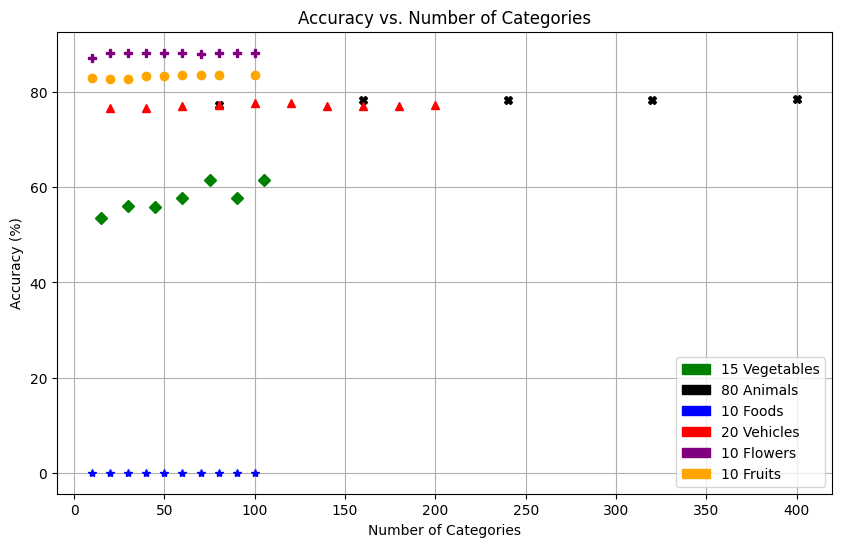

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel('Number of Categories')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Categories')
plt.grid()
plt.legend()

#Calling function
append_accuracies(veg_counts,"Vegetables15", "green", "D")
append_accuracies(animal80_counts,"Animal80", "black", "X")
append_accuracies(food10_counts, "food10", "blue", "*" )
append_accuracies(v20_counts,"Vehicle20", "red", "^")
append_accuracies(flowers10_counts, "flowers10", "purple", "P")
append_accuracies(fruits10_counts, "fruits10", "orange", "o")
append_accuracies(food34_counts, "food34", "yellow", "s")


veg_patch = mpatches.Patch(color='green', label='15 Vegetables')
a80_patch = mpatches.Patch(color='black', label='80 Animals')
f10_patch = mpatches.Patch(color = 'blue', label='10 Foods')
v20_patch = mpatches.Patch(color = 'red', label='20 Vehicles')
fl10_patch = mpatches.Patch(color = 'purple', label='10 Flowers')
fruits10_patch = mpatches.Patch(color = 'orange', label='10 Fruits')
food34_patch = mpatches.Patch(color = 'yellow', label='34 Foods')

plt.legend(handles=[veg_patch, a80_patch, f10_patch, v20_patch, fl10_patch, 
                    fruits10_patch, food34_patch])

#Axis ranges

# plt.xlim(0, 80)  
# plt.ylim(0, 100)

plt.show()